# Final Project JCDS09: `Pemanfaatan Manajemen Risiko berbasis Machine Learning Dalam Membangun Portfolio Saham di Bursa Efek Indonesia`

<hr>

#### __A. Exploratory Data Analysis untuk Sektor Agrikultur__

In [243]:
#import library
import mysql.connector
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
%matplotlib inline

In [2]:
#connect to sql database
mydb = mysql.connector.connect(
    host = 'localhost',
    user = 'root',
    passwd = '4pr14nimm4nu3l',
    database = 'idxfinstatement',
    auth_plugin = 'mysql_native_password'
)

In [3]:
#convert database to dataframe
mycursor = mydb.cursor()
def sql_df(yourQuery):
    mycursor.execute(yourQuery)
    myresult = mycursor.fetchall()
    df = pd.DataFrame(myresult, columns = mycursor.column_names)
    return df

<hr>

In [4]:
#menampilkan table yang ada pada database
sql_df('''
SHOW FULL TABLES
''')

Tables_in_idxfinstatement  Table_type
0                                     agriculture  BASE TABLE
1                    basic_industry_and_chemicals  BASE TABLE
2                         consumer_goods_industry  BASE TABLE
3                                         finance  BASE TABLE
4     infrastructure_utilities_and_transportation  BASE TABLE
5                                          mining  BASE TABLE
6                          miscellaneous_industry  BASE TABLE
7  property_real_estate_and_building_construction  BASE TABLE
8                     trade_service_and_invesment  BASE TABLE

In [5]:
#mendeskripsikan tabel agrikultur
sql_df('''describe agriculture''').T

0            1            2            3            4   \
Field    Company_Name    Code_Name    Subsector   MR_Quarter   Fin_Yr_End   
Type     varchar(100)  varchar(10)  varchar(30)  varchar(20)  varchar(15)   
Null               NO           NO           NO           NO           NO   
Key                            PRI                                          
Default          None         None         None         None         None   
Extra                                                                       

                5        6       7      8       9   ...     28     29     30  \
Field    Iss_Share  Mar_Cap  St_Ind  Sales  Assets  ...    GPM    OPM    NPM   
Type         float    float   float  float   float  ...  float  float  float   
Null            NO       NO      NO     NO      NO  ...     NO     NO     NO   
Key                                                 ...                        
Default       None     None    None   None    None  ...   None   None   None   
Extra                                               ...                        

            31     32     33     34     35     36     37  
Field    EBITM    ROE    ROA    DER     CR     QR    CRR  
Type     float  float  float  float  float  float  float  
Null        NO     NO     NO     NO     NO     NO     NO  
Key                                                       
Default   None   None   None   None   None   None   None  
Extra                                                     

[6 rows x 38 columns]

In [6]:
#menampilkan 5 perusahaan teratas di sektor agrikultur berdasarkan Abjad
agriculture = sql_df('''select * from agriculture''')
agriculture.head().T

0                 1  \
Company_Name  Astra Agro Lestari Tbk.  Andira Agro Tbk.   
Code_Name                        AALI              ANDI   
Subsector                  Plantation        Plantation   
MR_Quarter                 31/03/2020        31/03/2020   
Fin_Yr_End                   DECEMBER          DECEMBER   
Iss_Share                        1.92              9.35   
Mar_Cap                         16310             467.5   
St_Ind                          688.5                50   
Sales                            4800             86.29   
Assets                          29220            510.42   
Liability                        9850            238.24   
Equity                          18900            272.17   
Cash_Flow                      660.61              8.17   
Op_Profit                      639.61              8.74   
Net_Profit                     371.06                13   
DPS                                49                 0   
EPS                               771                 6   
RPS                              9968                37   
BVPS                             9818                29   
CFPS                             1373                 3   
CEPS                              764                 8   
NAVS                            10061                29   
Div_Yield                      0.0058                 0   
PER                             10.99              8.33   
PSR                              0.85              1.35   
PBVR                             0.86              1.72   
PCFR                             6.17             14.31   
DPR                            0.0636                 0   
GPM                            0.1932            0.1747   
OPM                            0.1333            0.1012   
NPM                            0.0773            0.1506   
EBITM                          0.0986            0.0971   
ROE                            0.0785             0.191   
ROA                            0.0507            0.1018   
DER                            0.5215            0.8753   
CR                             0.5891            0.7043   
QR                             1.4477            1.2465   
CRR                            2.3934            1.3167   

                                         2                       3  \
Company_Name  Austindo Nusantara Jaya Tbk.  Estika Tata Tiara Tbk.   
Code_Name                             ANJT                    BEEF   
Subsector                       Plantation        Animal Husbandry   
MR_Quarter                      31/03/2020              31/03/2020   
Fin_Yr_End                        DECEMBER                DECEMBER   
Iss_Share                             3.35                    1.88   
Mar_Cap                               1860                  425.85   
St_Ind                                46.3                     226   
Sales                               515.06                   374.2   
Assets                                8110                  926.74   
Liability                             3098                  553.08   
Equity                                4996                  367.42   
Cash_Flow                            37.94                    16.3   
Op_Profit                            14.14                   72.56   
Net_Profit                           -17.1                  -32.69   
DPS                                      0                       0   
EPS                                    -21                      20   
RPS                                  614.6                     794   
BVPS                                1489.6                     203   
CFPS                                  1106                      35   
CEPS                                  1106                       7   
NAVS                                1496.6                     198   
Div_Yield                                0                       0   
PER                                 -23.23            

<hr>

### __1a. Ada apa sajakah subsektor pada sektor agrikultur?__

In [8]:
agri_subsec = sql_df('''SELECT Company_Name, Code_Name, Subsector from agriculture''')
agri_subsec['Subsector'].value_counts()

Plantation            19
Food And Beverages     1
Fishery                1
Crops                  1
Animal Husbandry       1
Name: Subsector, dtype: int64

### __2a. Kita sekarang mengetahui jika subsector paling banyak pada sektor Agrikultur adalah subsektor `plantation`. Sekarang, perusahaan apa yang memiliki penjualan paling tinggi pada sektor `Agriculture` dan subsektor `Plantation` pada Q1 2020?__

In [229]:
sql_df('''select Company_Name as NamaPerusahaan,
Code_Name as KodeSaham,
Sales as Penjualan_dalam_Milliar
from agriculture
order by Sales DESC
limit 5''')

NamaPerusahaan KodeSaham  Penjualan_dalam_Milliar
0                      Smart Tbk.      SMAR                   9620.0
1         Astra Agro Lestari Tbk.      AALI                   4800.0
2       Salim Ivomas Pratama Tbk.      SIMP                   3320.0
3  Bakrie Sumatera Plantations Tb      UNSP                   1980.0
4     Dharma Satya Nusantara Tbk.      DSNG                   1590.0

In [230]:
sql_df("""Select Company_Name as NamaPerusahan,
Code_Name as KodeSaham,
Sales as Penjualan_dalam_Milliar
from agriculture
Where Subsector = 'Plantation'
Order by Sales DESC
Limit 5
""")

NamaPerusahan KodeSaham  Penjualan_dalam_Milliar
0                      Smart Tbk.      SMAR                   9620.0
1         Astra Agro Lestari Tbk.      AALI                   4800.0
2       Salim Ivomas Pratama Tbk.      SIMP                   3320.0
3  Bakrie Sumatera Plantations Tb      UNSP                   1980.0
4     Dharma Satya Nusantara Tbk.      DSNG                   1590.0

### __3a. Perusahaan apa yang memiliki profit bersih paling tinggi pada subsektor `Plantation` pada Q1 2020?__

In [10]:
sql_df("""SELECT Company_Name as NamaPerusahaan,
Code_Name as KodeSaham,
Net_Profit as ProfitBersih_dalam_milliar
from agriculture
where Subsector = 'Plantation'
order by Net_Profit desc
LIMIT 5
""")

NamaPerusahaan KodeSaham  ProfitBersih_dalam_milliar
0         Astra Agro Lestari Tbk.      AALI                      371.06
1     Dharma Satya Nusantara Tbk.      DSNG                       81.47
2  PP London Sumatra Indonesia Tb      LSIP                       81.04
3          Gozco Plantations Tbk.      GZCO                       52.35
4        Cisadane Sawit Raya Tbk.      CSRA                       32.50

### __4a. Perusahaan apa saja yang memiliki nilai ekuitas tertinggi pada sektor `Agrikultur` per Q1 2020?__

In [239]:
sql_df('''Select Company_Name as NamaPerusahaan,
Code_Name as KodePerusahaan,
Equity as Ekuitas_dalam_Milliar
from agriculture
order by Equity DESC
Limit 5''')

NamaPerusahaan KodePerusahaan  Ekuitas_dalam_Milliar
0         Astra Agro Lestari Tbk.           AALI                18900.0
1       Salim Ivomas Pratama Tbk.           SIMP                14340.0
2                      Smart Tbk.           SMAR                 9660.0
3  PP London Sumatra Indonesia Tb           LSIP                 8580.0
4    Austindo Nusantara Jaya Tbk.           ANJT                 4996.0

### __5a. Perusahaan apa saja yang memiliki Rasio Hutang paling rendah pada sektor Agrikultur per Q1 2020?__

In [231]:
sql_df('''Select Company_Name as NamaPerusahaan,
Code_Name as KodeSaham,
DER as RasioHutang
from agriculture
where DER > 0.0001
order by DER
LIMIT 5''')

NamaPerusahaan KodeSaham  RasioHutang
0             Provident Agro Tbk.      PALM       0.1187
1  PP London Sumatra Indonesia Tb      LSIP       0.2202
2         BISI International Tbk.      BISI       0.2310
3         Astra Agro Lestari Tbk.      AALI       0.5215
4    Austindo Nusantara Jaya Tbk.      ANJT       0.6201

### __6a. Perusahaan apa saja yang memiliki margin keuntungan bersih paling tinggi di antara perusahaan subsector `Plantation' lainnya?__

In [13]:
sql_df('''Select Company_Name as NamaPerusahaan,
Code_Name as KodeSaham,
Sales as Penjualan,
Net_Profit as KeuntunganBersih,
NPM as Persentase
from agriculture
where Subsector = 'Plantation'
order by NPM DESC
LIMIT 5''')

NamaPerusahaan KodeSaham  Penjualan  KeuntunganBersih  \
0          Gozco Plantations Tbk.      GZCO      74.18             52.35   
1        Cisadane Sawit Raya Tbk.      CSRA     145.62             32.50   
2             Provident Agro Tbk.      PALM      59.99             10.14   
3                Andira Agro Tbk.      ANDI      86.29             13.00   
4  PP London Sumatra Indonesia Tb      LSIP     811.02             81.04   

   Persentase  
0      0.7058  
1      0.2232  
2      0.1690  
3      0.1506  
4      0.1000

### __7a. Perusahaan apa saja yang memiliki rasio likuiditas tertinggi pada sektor `Agriculture` pada Q1 2020 ini?__

In [233]:
sql_df('''Select Company_Name as NamaPerusahaan,
Code_Name as KodeSaham,
QR as rasio_likuiditas
from agriculture
order by QR DESC
LIMIT 5''')

NamaPerusahaan KodeSaham  rasio_likuiditas
0  PP London Sumatra Indonesia Tb      LSIP            3.1316
1     Sawit Sumbermas Sarana Tbk.      SSMS            2.8691
2         BISI International Tbk.      BISI            2.3766
3              Palma Serasih Tbk.      PSGO            1.8766
4    Austindo Nusantara Jaya Tbk.      ANJT            1.6452

### __8a. Perusahaan apa pada sektor `Agriculture` di Q1 2020 ini yang__
  #### a.memiliki *__dividen yield__* diatas 2% 
  #### b.memiliki *__tingkat harga saham terhadap nilai bukunya__* tidak melebihi 2x
  #### c.*__rasio hutang terhadap ekuitas__* tidak melebihi 100% dari ekuitasnya
  #### d.*__rasio pembagian dividen yang tinggi terhadap laba bersihnya__* diatas 20%
  #### e.*__pengembalian laba bersih terhadap ekuitas__* lebih dari 2%?
  #### f. diurutkan dari yang memiliki *__rasio likuiditas__* tertinggi, tampilkan 5 perusahaan.

In [14]:
recom_agri = sql_df('''select Company_Name,
Code_Name,
Subsector,
Equity,
PBVR,
DER,
Div_Yield,
ROE,
DPR
from agriculture
where DER <= 2 and Div_Yield >= 0.02 and ROE >= 0.02 and DPR >= 0.2 and PBVR <= 2 and PBVR >= 0
ORDER BY QR DESC
Limit 5''')
recom_agri

Company_Name Code_Name   Subsector  Equity  PBVR     DER  \
0  PP London Sumatra Indonesia Tb      LSIP  Plantation  8580.0  0.67  0.2202   
1         BISI International Tbk.      BISI       Crops  2340.0  1.04  0.2310   

   Div_Yield     ROE     DPR  
0     0.0225  0.0377  0.3958  
1     0.1227  0.0416  3.1250

In [15]:
# recom_agri.to_csv('Agriculture.csv')

<hr>

## __Descriptive Analysis__

In [16]:
agriculture.describe().T

count         mean           std        min         25%  \
Iss_Share    23.0     7.044348      7.013033     1.8600     2.68500   
Mar_Cap      23.0  2662.576087   3772.712441     5.7700   278.34000   
St_Ind       23.0   188.304348    251.782739     2.8000    32.20000   
Sales        23.0  1207.660000   2169.070874     2.9000   125.27000   
Assets       23.0  8482.756522  10169.633146   396.2400  1615.00000   
Liability    23.0  4933.105217   5954.944389   199.1800   789.61000   
Equity       23.0  3389.983478   5162.338756 -4470.0000   445.61000   
Cash_Flow    23.0   698.642885   2854.830393  -224.2000   -10.74500   
Op_Profit    23.0    99.987135    228.678617  -315.3600     1.31088   
Net_Profit   23.0  -255.907549    969.369891 -4460.0000   -40.36000   
DPS          23.0    40.618043    156.290905     0.0000     0.00000   
EPS          23.0  -134.521739    574.177583 -1965.0000   -20.00000   
RPS          23.0  1393.373913   3315.469200     3.0000    51.50000   
BVPS         23.0   877.634783   2167.498805 -1790.0000    96.50000   
CFPS         23.0   143.782609    380.799751  -312.0000    -4.50000   
CEPS         23.0   149.956522    286.099550     0.0000     6.50000   
NAVS         23.0   902.417391   2233.411599 -2178.0000   117.00000   
Div_Yield    23.0     0.056609      0.186070     0.0000     0.00000   
PER          23.0    85.134348    418.067666   -81.0000    -5.00000   
PSR          23.0     2.086957      3.431327     0.0700     0.44500   
PBVR         23.0     1.058696      0.838583    -0.0300     0.64500   
PCFR         23.0   -45.249565    289.031830 -1335.1700    -2.39000   
DPR          23.0     0.149787      0.669299    -0.3817     0.00000   
GPM          23.0    -0.015365      1.018991    -4.6409     0.06880   
OPM          23.0     0.723191      4.206939    -4.8694     0.01715   
NPM          23.0    -0.683500      2.096550    -8.7300    -0.22100   
EBITM        23.0    -0.521413      1.604563    -7.4637    -0.40955   
ROE          23.0    -1.619183      7.415234   -35.5900    -0.23280   
ROA          23.0    -2.346974      8.570921   -39.2857    -0.05940   
DER          23.0     1.615078      2.162023    -3.0947     0.74770   
CR           23.0     1.089513      3.027243     0.0008     0.02880   
QR           23.0     1.050596      0.849015     0.0132     0.49920   
CRR          23.0     1.421652      1.181593     0.0348     0.68375   

                  50%          75%         max  
Iss_Share      3.7700      9.17500     31.5300  
Mar_Cap     1620.0000   3210.00000  16310.0000  
St_Ind        85.5000    222.05000    911.2000  
Sales        401.3400    911.13500   9620.0000  
Assets      3300.0000  11240.00000  35320.0000  
Liability   1890.0000   8250.00000  20270.0000  
Equity      1200.0000   4180.00000  18900.0000  
Cash_Flow     16.3000    233.12500  13750.0000  
Op_Profit     45.0600    104.16000    828.0900  
Net_Profit   -14.5500     25.04500    371.0600  
DPS            0.0000      3.85750    750.0000  
EPS           -4.0000     13.00000    771.0000  
RPS          386.0000    734.50000  13396.0000  
BVPS         175.0000    843.00000   9818.0000  
CFPS           8.0000     83.00000   1373.0000  
CEPS          22.0000    157.00000   1106.0000  
NAVS         216.0000    949.50000  10061.0000  
Div_Yield      0.0000      0.00930      0.8700  
PER           -0.0300     11.14500   2000.0000  
PSR            1.0100      1.89000     15.7800  
PBVR           0.8600      1.21500      3.9400  
PCFR           3.5000      9.89500    295.9200  
DPR            0.0000      0.00000      3.1250  
GPM            0.1872      0.29805      0.4900  
OPM            0.1012      0.18210     19.3900  
NPM            0.0002      0.09740      0.7058  
EBITM         -0.0435      0.06760      0.3612  
ROE           -0.0136      0.06005      0.9964  
ROA           -0.0058      0.03100      0.1018  
DER            1.4817      2.14860      9.6426  
CR             0.3334      0.64670     14.6900  
QR             0.7676      1.

<hr>

## __Correlation Analysis__

In [17]:
agriculture_try_1 = agriculture.copy()

In [18]:
agriculture_value_drop1 = agriculture_try_1.drop(['DPR', 'DPS', 'EPS', 'RPS', 'BVPS', 'CFPS', 'CEPS', 'NAVS', 'PER', 'PSR', 'PBVR', 'PCFR', 'GPM', 'OPM', 'NPM', 'EBITM', 'ROE', 'ROA', 'CR', 'QR', 'CRR', 'DER'], axis=1)
agriculture_value_drop1.head().T

0                 1  \
Company_Name  Astra Agro Lestari Tbk.  Andira Agro Tbk.   
Code_Name                        AALI              ANDI   
Subsector                  Plantation        Plantation   
MR_Quarter                 31/03/2020        31/03/2020   
Fin_Yr_End                   DECEMBER          DECEMBER   
Iss_Share                        1.92              9.35   
Mar_Cap                         16310             467.5   
St_Ind                          688.5                50   
Sales                            4800             86.29   
Assets                          29220            510.42   
Liability                        9850            238.24   
Equity                          18900            272.17   
Cash_Flow                      660.61              8.17   
Op_Profit                      639.61              8.74   
Net_Profit                     371.06                13   
Div_Yield                      0.0058                 0   

                                         2                       3  \
Company_Name  Austindo Nusantara Jaya Tbk.  Estika Tata Tiara Tbk.   
Code_Name                             ANJT                    BEEF   
Subsector                       Plantation        Animal Husbandry   
MR_Quarter                      31/03/2020              31/03/2020   
Fin_Yr_End                        DECEMBER                DECEMBER   
Iss_Share                             3.35                    1.88   
Mar_Cap                               1860                  425.85   
St_Ind                                46.3                     226   
Sales                               515.06                   374.2   
Assets                                8110                  926.74   
Liability                             3098                  553.08   
Equity                                4996                  367.42   
Cash_Flow                            37.94                    16.3   
Op_Profit                            14.14                   72.56   
Net_Profit                           -17.1                  -32.69   
Div_Yield                                0                       0   

                                    4  
Company_Name  BISI International Tbk.  
Code_Name                        BISI  
Subsector                       Crops  
MR_Quarter                 31/03/2020  
Fin_Yr_End                   DECEMBER  
Iss_Share                           3  
Mar_Cap                          2440  
St_Ind                          407.5  
Sales                          401.34  
Assets                           2890  
Liability                      547.91  
Equity                           2340  
Cash_Flow                       -11.2  
Op_Profit                       66.21  
Net_Profit                      24.34  
Div_Yield                      0.1227

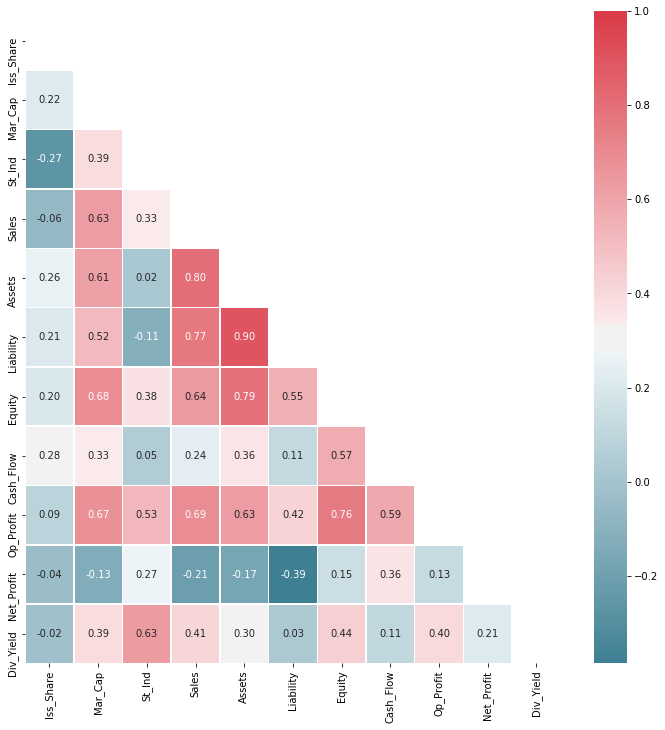

In [19]:
corr = agriculture_value_drop1.corr(method='spearman')
fig, ax = plt.subplots(figsize = (12,12))
colormap = sns.diverging_palette(220,10, as_cmap=True)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
colormap = sns.diverging_palette(220,10, as_cmap = True)
sns.heatmap(corr, cmap=colormap, linewidth=0.5, annot=True, fmt=".2f", mask=dropSelf)
plt.show()

In [20]:
agriculture_try_2 = agriculture.copy()
agriculture_value_drop2 = agriculture_try_2.drop(['Iss_Share', 'Mar_Cap', 'St_Ind', 'Sales', 'Equity', 'Assets', 'Liability', 'Cash_Flow', 'Op_Profit', 'Net_Profit'], axis=1)
agriculture_value_drop2.head().T

0                 1  \
Company_Name  Astra Agro Lestari Tbk.  Andira Agro Tbk.   
Code_Name                        AALI              ANDI   
Subsector                  Plantation        Plantation   
MR_Quarter                 31/03/2020        31/03/2020   
Fin_Yr_End                   DECEMBER          DECEMBER   
DPS                                49                 0   
EPS                               771                 6   
RPS                              9968                37   
BVPS                             9818                29   
CFPS                             1373                 3   
CEPS                              764                 8   
NAVS                            10061                29   
Div_Yield                      0.0058                 0   
PER                             10.99              8.33   
PSR                              0.85              1.35   
PBVR                             0.86              1.72   
PCFR                             6.17             14.31   
DPR                            0.0636                 0   
GPM                            0.1932            0.1747   
OPM                            0.1333            0.1012   
NPM                            0.0773            0.1506   
EBITM                          0.0986            0.0971   
ROE                            0.0785             0.191   
ROA                            0.0507            0.1018   
DER                            0.5215            0.8753   
CR                             0.5891            0.7043   
QR                             1.4477            1.2465   
CRR                            2.3934            1.3167   

                                         2                       3  \
Company_Name  Austindo Nusantara Jaya Tbk.  Estika Tata Tiara Tbk.   
Code_Name                             ANJT                    BEEF   
Subsector                       Plantation        Animal Husbandry   
MR_Quarter                      31/03/2020              31/03/2020   
Fin_Yr_End                        DECEMBER                DECEMBER   
DPS                                      0                       0   
EPS                                    -21                      20   
RPS                                  614.6                     794   
BVPS                                1489.6                     203   
CFPS                                  1106                      35   
CEPS                                  1106                       7   
NAVS                                1496.6                     198   
Div_Yield                                0                       0   
PER                                 -23.23                    11.3   
PSR                                   0.77                    0.28   
PBVR                                  0.32                    1.11   
PCFR                                  10.5                    6.53   
DPR                                      0                       0   
GPM                                  0.227                       0   
OPM                                 0.0273                   19.39   
NPM                                -0.0332                   -8.73   
EBITM                               0.0357                 -0.1353   
ROE                                -0.0136                  -35.59   
ROA                                -0.0084                  -14.11   
DER                                 0.6201                  1.5053   
CR                                  0.7765                   0.032   
QR                                  1.6452                  0.7676   
CRR                                 2.0224                  1.1063   

                                    4  
Company_Name  BISI International Tbk.  
Code_Name                        BISI  
Subsector                       Crops  
MR_Quarter                 31/03/2020  
Fin_Yr_End                   DECEMBER  
DPS                               100  
EPS          

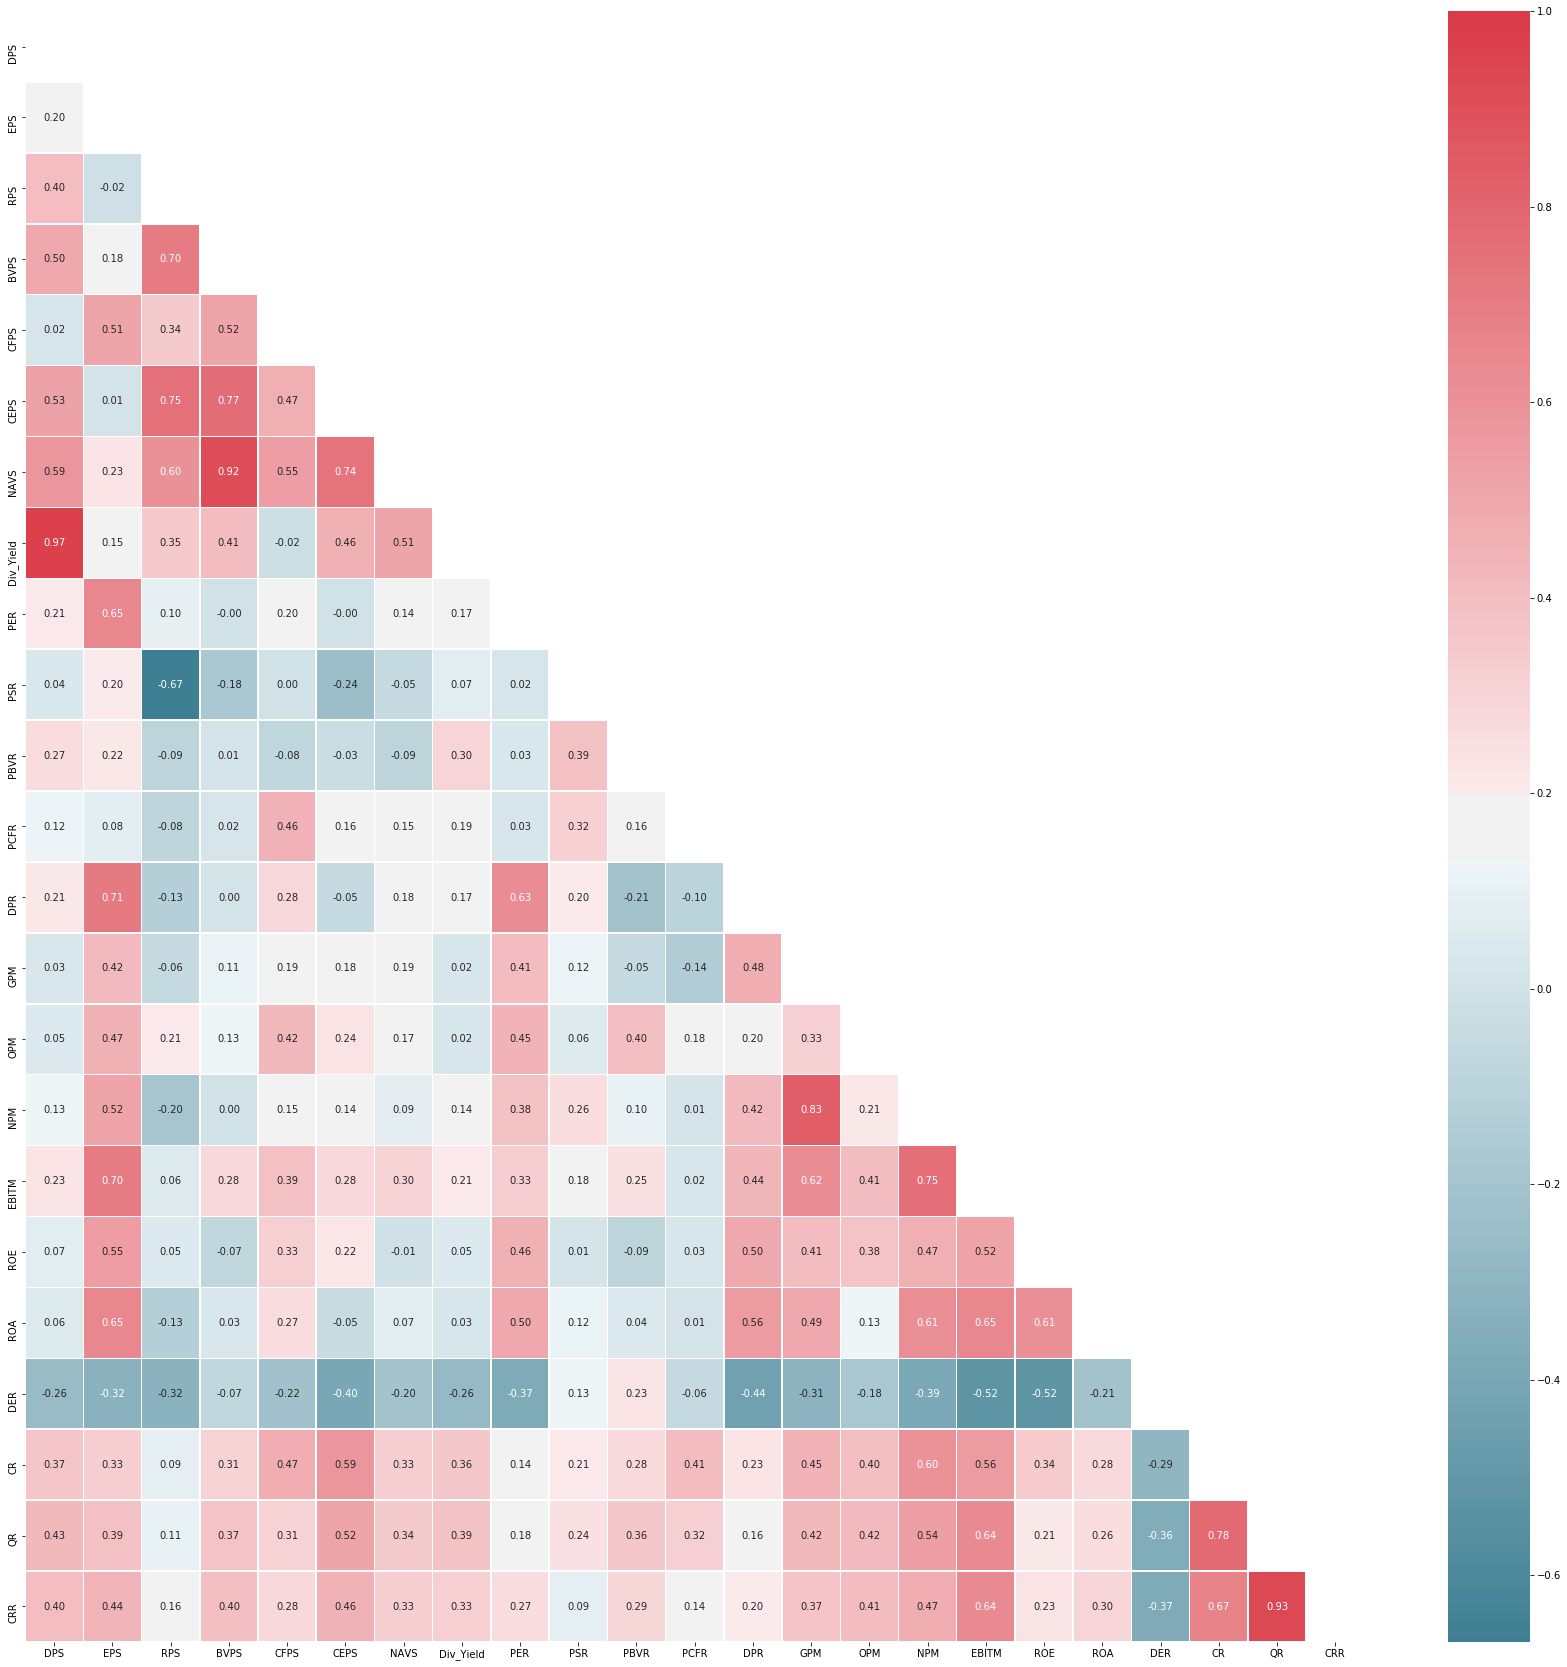

In [21]:
corr = agriculture_value_drop2.corr(method='spearman')
fig, ax = plt.subplots(figsize = (30,30))
colormap = sns.diverging_palette(220,10, as_cmap=True)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
colormap = sns.diverging_palette(220,10, as_cmap = True)
sns.heatmap(corr, cmap=colormap, linewidth=0.5, annot=True, fmt=".2f", mask=dropSelf)
plt.show()

<hr>

## Visualisasi `Dividen Yield` Pada Perusahaan Sektor Agrikultur (Target Feature)

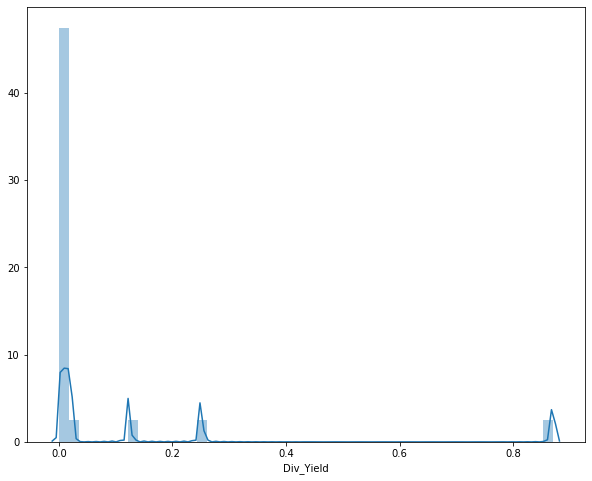

In [22]:
plt.figure(figsize=(10,8))
sns.distplot(agriculture['Div_Yield'])

## Visualisasi Tingkat Hutang terhadap Ekuitas Pada Perusahaan sektor Agrikultur

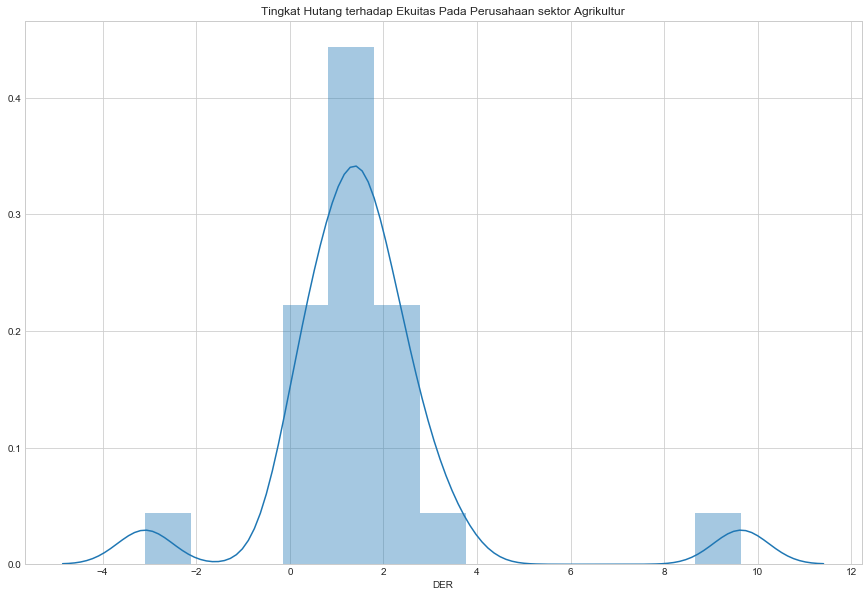

In [23]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(15,10))

sns.distplot(agriculture['DER'])
plt.title('Tingkat Hutang terhadap Ekuitas Pada Perusahaan sektor Agrikultur')
plt.show()

## Visualisasi Margin Keutungan Bersih pada Perusahaan sektor Agrikultur

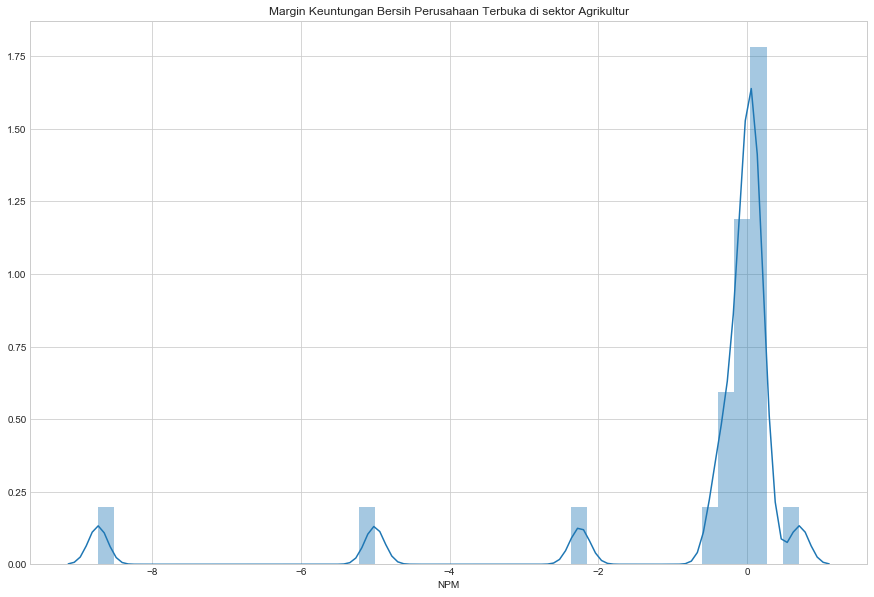

In [24]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(15,10))

sns.distplot(agriculture['NPM'])
plt.title('Margin Keuntungan Bersih Perusahaan Terbuka di sektor Agrikultur')
plt.show()

## Visualisasi Ekuitas Perusahaan Terbuka di Sektor Agrikultur

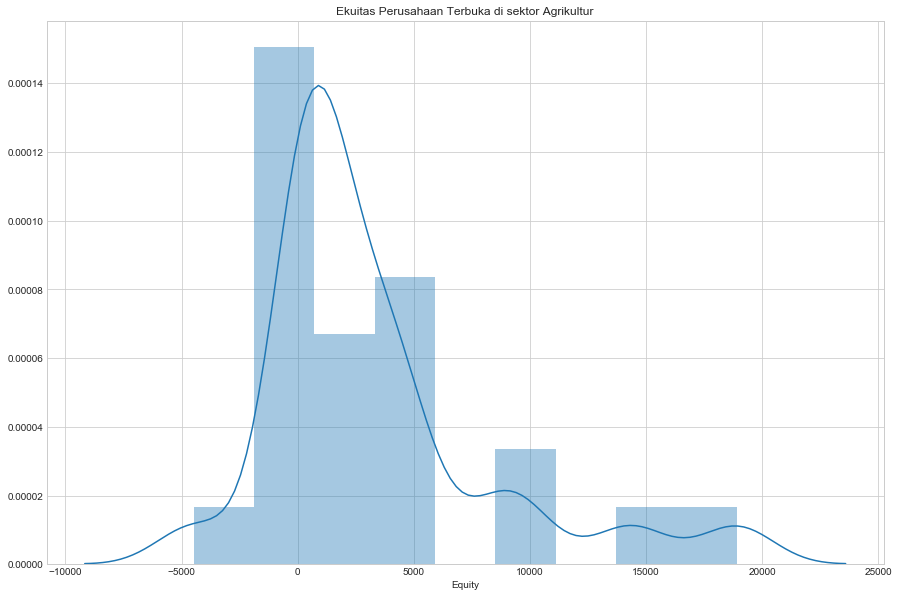

In [25]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(15,10))

sns.distplot(agriculture['Equity'])
plt.title('Ekuitas Perusahaan Terbuka di sektor Agrikultur')
plt.show()

## Visualisasi Rasio Likuiditas Perusahaan Terbuka di sektor Agrikultur

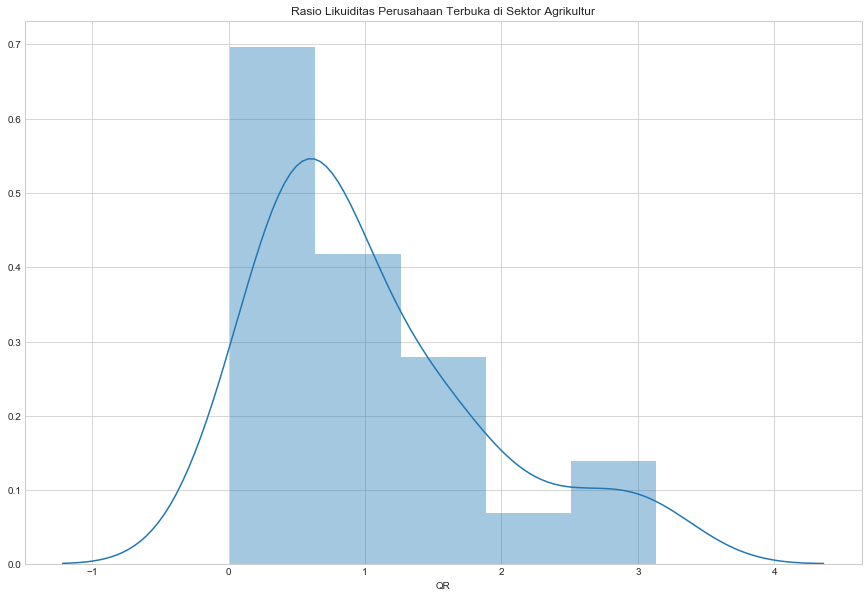

In [26]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(15,10))

sns.distplot(agriculture['QR'])
plt.title('Rasio Likuiditas Perusahaan Terbuka di Sektor Agrikultur')
plt.show()

<hr>

## __B. Exploratory Data Analysis pada Sektor Finance__

In [28]:
finance = sql_df('''select * from finance''')
finance.head().T

0                               1  \
Company_Name  Asuransi Bina Dana Arta Tbk.  Adira Dinamika Multi Finance T   
Code_Name                             ABDA                            ADMF   
Subsector                        Insurance           Financial Institution   
MR_Quarter                      31/03/2020                      31/03/2020   
Fin_Yr_End                        December                        December   
Iss_Share                          0.62081                               1   
Mar_Cap                               3970                            7300   
St_Ind                              1461.1                             314   
Sales                                262.2                            2420   
Assets                                2570                           34800   
Liability                             1320                           27320   
Equity                                1250                            7470   
Cash_Flow                             1.25                            7.47   
Op_Profit                            20.85                            1630   
Net_Profit                           30.11                          520.11   
DPS                                    190                          1054.5   
EPS                                    194                            2080   
RPS                                   1689                            9683   
BVPS                                  2013                            7473   
CFPS                                  -228                            4569   
CEPS                                  1182                            2199   
NAVS                                  2013                            7473   
Div_Yield                           0.0297                          0.1445   
PER                                  32.99                            3.51   
PSR                                   3.79                            0.75   
PBVR                                  3.18                            0.98   
PCFR                                -28.06                             1.6   
DPR                                 0.9794                           0.507   
GPM                                      0                               0   
OPM                                 0.0795                          0.6745   
NPM                                 0.1148                          0.2148   
EBITM                               0.1167                          0.0953   
ROE                                 0.0963                          0.2783   
ROA                                 0.0468                          0.0597   
DER                                  1.056                          3.6565   
CR                                  0.6182                          0.1314   
QR                                       0                               0   
CRR                                  1.873                          1.9455   

                                           2                        3  \
Company_Name  Bank Rakyat Indonesia Agroniag  Bank IBK Indonesia Tbk.   
Code_Name                               AGRO                     AGRS   
Subsector                               Bank                     Bank   
MR_Quarter                        31/03/2020               31/03/2020   
Fin_Yr_End                          December                 December   
Iss_Share                              21.34                    11.27   
Mar_Cap                                 3200                     1130   
St_Ind                                 245.1                     90.9   
Sales                                 539.03                   218.71   
Assets                                 26600                     6650   
Liability                              22500                     5490   
Equity                                  4100                     1160   
Cash_Flow                                4.1     

<hr>

### __1b. Ada apa sajakah subsektor yang ada sektor Finance?__

In [30]:
finance['Subsector'].value_counts()

Bank                     45
Financial Institution    17
Insurance                15
Others - Finance          9
Securities Company        7
Name: Subsector, dtype: int64

### __2b. Kita sekarang mengetahui jika subsector paling banyak pada sektor Finance adalah subsektor `Bank`. Sekarang, perusahaan apa yang memiliki penjualan paling tinggi pada sektor `finance` dan subsektor `Bank` pada Q1 2020?__

In [236]:
sql_df('''select Company_Name as NamaPerusahaan,
Code_Name as KodeSaham,
Sales as Penjualan_dalam_Milliar
from finance
order by Sales DESC
LIMIT 5''')

NamaPerusahaan KodeSaham  Penjualan_dalam_Milliar
0  Bank Rakyat Indonesia (Persero      BBRI                  38630.0
1     Bank Mandiri (Persero) Tbk.      BMRI                  30680.0
2          Bank Central Asia Tbk.      BBCA                  22720.0
3  Bank Negara Indonesia (Persero      BBNI                  17370.0
4  Bank Tabungan Negara (Persero)      BBTN                   6510.0

In [238]:
sql_df('''select Company_Name as NamaPerusahaan,
Code_Name as KodeSaham,
Sales as Penjualan_dalam_Milliar
from finance
where Subsector = 'Bank'
order by Sales DESC
LIMIT 5''')

NamaPerusahaan KodeSaham  Penjualan_dalam_Milliar
0  Bank Rakyat Indonesia (Persero      BBRI                  38630.0
1     Bank Mandiri (Persero) Tbk.      BMRI                  30680.0
2          Bank Central Asia Tbk.      BBCA                  22720.0
3  Bank Negara Indonesia (Persero      BBNI                  17370.0
4  Bank Tabungan Negara (Persero)      BBTN                   6510.0

### __3b. Pada subsektor Financial Institution dan Insurance, perusahaan apa yang memiliki ekuitas terbesar dari seluruh perusahaan di sektor `finance`?__

In [240]:
sql_df('''select Company_Name as NamaPerusahaan,
Code_Name as KodeSaham,
Equity as Ekuitas
from finance
where Subsector = 'Financial Institution'
order by equity DESC
LIMIT 5
''')

NamaPerusahaan KodeSaham  Ekuitas
0  Adira Dinamika Multi Finance T      ADMF   7470.0
1      BFI Finance Indonesia Tbk.      BFIN   6310.0
2   Clipan Finance Indonesia Tbk.      CFIN   4790.0
3       Indomobil Multi Jasa Tbk.      IMJS   2860.0
4       Mandala Multifinance Tbk.      MFIN   2370.0

In [241]:
sql_df('''select Company_Name as NamaPerusahaan,
Code_Name as KodeSaham,
Equity as Ekuitas
from finance
where Subsector = 'Insurance'
order by equity DESC
LIMIT 5
''')

NamaPerusahaan KodeSaham  Ekuitas
0  Asuransi Tugu Pratama Indonesi      TUGU   7930.0
1  Asuransi Jiwa Sinarmas MSIG Tb      LIFE   7440.0
2  Asuransi Multi Artha Guna Tbk.      AMAG   1870.0
3   Maskapai Reasuransi Indonesia      MREI   1520.0
4    Asuransi Bina Dana Arta Tbk.      ABDA   1250.0

### __4b. Perusahaan apa saja yang memiliki total pendapatan bersih (net profit) paling tinggi pada Q1 2020 ini pada sektor Finance?__

In [34]:
sql_df('''SELECT Company_Name as NamaPerusahaan,
Code_Name as KodeSaham,
Net_Profit as TotalPendapatanBersih
from finance
order by Net_Profit DESC
Limit 5''')

NamaPerusahaan KodeSaham  TotalPendapatanBersih
0  Bank Rakyat Indonesia (Persero      BBRI                 8160.0
1     Bank Mandiri (Persero) Tbk.      BMRI                 7920.0
2          Bank Central Asia Tbk.      BBCA                 6580.0
3  Bank Negara Indonesia (Persero      BBNI                 4250.0
4     Bank Danamon Indonesia Tbk.      BDMN                 1250.0

### __5b. Perusahaan apa saja yang memiliki margin keuntungan bersih paling tinggi di  antara seluruh perusahaan sektor 'Finance' lainnya?__

In [35]:
sql_df('''Select Company_Name as NamaPerusahaan,
Code_Name as KodeSaham,
Sales as Penjualan,
Net_Profit as KeuntunganBersih,
NPM as Persentase
from finance
order by NPM DESC
LIMIT 5''')

NamaPerusahaan KodeSaham  Penjualan  KeuntunganBersih  \
0        Sinarmas Multiartha Tbk.      SMMA      61.51            358.61   
1      Asuransi Kresna Mitra Tbk.      ASMI     -28.24            -89.13   
2  Reliance Sekuritas Indonesia T      RELI      -1.19             -3.56   
3            Panin Sekuritas Tbk.      PANS    -188.46           -218.02   
4  Minna Padi Investama Sekuritas      PADI     -78.88            -82.19   

   Persentase  
0      5.8301  
1      3.1567  
2      2.9941  
3      1.1568  
4      1.0419

### __6b. Perusahaan apa pada sektor `finance` yang;__ 
  #### a.memiliki *__dividen yield__* diatas atau setara dengan bunga deposito (>= 4%) 
  #### b.memiliki *__tingkat harga saham terhadap nilai bukunya__* tidak melebihi 2x
  #### c.*__rasio hutang terhadap ekuitas__* tidak melebihi 8x dari ekuitasnya 
  #### d.*__rasio pembagian dividen yang tinggi terhadap laba bersihnya__* (diatas 20%)
  #### e.*__pengembalian laba bersih terhadap ekuitas yang tinggi__* (lebih dari 2%)
  #### f. Diurutkan dari yang memiliki *__rasio likuiditas__* tertinggi, tampilkan 15 perusahaan

In [36]:
recom_fin = sql_df('''select Company_Name,
Code_Name,
Subsector,
Equity,
PBVR,
DER,
Div_Yield,
ROE,
DPR
from finance
where DER <= 8 and Div_Yield >= 0.04 and ROE >= 0.02 and DPR >= 0.2 and PBVR <= 2 and PBVR >= 0
ORDER BY CRR DESC
Limit 15''')
recom_fin

Company_Name Code_Name              Subsector  \
0        Mandala Multifinance Tbk.      MFIN  Financial Institution   
1          Victoria Insurance Tbk.      VINS              Insurance   
2   Wahana Ottomitra Multiartha Tb      WOMF  Financial Institution   
3   Adira Dinamika Multi Finance T      ADMF  Financial Institution   
4     Lippo General Insurance Tbk.      LPGI              Insurance   
5           Asuransi Ramayana Tbk.      ASRM              Insurance   
6   Bank Negara Indonesia (Persero      BBNI                   Bank   
7      Bank Mandiri (Persero) Tbk.      BMRI                   Bank   
8   Bank Pembangunan Daerah Jawa T      BJTM                   Bank   
9             Bank CIMB Niaga Tbk.      BNGA                   Bank   
10     Bank Danamon Indonesia Tbk.      BDMN                   Bank   

       Equity  PBVR     DER  Div_Yield     ROE     DPR  
0     2370.00  1.14  1.0770     0.0490  0.1809  0.3086  
1      177.03  1.01  0.4403     0.0772  0.0302  2.3750  
2     1190.00  0.60  5.8910     0.1098  0.1492  0.4392  
3     7470.00  0.98  3.6565     0.1445  0.2783  0.5070  
4      798.79  0.70  2.2433     0.0867  0.1720  0.3548  
5      474.12  0.98  2.6367     0.0427  0.2539  0.5350  
6   107480.00  0.81  7.0584     0.0442  0.1582  0.2261  
7   173510.00  1.39  6.5853     0.0683  0.1824  0.5204  
8     9560.00  0.86  6.2929     0.0884  0.1837  0.4120  
9    40010.00  0.52  5.8602     0.0667  0.1054  0.3297  
10   42850.00  0.64  3.7328     0.0670  0.1162  0.3677

In [37]:
# recom_fin.to_csv('Finance.csv')

<hr>

## __Descriptive Analysis__

In [38]:
finance.describe().T

count          mean            std         min         25%  \
Iss_Share    93.0     11.847984      18.006821     0.15000     1.79000   
Mar_Cap      93.0  22712.098495   91639.365687    75.00000   648.44000   
St_Ind       93.0    771.451613    1997.810237     0.30000    90.90000   
Sales        93.0   1973.419462    5846.837506  -188.46000    61.51000   
Assets       93.0  81423.178495  236359.404679   100.86000  1720.00000   
Liability    93.0  68924.300595  203725.105462     0.72535   989.77000   
Equity       93.0  12133.480000   32857.158201     1.37000   577.69000   
Cash_Flow    93.0     12.133480      32.857158     0.00137     0.57769   
Op_Profit    93.0    446.484494    1602.482327  -936.70000    -4.19000   
Net_Profit   93.0    396.055544    1409.552486  -218.02000     1.34000   
DPS          93.0     46.065013     137.624565    -2.00000     0.00000   
EPS          93.0    104.989247     321.802312 -1211.00000     1.00000   
RPS          93.0    760.559140    1633.901050 -1047.00000    49.00000   
BVPS         93.0   1054.892473    1555.692488   -20.00000   139.00000   
CFPS         93.0     76.075269    1210.448140 -3530.00000  -173.00000   
CEPS         93.0    335.537634     646.225034     1.00000    28.00000   
NAVS         93.0   1113.881720    1653.686940     0.00000   163.00000   
Div_Yield    93.0     -0.249609       2.594629   -25.00000     0.00000   
PER          93.0     27.318172      79.961149  -328.89000     3.53000   
PSR          93.0      9.071183      54.083994  -118.16000     0.80000   
PBVR         93.0      2.281505       5.797625    -2.49000     0.56000   
PCFR         93.0     -9.951290      44.367239  -299.52000    -3.10000   
DPR          93.0      0.184259       0.489484    -0.94770     0.00000   
GPM          93.0      0.003232       0.055949    -0.29500     0.00000   
OPM          93.0     -0.018889       2.203074   -15.22870     0.01890   
NPM          93.0      0.255131       0.793101    -1.22150     0.02340   
EBITM        93.0     -1.464414      14.290204  -137.09200     0.00000   
ROE          93.0      0.018899       0.236539    -1.15600     0.01020   
ROA          93.0      0.133148       1.434404    -1.05190     0.00170   
DER          93.0      5.619343      17.608566     0.00720     1.41280   
CR           93.0      2.877130      13.953211     0.00740     0.06110   
QR           93.0      0.554716       0.653859     0.00000     0.00000   
CRR          93.0     19.671828      88.107790     0.00000     1.07850   

                  50%         75%           max  
Iss_Share      6.3700     11.6500  1.233500e+02  
Mar_Cap     2250.0000   8180.0000  7.643100e+05  
St_Ind       181.3000    629.1000  1.771430e+04  
Sales        272.2600    926.2500  3.863000e+04  
Assets      7920.0000  30720.0000  1.358980e+06  
Liability   5490.0000  24560.0000  1.179340e+06  
Equity      1520.0000   6940.0000  1.772600e+05  
Cash_Flow      1.5200      6.9400  1.772600e+02  
Op_Profit     20.3700    172.7000  8.990000e+03  
Net_Profit    16.1400     83.9100  8.160000e+03  
DPS            0.0000     14.0000  1.054500e+03  
EPS           16.0000    114.0000  2.080000e+03  
RPS          180.0000    698.0000  9.683000e+03  
BVPS         341.0000   1218.0000  7.473000e+03  
CFPS           9.0000    174.0000  6.173000e+03  
CEPS         100.0000    328.0000  4.238000e+03  
NAVS         350.0000   1218.0000  7.473000e+03  
Div_Yield      0.0000      0.0261  1.668000e-01  
PER           11.7400     30.7500  4.487500e+02  
PSR            1.7300      5.1500  4.529200e+02  
PBVR           0.9300      1.9200  4.933000e+01  
PCFR           0.0000      2.6200  4.501000e+01  
DPR            0.0000      0.2800  3.545500e+00  
GPM            0.0000      0.0000  3.992000e-01  
OPM            0.1176      0.4302  7.455300e+00  
NPM            0.0961      0.2335  5.830100e+00  
EBITM          0.0000      0.0802  6.874000e+00  
ROE            0.0435      0.1003  7.208000e-01  
ROA            0.0084      0.0240  1.373490e+

<hr>

## __Correlation Analysis__

In [39]:
finance_try_1 = finance.copy()

In [40]:
finance_value_drop1 = finance_try_1.drop(['DPR', 'DPS', 'EPS', 'RPS', 'BVPS', 'CFPS', 'CEPS', 'NAVS', 'PER', 'PSR', 'PBVR', 'PCFR', 'GPM', 'OPM', 'NPM', 'EBITM', 'ROE', 'ROA', 'CR', 'QR', 'CRR', 'DER'], axis=1)
finance_value_drop1.head().T

0                               1  \
Company_Name  Asuransi Bina Dana Arta Tbk.  Adira Dinamika Multi Finance T   
Code_Name                             ABDA                            ADMF   
Subsector                        Insurance           Financial Institution   
MR_Quarter                      31/03/2020                      31/03/2020   
Fin_Yr_End                        December                        December   
Iss_Share                          0.62081                               1   
Mar_Cap                               3970                            7300   
St_Ind                              1461.1                             314   
Sales                                262.2                            2420   
Assets                                2570                           34800   
Liability                             1320                           27320   
Equity                                1250                            7470   
Cash_Flow                             1.25                            7.47   
Op_Profit                            20.85                            1630   
Net_Profit                           30.11                          520.11   
Div_Yield                           0.0297                          0.1445   

                                           2                        3  \
Company_Name  Bank Rakyat Indonesia Agroniag  Bank IBK Indonesia Tbk.   
Code_Name                               AGRO                     AGRS   
Subsector                               Bank                     Bank   
MR_Quarter                        31/03/2020               31/03/2020   
Fin_Yr_End                          December                 December   
Iss_Share                              21.34                    11.27   
Mar_Cap                                 3200                     1130   
St_Ind                                 245.1                     90.9   
Sales                                 539.03                   218.71   
Assets                                 26600                     6650   
Liability                              22500                     5490   
Equity                                  4100                     1160   
Cash_Flow                                4.1                     1.16   
Op_Profit                              12.15                   -175.1   
Net_Profit                              16.7                  -168.61   
Div_Yield                             0.0128                        0   

                                           4  
Company_Name  Asuransi Harta Aman Pratama Tb  
Code_Name                               AHAP  
Subsector                          Insurance  
MR_Quarter                        31/03/2020  
Fin_Yr_End                          December  
Iss_Share                               2.94  
Mar_Cap                                  147  
St_Ind                                 100.8  
Sales                                   24.7  
Assets                                757.84  
Liability                             540.86  
Equity                                216.98  
Cash_Flow                            0.21698  
Op_Profit                             -29.12  
Net_Profit                              1.89  
Div_Yield                                  0

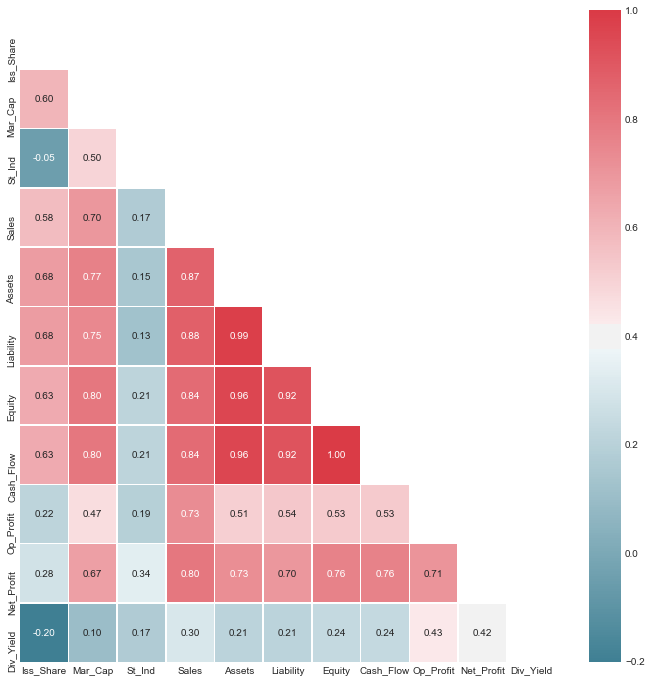

In [41]:
corr = finance_value_drop1.corr(method='spearman')
fig, ax = plt.subplots(figsize = (12,12))
colormap = sns.diverging_palette(220,10, as_cmap=True)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
colormap = sns.diverging_palette(220,10, as_cmap = True)
sns.heatmap(corr, cmap=colormap, linewidth=0.5, annot=True, fmt=".2f", mask=dropSelf)
plt.show()

In [42]:
finance_try_2 = finance.copy()
finance_value_drop2 = finance_try_2.drop(['Iss_Share', 'Mar_Cap', 'St_Ind', 'Sales', 'Equity', 'Assets', 'Liability', 'Cash_Flow', 'Op_Profit', 'Net_Profit'], axis=1)
finance_value_drop2.head().T

0                               1  \
Company_Name  Asuransi Bina Dana Arta Tbk.  Adira Dinamika Multi Finance T   
Code_Name                             ABDA                            ADMF   
Subsector                        Insurance           Financial Institution   
MR_Quarter                      31/03/2020                      31/03/2020   
Fin_Yr_End                        December                        December   
DPS                                    190                          1054.5   
EPS                                    194                            2080   
RPS                                   1689                            9683   
BVPS                                  2013                            7473   
CFPS                                  -228                            4569   
CEPS                                  1182                            2199   
NAVS                                  2013                            7473   
Div_Yield                           0.0297                          0.1445   
PER                                  32.99                            3.51   
PSR                                   3.79                            0.75   
PBVR                                  3.18                            0.98   
PCFR                                -28.06                             1.6   
DPR                                 0.9794                           0.507   
GPM                                      0                               0   
OPM                                 0.0795                          0.6745   
NPM                                 0.1148                          0.2148   
EBITM                               0.1167                          0.0953   
ROE                                 0.0963                          0.2783   
ROA                                 0.0468                          0.0597   
DER                                  1.056                          3.6565   
CR                                  0.6182                          0.1314   
QR                                       0                               0   
CRR                                  1.873                          1.9455   

                                           2                        3  \
Company_Name  Bank Rakyat Indonesia Agroniag  Bank IBK Indonesia Tbk.   
Code_Name                               AGRO                     AGRS   
Subsector                               Bank                     Bank   
MR_Quarter                        31/03/2020               31/03/2020   
Fin_Yr_End                          December                 December   
DPS                                   1.9136                        0   
EPS                                        3                      -60   
RPS                                      101                      123   
BVPS                                     192                      103   
CFPS                                     128                      174   
CEPS                                      76                       68   
NAVS                                     192                      163   
Div_Yield                             0.0128                        0   
PER                                       50                    -1.67   
PSR                                     1.48                     0.81   
PBVR                                    0.78                     0.97   
PCFR                                    1.17                     0.58   
DPR                                   0.6379                        0   
GPM                                        0                        0   
OPM                                   0.0225                  -0.8006   
NPM                                   0.0309                  -0.7709   
EBITM                                      0                        0   
ROE                                   0.0163                  -0.5813   
ROA                       

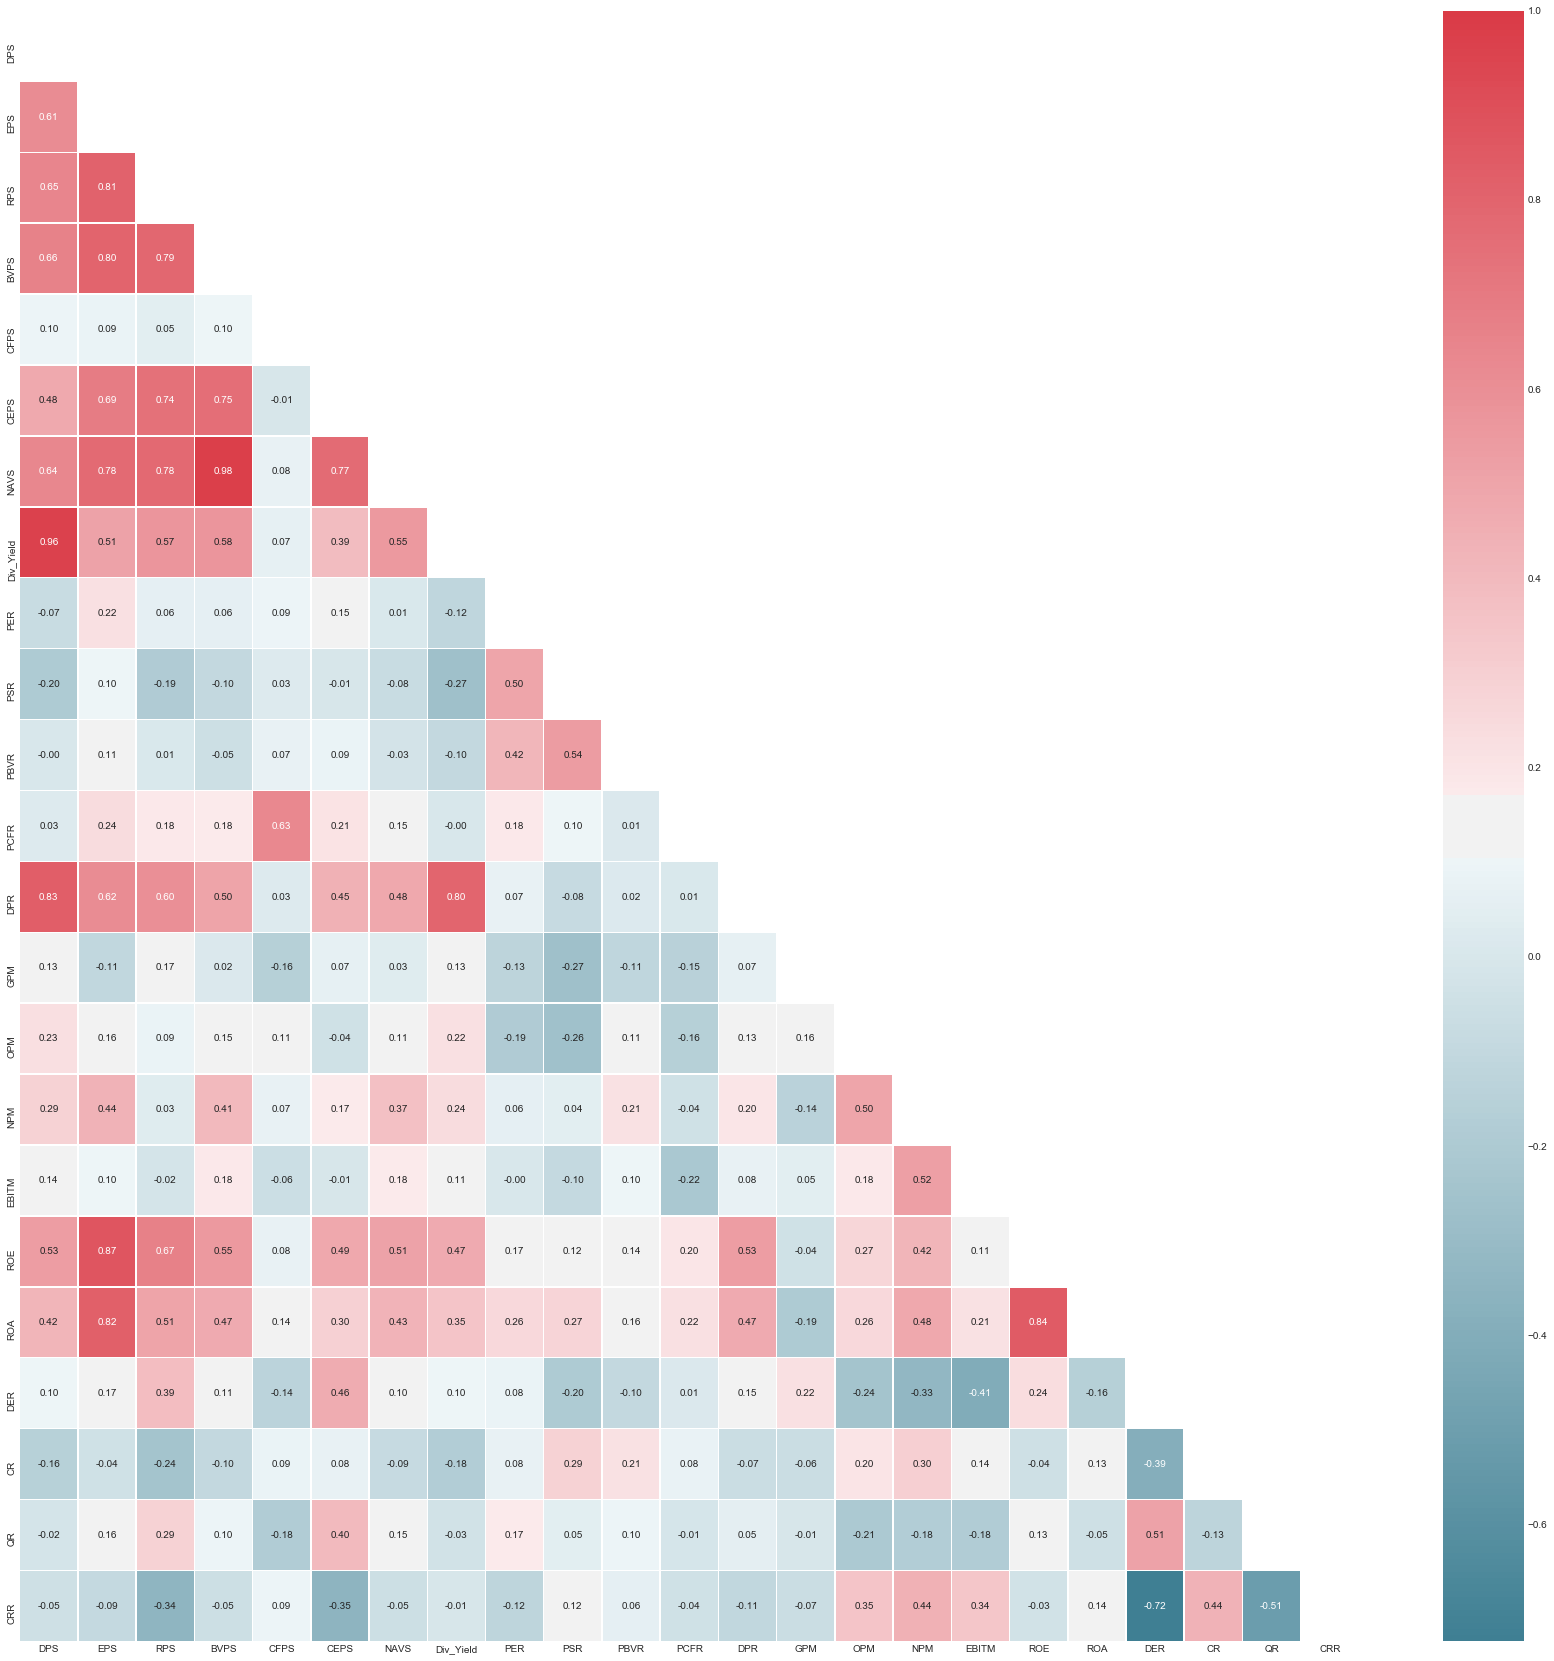

In [43]:
corr = finance_value_drop2.corr(method='spearman')
fig, ax = plt.subplots(figsize = (30,30))
colormap = sns.diverging_palette(220,10, as_cmap=True)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
colormap = sns.diverging_palette(220,10, as_cmap = True)
sns.heatmap(corr, cmap=colormap, linewidth=0.5, annot=True, fmt=".2f", mask=dropSelf)
plt.show()

<hr>

# Visualisasi `Dividen Yield` Pada Perusahaan Sektor Finance (Target Feature)

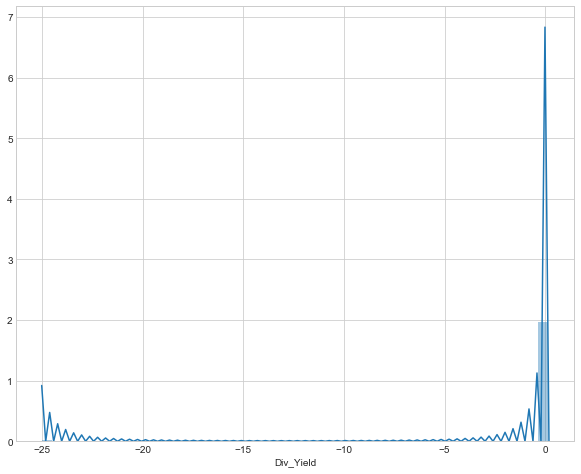

In [44]:
plt.figure(figsize=(10,8))
sns.distplot(finance['Div_Yield'])

## Visualisasi Tingkat Hutang terhadap Ekuitas Pada Perusahaan sektor Finance

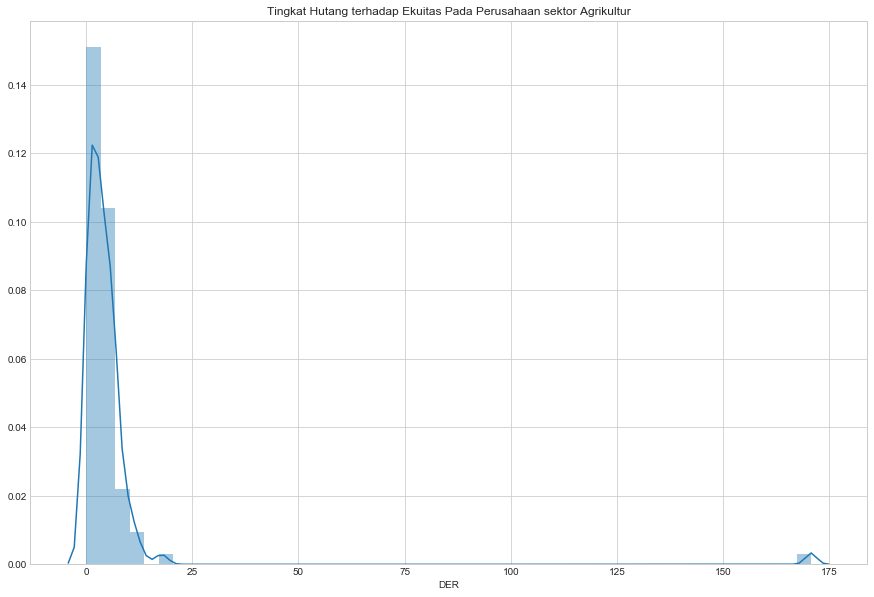

In [45]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(15,10))

sns.distplot(finance['DER'])
plt.title('Tingkat Hutang terhadap Ekuitas Pada Perusahaan sektor Agrikultur')
plt.show()

## Visualisasi Margin Keutungan Bersih pada Perusahaan sektor Finance

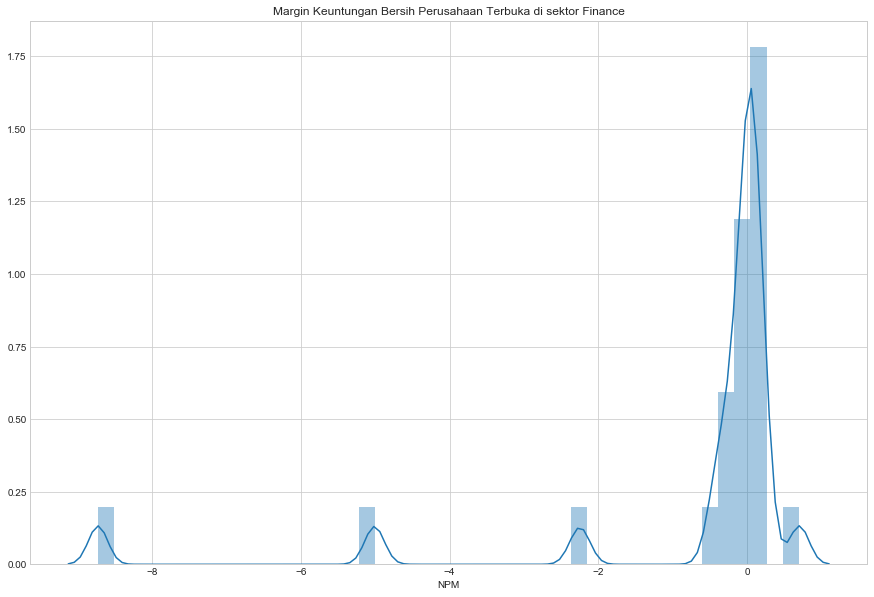

In [46]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(15,10))

sns.distplot(agriculture['NPM'])
plt.title('Margin Keuntungan Bersih Perusahaan Terbuka di sektor Finance')
plt.show()

## Visualisasi Ekuitas Perusahan Terbuka di sektor Finance

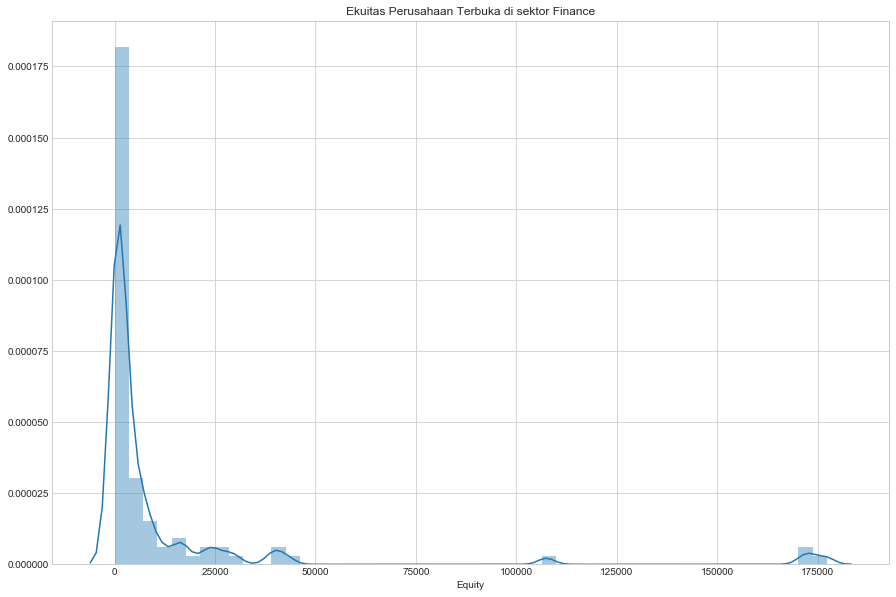

In [47]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(15,10))

sns.distplot(finance['Equity'])
plt.title('Ekuitas Perusahaan Terbuka di sektor Finance')
plt.show()

## Visualisasi Rasio Likuiditas Perusahaan Terbuka di sektor Finance

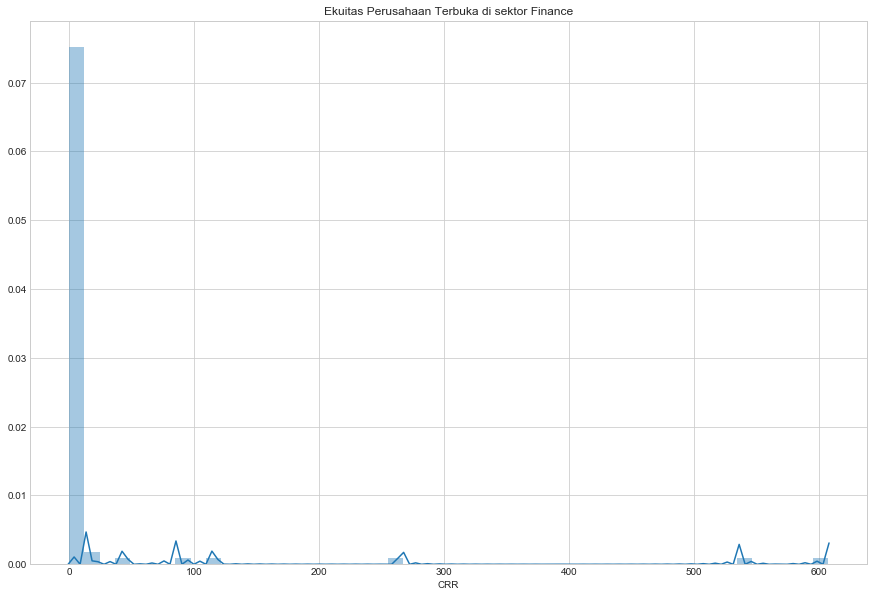

In [48]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(15,10))

sns.distplot(finance['CRR'])
plt.title('Ekuitas Perusahaan Terbuka di sektor Finance')
plt.show()

<hr>

## __C. Exploratory Data Analysis pada Sektor Consumer Goods__

In [49]:
consumer = sql_df('''Select * from consumer_goods_industry''')
consumer.head().T

0                               1  \
Company_Name  Akasha Wira International Tbk.  Tiga Pilar Sejahtera Food Tbk.   
Code_Name                               ADES                            AISA   
Subsector                 Food And Beverages              Food And Beverages   
MR_Quarter                        31/03/2020                      31/12/2019   
Fin_Yr_End                          December                        December   
Iss_Share                             0.5899                            4.79   
Mar_Cap                               504.36                           804.3   
St_Ind                                  44.4                            20.4   
Sales                                 198.99                            1510   
Assets                                845.98                            1870   
Liability                             256.83                            3530   
Equity                                589.15                           -1660   
Cash_Flow                              76.74                           12.18   
Op_Profit                              20.31                          -91.17   
Net_Profit                             21.21                            1130   
DPS                                        0                               0   
EPS                                      144                             237   
RPS                                     1349                             469   
BVPS                                     999                            -346   
CFPS                                     520                               4   
CEPS                                     305                              17   
NAVS                                     999                            -515   
Div_Yield                                  0                               0   
PER                                     5.94                            0.71   
PSR                                     0.63                            0.36   
PBVR                                    0.86                           -0.49   
PCFR                                    1.64                           44.38   
DPR                                        0                               0   
GPM                                   0.4601                          0.2962   
OPM                                    0.102                         -0.0603   
NPM                                   0.1066                           0.751   
EBITM                                 0.1138                          0.8221   
ROE                                    0.144                         -0.6846   
ROA                                   0.1002                          0.6069   
DER                                   0.4359                         -2.1287   
CR                                    0.9662                          0.0478   
QR                                    1.6447                          0.3444   
CRR                                   2.0444                          0.4114   

                                  2                             3  \
Company_Name  Tri Banyan Tirta Tbk.  Bumi Teknokultura Unggul Tbk   
Code_Name                      ALTO                          BTEK   
Subsector        Food And Beverages            Food And Beverages   
MR_Quarter               31/03/2020                    31/03/2020   
Fin_Yr_End                 December                      December   
Iss_Share                      2.19                         46.28   
Mar_Cap                      723.32                          2310   
St_Ind                        164.9                         383.1   
Sales                         93.78                        366.48   
Assets                         1110                          6000   
Liability                       731                          3580   
Equity                       375.68                          2430   
Cash_Flow                

<hr>

### __1c. Ada subsektor apa saja pada perusahaan sektor consumer goods?__

In [51]:
consumer['Subsector'].value_counts()

Food And Beverages          28
Pharmaceuticals             10
Houseware                    6
Cosmetics And Household      5
Tobacco Manufacturers        3
Tobacco Manufacturers        2
Plantation                   1
 Cosmetics And Household     1
Food And Beverages           1
Others - Agriculture         1
Name: Subsector, dtype: int64

### __2c. Kita sekarang mengetahui jika subsector paling banyak pada sektor `Consumer Goods and Industry` adalah subsektor `Food and Beverages`. Sekarang, perusahaan apa yang memiliki penjualan paling tinggi pada sektor `Consumer Goods and Industry` pada Q1 2020?__

In [52]:
consumer[['Company_Name', 'Code_Name', 'Subsector', 'Sales']].sort_values(by='Sales', ascending=False).head()

Company_Name Code_Name                 Subsector  \
15               Gudang Garam Tbk.      GGRM    Tobacco Manufacturers    
17             H.M. Sampoerna Tbk.      HMSP    Tobacco Manufacturers    
24     Indofood Sukses Makmur Tbk.      INDF        Food And Beverages   
20  Indofood CBP Sukses Makmur Tbk      ICBP        Food And Beverages   
55         Unilever Indonesia Tbk.      UNVR   Cosmetics And Household   

      Sales  
15  27260.0  
17  23690.0  
24  19300.0  
20  12010.0  
55  11150.0

### __3c. Perusahaan apa yang memiliki keuntungan bersih paling tinggi pada sektor `Consumer Goods and Industry` pada Q1 2020 ini?__

In [53]:
sql_df("""SELECT Company_Name as NamaPerusahaan,
Code_Name as KodeSaham,
Net_Profit as ProfitBersih_dalam_milliar
from consumer_goods_industry
order by Net_Profit desc
LIMIT 5
""")

NamaPerusahaan KodeSaham  ProfitBersih_dalam_milliar
0             H.M. Sampoerna Tbk.      HMSP                      3320.0
1               Gudang Garam Tbk.      GGRM                      2450.0
2  Indofood CBP Sukses Makmur Tbk      ICBP                      1980.0
3         Unilever Indonesia Tbk.      UNVR                      1860.0
4     Indofood Sukses Makmur Tbk.      INDF                      1400.0

### __4c. Perusahaan apa saja yang memiliki keuntungan bersih paling tinggi pada subsektor `Foods and Beverages` pada Q1 2020 ini?__

In [54]:
sql_df('''select Company_Name as NamaPerusahaan,
Code_Name as KodeSaham,
Net_Profit as ProfitBersih_dalam_milliar
from consumer_goods_industry
where Subsector = 'Food and Beverages'
order by Net_Profit DESC
LIMIT 5''')

NamaPerusahaan KodeSaham  ProfitBersih_dalam_milliar
0  Indofood CBP Sukses Makmur Tbk      ICBP                     1980.00
1     Indofood Sukses Makmur Tbk.      INDF                     1400.00
2  Tiga Pilar Sejahtera Food Tbk.      AISA                     1130.00
3               Mayora Indah Tbk.      MYOR                      931.39
4  Ultra Jaya Milk Industry & Tra      ULTJ                      435.76

### __5c. Perusahaan mana saja yang memiliki ekuitas terbesar pada sektor `Consumer Goods Industry` pada Q1 2020 ini?__

In [55]:
sql_df('''select Company_Name as NamaPerusahaan,
Code_Name as KodeSaham,
Equity as Ekuitas
from consumer_goods_industry
order by equity DESC
LIMIT 5
''')

NamaPerusahaan KodeSaham  Ekuitas
0               Gudang Garam Tbk.      GGRM  53380.0
1     Indofood Sukses Makmur Tbk.      INDF  39790.0
2             H.M. Sampoerna Tbk.      HMSP  39070.0
3  Indofood CBP Sukses Makmur Tbk      ICBP  27300.0
4                Kalbe Farma Tbk.      KLBF  16440.0

### __6c. Perusahan mana saja yang memiliki margin keuntungan bersih paling tinggi di sektor `Consumer Goods Industry` pada Q1 2020 ini?__

In [56]:
sql_df('''Select Company_Name as NamaPerusahaan,
Code_Name as KodeSaham,
Sales as Penjualan,
Net_Profit as KeuntunganBersih,
NPM as Persentase
from consumer_goods_industry
order by NPM DESC
LIMIT 5''')

NamaPerusahaan KodeSaham  Penjualan  KeuntunganBersih  \
0  Tiga Pilar Sejahtera Food Tbk.      AISA    1510.00           1130.00   
1  Industri Jamu dan Farmasi Sido      SIDO     730.72            231.53   
2             Delta Djakarta Tbk.      DLTA     153.06             42.43   
3  Ultra Jaya Milk Industry & Tra      ULTJ    1610.00            435.76   
4    Multi Bintang Indonesia Tbk.      MLBI     627.35            139.92   

   Persentase  
0      0.7510  
1      0.3168  
2      0.2771  
3      0.2699  
4      0.2230

### __7c. Perusahaan apa pada sektor `Consumer Goods Industry` di Q1 2020 yang__ 
  #### a.memiliki *__dividen yield__* diatas 4% 
  #### b.memiliki *__tingkat harga saham terhadap nilai bukunya__* tidak melebihi 2x
  #### c.*__rasio hutang terhadap ekuitas__* tidak melebihi 200% dari ekuitasnya
  #### d.*__rasio pembagian dividen yang tinggi terhadap laba bersihnya__* (diatas 20%)
  #### e.*__pengembalian laba bersih terhadap ekuitas lebih dari 2%?__*
  #### f. diurutkan dari *__rasio likuiditas__* tertinggi. Tampilkan 10 perusahaan.

In [57]:
recom_consumer = sql_df('''select Company_Name,
Code_Name,
Subsector,
Equity,
PBVR,
DER,
Div_Yield,
ROE,
DPR
from consumer_goods_industry
where DER < 2 and Div_Yield > 0.04 and ROE > 0.02 and DPR > 0.2 and PBVR < 2 and PBVR > 0
ORDER BY QR DESC
Limit 10''')
recom_consumer

Company_Name Code_Name               Subsector   Equity  \
0  Wilmar Cahaya Indonesia Tbk.      CEKA      Food And Beverages   1200.0   
1  Darya-Varia Laboratoria Tbk.      DVLA         Pharmaceuticals   1350.0   
2  Budi Starch & Sweetener Tbk.      BUDI      Food And Beverages   1200.0   
3             Gudang Garam Tbk.      GGRM  Tobacco Manufacturers   53380.0   

   PBVR     DER  Div_Yield     ROE     DPR  
0  0.97  0.1952     0.0510  0.2216  0.2242  
1  1.87  0.4374     0.0476  0.1679  0.5297  
2  0.32  1.2986     0.0595  0.0223  0.8333  
3  1.69  0.4394     0.0555  0.1833  0.5112

In [58]:
# recom_consumer.to_csv('Consumer.csv')

<hr>

## Descriptive Analysis

In [59]:
consumer.describe().T

count          mean            std        min         25%  \
Iss_Share    58.0      8.675869      18.301631     0.0036    0.834997   
Mar_Cap      58.0  17796.902414   49869.371199    25.0100  382.135000   
St_Ind       58.0   6128.191379   27890.903074     8.8000   83.800000   
Sales        58.0   2372.895517    5528.569187     2.8700   88.740000   
Assets       58.0   8536.056897   19021.316375    24.4800  599.625000   
Liability    58.0   3542.369655    7751.753487    24.8500  172.460000   
Equity       58.0   4641.373793   10430.763348 -1660.0000  297.432500   
Cash_Flow    58.0    481.163883    1923.950259  -599.5200    0.070387   
Op_Profit    58.0    331.992009     840.164481   -91.1700    1.330000   
Net_Profit   58.0    272.802278     663.519755   -76.0900    0.704603   
DPS          58.0    129.453276     476.519070     0.0000    0.000000   
EPS          58.0   1825.586207   12555.290254  -211.0000    2.000000   
RPS          58.0  15570.310345  101916.003185     0.0000  225.500000   
BVPS         58.0   4591.741379   25767.592845  -346.0000  189.250000   
CFPS         58.0   4614.327586   30693.372120  -245.0000   -0.750000   
CEPS         58.0    398.706897    1466.589552     0.0000    5.250000   
NAVS         58.0   4630.741379   25768.138724  -515.0000  189.500000   
Div_Yield    58.0      0.031934       0.113630     0.0000    0.000000   
PER          58.0     15.809138      38.623509  -100.0000    0.402500   
PSR          58.0      4.720690      19.182869     0.0400    0.485000   
PBVR         58.0      2.268448       9.074168   -50.0000    0.757500   
PCFR         58.0     22.365000     135.404019  -392.7100   -0.345000   
DPR          58.0      0.415012       1.180712    -1.2883    0.000000   
GPM          58.0      0.296836       0.241894    -1.0099    0.188975   
OPM          58.0      0.047271       0.283159    -1.6949    0.009050   
NPM          58.0      0.038695       0.227436    -1.2006    0.004200   
EBITM        58.0      0.021041       0.293764    -1.5892   -0.033700   
ROE          58.0     -0.030740       1.104871    -8.0991    0.005500   
ROA          58.0      0.066457       0.133954    -0.4023    0.003125   
DER          58.0      0.929847       2.688873    -9.2553    0.352150   
CR           58.0      0.698397       1.239429     0.0013    0.041350   
QR           58.0      3.333683      12.592669     0.1177    0.628600   
CRR          58.0      4.619212      15.227409     0.4114    1.302425   

                   50%          75%          max  
Iss_Share      1.90000     6.280000     116.3200  
Mar_Cap     1400.00000  7372.500000  302340.0000  
St_Ind       219.30000   694.350000  202893.0000  
Sales        412.66500  1410.000000   27260.0000  
Assets      1595.00000  5527.500000  102660.0000  
Liability    624.61000  2745.000000   46090.0000  
Equity       920.08500  2847.500000   53380.0000  
Cash_Flow     18.08500   158.690000   13710.0000  
Op_Profit     30.19000   130.250000    3950.0000  
Net_Profit    17.94000    97.587500    3320.0000  
DPS            3.25000    43.500000    2600.0000  
EPS           30.00000   160.250000   95659.0000  
RPS          616.50000  1367.750000  776263.0000  
BVPS         343.50000   964.750000  195304.0000  
CFPS          30.50000   121.750000  232628.0000  
CEPS          35.00000   166.250000   10924.0000  
NAVS         352.00000   966.500000  195304.0000  
Div_Yield      0.00705     0.032200       0.8636  
PER           12.12500    24.900000     137.5000  
PSR            1.06000     2.862500     146.0900  
PBVR           1.80500     3.837500      41.9300  
PCFR           7.78500    18.465000     825.8400  
DPR            0.08605     0.468975       8.2212  
GPM            0.30895     0.413825       0.6924  
OPM            0.08215     0.164575       0.3817  
NPM            0.04330     0.117850       0.7510  
EBITM          0.04385     0.145425       0.8221  
ROE            0.08415     0.193350       1.0320  
ROA            0.04675     0.125700       0.6069  

<hr>

## Correlation Analysis

In [60]:
consumer_try_1 = consumer.copy()

In [61]:
consumer_value_drop1 = consumer_try_1.drop(['DPR', 'DPS', 'EPS', 'RPS', 'BVPS', 'CFPS', 'CEPS', 'NAVS', 'PER', 'PSR', 'PBVR', 'PCFR', 'GPM', 'OPM', 'NPM', 'EBITM', 'ROE', 'ROA', 'CR', 'QR', 'CRR', 'DER'], axis=1)
consumer_value_drop1.head().T

0                               1  \
Company_Name  Akasha Wira International Tbk.  Tiga Pilar Sejahtera Food Tbk.   
Code_Name                               ADES                            AISA   
Subsector                 Food And Beverages              Food And Beverages   
MR_Quarter                        31/03/2020                      31/12/2019   
Fin_Yr_End                          December                        December   
Iss_Share                             0.5899                            4.79   
Mar_Cap                               504.36                           804.3   
St_Ind                                  44.4                            20.4   
Sales                                 198.99                            1510   
Assets                                845.98                            1870   
Liability                             256.83                            3530   
Equity                                589.15                           -1660   
Cash_Flow                              76.74                           12.18   
Op_Profit                              20.31                          -91.17   
Net_Profit                             21.21                            1130   
Div_Yield                                  0                               0   

                                  2                             3  \
Company_Name  Tri Banyan Tirta Tbk.  Bumi Teknokultura Unggul Tbk   
Code_Name                      ALTO                          BTEK   
Subsector        Food And Beverages            Food And Beverages   
MR_Quarter               31/03/2020                    31/03/2020   
Fin_Yr_End                 December                      December   
Iss_Share                      2.19                         46.28   
Mar_Cap                      723.32                          2310   
St_Ind                        164.9                         383.1   
Sales                         93.78                        366.48   
Assets                         1110                          6000   
Liability                       731                          3580   
Equity                       375.68                          2430   
Cash_Flow                      9.66                       -599.52   
Op_Profit                  -0.22416                         -4.29   
Net_Profit                    -3.38                          1.08   
Div_Yield                         0                             0   

                                         4  
Company_Name  Budi Starch & Sweetener Tbk.  
Code_Name                             BUDI  
Subsector               Food And Beverages  
MR_Quarter                      31/03/2020  
Fin_Yr_End                        December  
Iss_Share                              4.5  
Mar_Cap                             377.92  
St_Ind                                45.5  
Sales                               680.05  
Assets                                2850  
Liability                             1550  
Equity                                1200  
Cash_Flow                            90.14  
Op_Profit                             48.9  
Net_Profit                            6.69  
Div_Yield                           0.0595

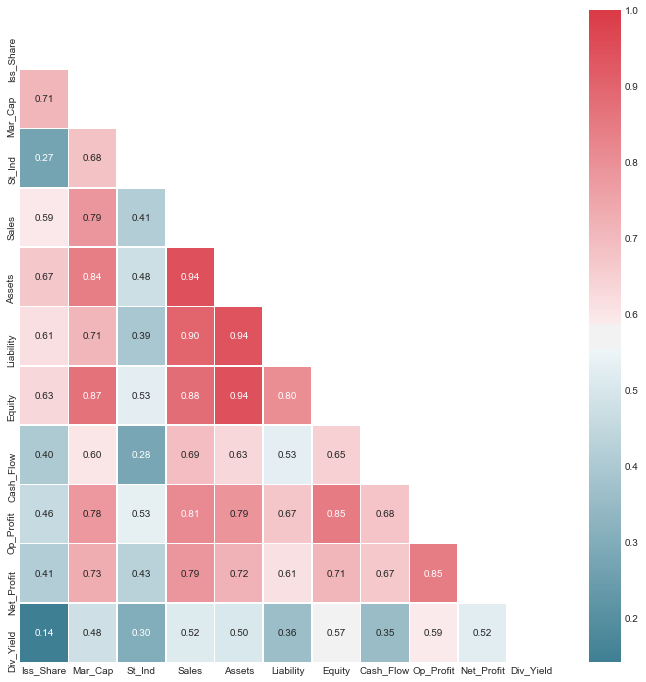

In [62]:
corr = consumer_value_drop1.corr(method='spearman')
fig, ax = plt.subplots(figsize = (12,12))
colormap = sns.diverging_palette(220,10, as_cmap=True)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
colormap = sns.diverging_palette(220,10, as_cmap = True)
sns.heatmap(corr, cmap=colormap, linewidth=0.5, annot=True, fmt=".2f", mask=dropSelf)
plt.show()

In [63]:
consumer_try_2 = consumer.copy()
consumer_value_drop2 = consumer_try_2.drop(['Iss_Share', 'Mar_Cap', 'St_Ind', 'Sales', 'Equity', 'Assets', 'Liability', 'Cash_Flow', 'Op_Profit', 'Net_Profit'], axis=1)
consumer_value_drop2.head().T

0                               1  \
Company_Name  Akasha Wira International Tbk.  Tiga Pilar Sejahtera Food Tbk.   
Code_Name                               ADES                            AISA   
Subsector                 Food And Beverages              Food And Beverages   
MR_Quarter                        31/03/2020                      31/12/2019   
Fin_Yr_End                          December                        December   
DPS                                        0                               0   
EPS                                      144                             237   
RPS                                     1349                             469   
BVPS                                     999                            -346   
CFPS                                     520                               4   
CEPS                                     305                              17   
NAVS                                     999                            -515   
Div_Yield                                  0                               0   
PER                                     5.94                            0.71   
PSR                                     0.63                            0.36   
PBVR                                    0.86                           -0.49   
PCFR                                    1.64                           44.38   
DPR                                        0                               0   
GPM                                   0.4601                          0.2962   
OPM                                    0.102                         -0.0603   
NPM                                   0.1066                           0.751   
EBITM                                 0.1138                          0.8221   
ROE                                    0.144                         -0.6846   
ROA                                   0.1002                          0.6069   
DER                                   0.4359                         -2.1287   
CR                                    0.9662                          0.0478   
QR                                    1.6447                          0.3444   
CRR                                   2.0444                          0.4114   

                                  2                             3  \
Company_Name  Tri Banyan Tirta Tbk.  Bumi Teknokultura Unggul Tbk   
Code_Name                      ALTO                          BTEK   
Subsector        Food And Beverages            Food And Beverages   
MR_Quarter               31/03/2020                    31/03/2020   
Fin_Yr_End                 December                      December   
DPS                               0                             0   
EPS                              -6                             0   
RPS                             171                            32   
BVPS                            171                            52   
CFPS                             18                           -52   
CEPS                              3                             0   
NAVS                            172                            52   
Div_Yield                         0                             0   
PER                             -55                             0   
PSR                            1.93                          1.58   
PBVR                           1.93                          0.96   
PCFR                          18.72                         -0.96   
DPR                               0                             0   
GPM                          0.1027                        0.0024   
OPM                         -0.0023                       -0.0116   
NPM                          -0.036                        0.0029   
EBITM                       -0.0517                       -0.0404   
ROE                         -0.0359                        0.0017   
ROA                         -0.0122                        0.0007 

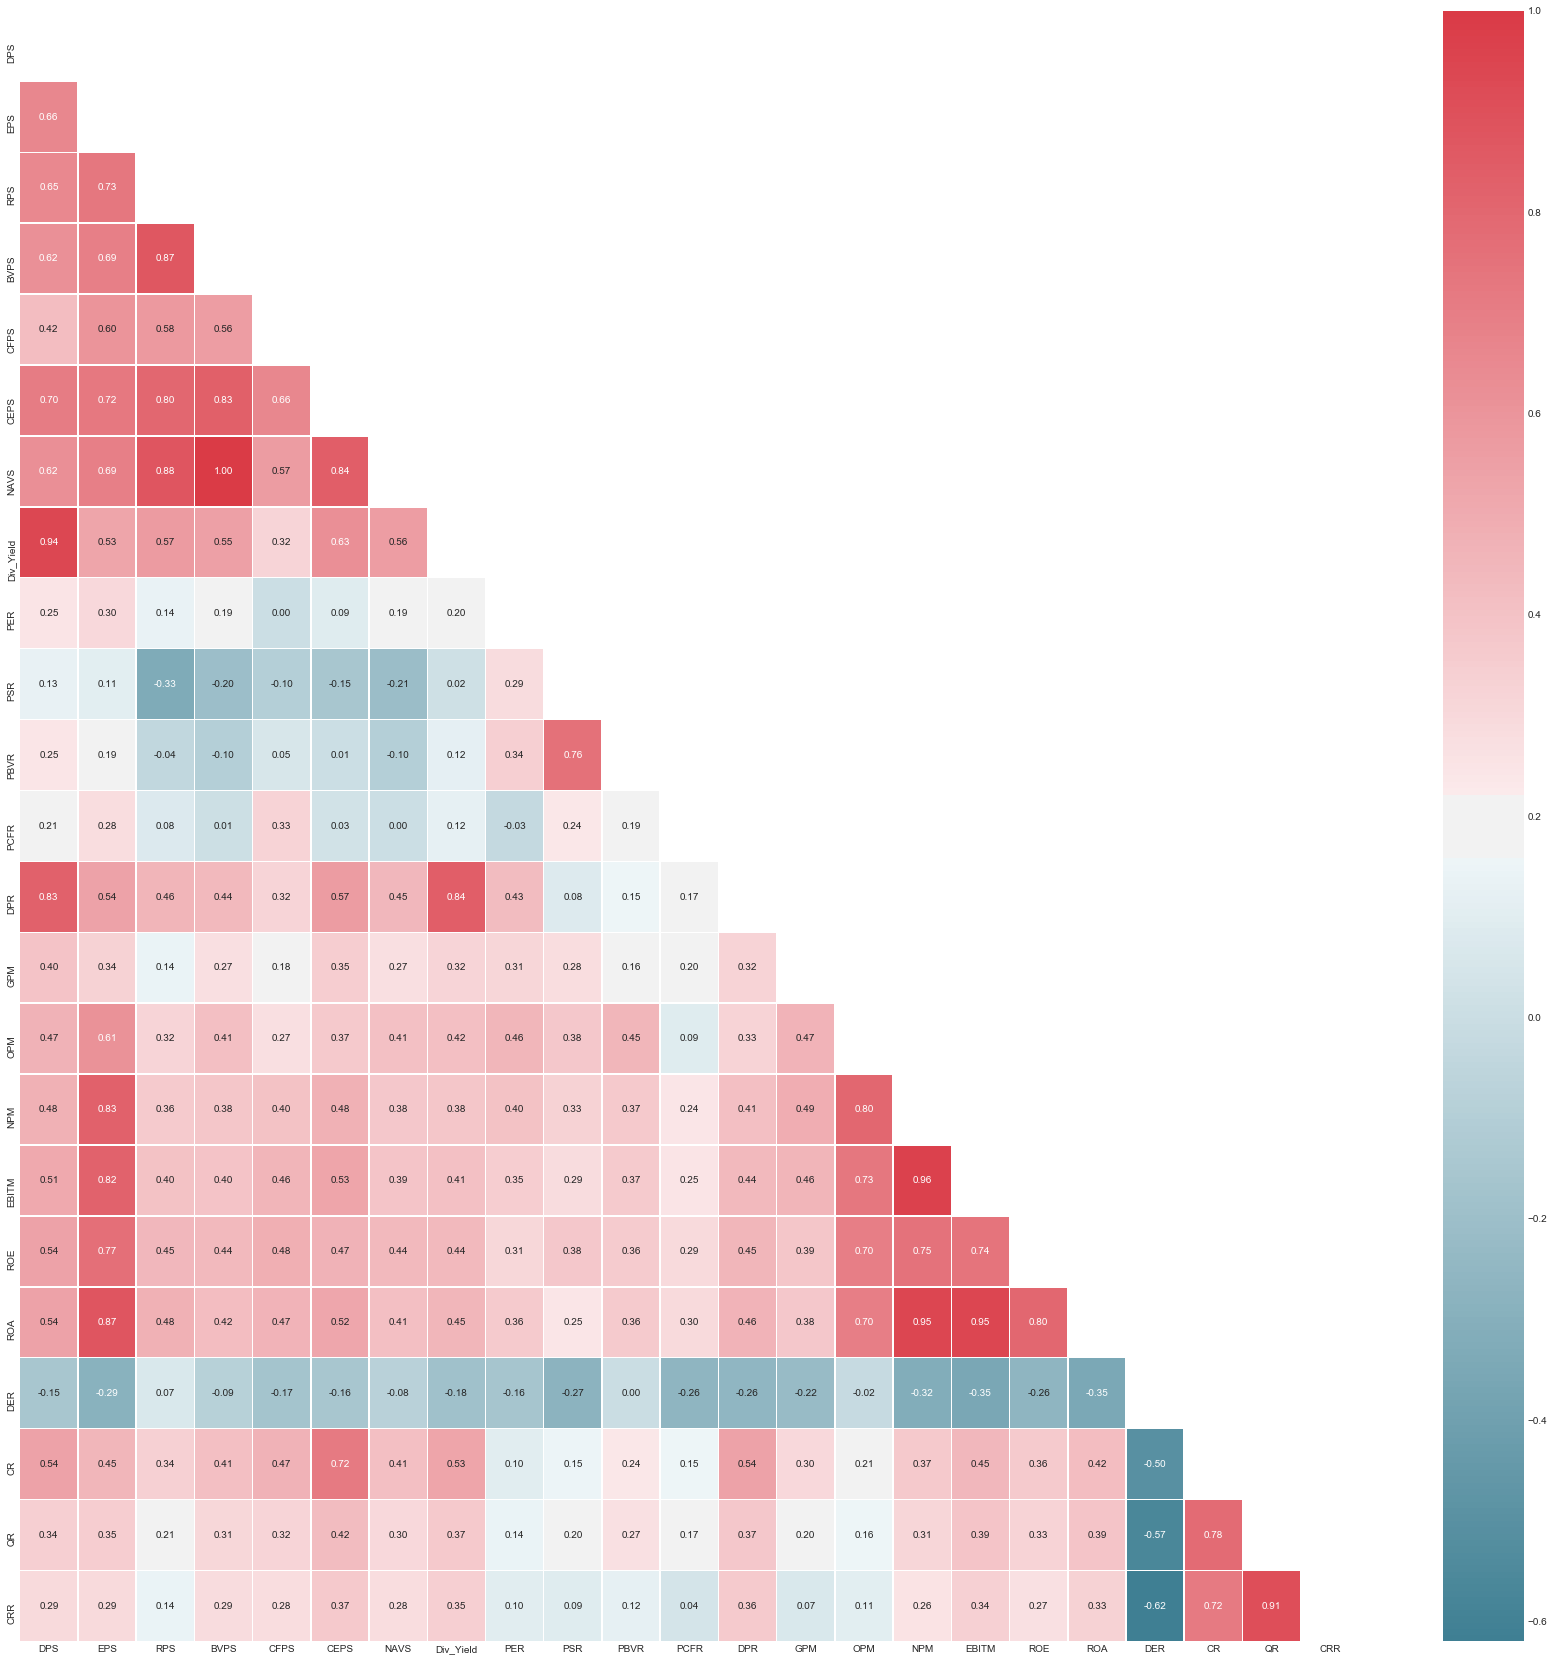

In [64]:
corr = consumer_value_drop2.corr(method='spearman')
fig, ax = plt.subplots(figsize = (30,30))
colormap = sns.diverging_palette(220,10, as_cmap=True)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
colormap = sns.diverging_palette(220,10, as_cmap = True)
sns.heatmap(corr, cmap=colormap, linewidth=0.5, annot=True, fmt=".2f", mask=dropSelf)
plt.show()

## Visualisasi Feature Dividen Yield Pada Sektor Consumer Goods Industry (Target Feature)

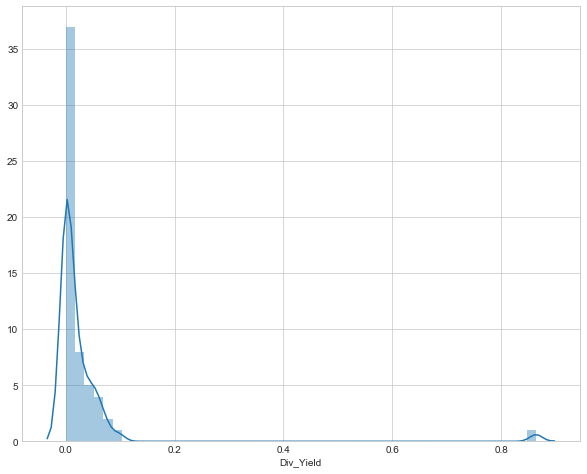

In [65]:
plt.figure(figsize=(10,8))
sns.distplot(consumer['Div_Yield'])

## Visualisasi Tingkat Hutang terhadap Ekuitas pada Perusahaan di sektor Consumer Goods Industry

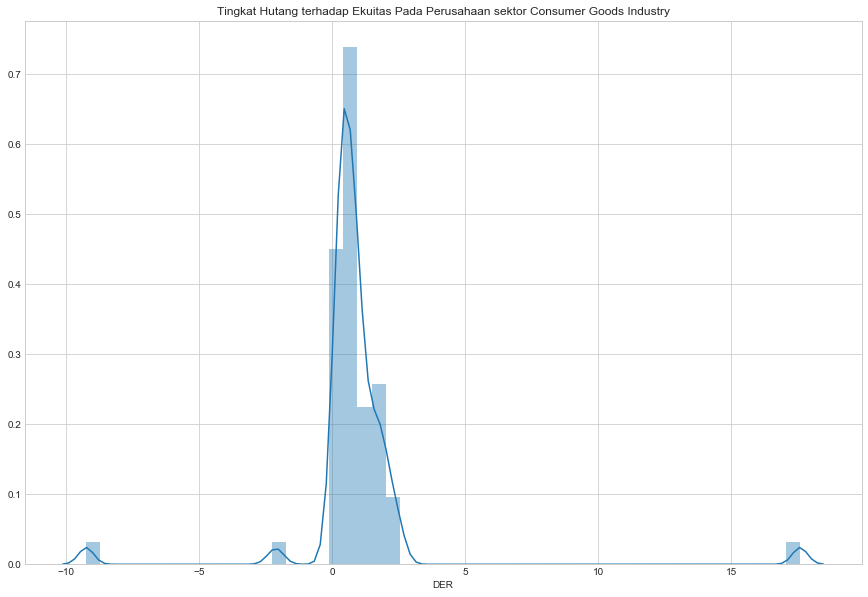

In [66]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(15,10))

sns.distplot(consumer['DER'])
plt.title('Tingkat Hutang terhadap Ekuitas Pada Perusahaan sektor Consumer Goods Industry')
plt.show()

## Visualisasi Margin Keuntungan Bersih Perusahaan Sektor Consumer Goods Industry

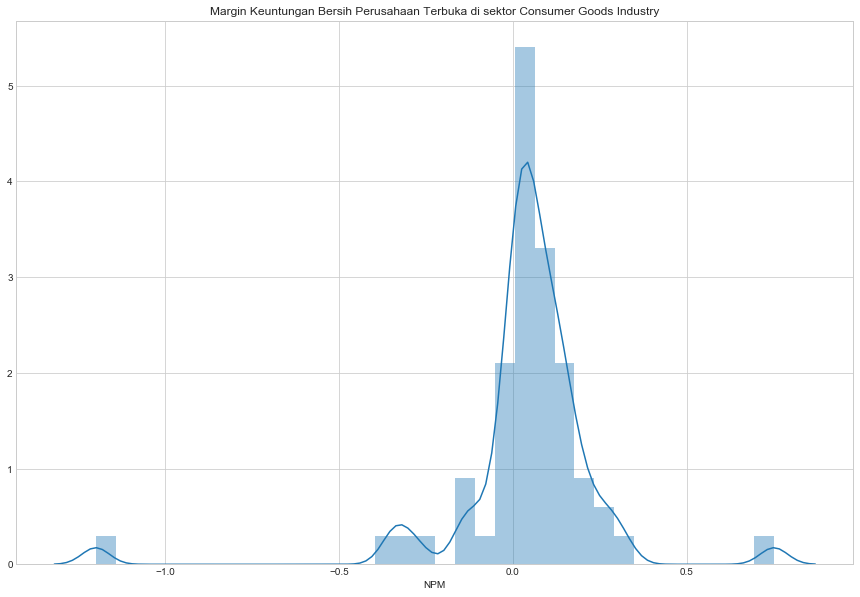

In [67]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(15,10))

sns.distplot(consumer['NPM'])
plt.title('Margin Keuntungan Bersih Perusahaan Terbuka di sektor Consumer Goods Industry')
plt.show()

## Visualisasi Besaran Ekuitas Perusahaan Terbuka di Indonesia pada sektor Consumer Goods Industry

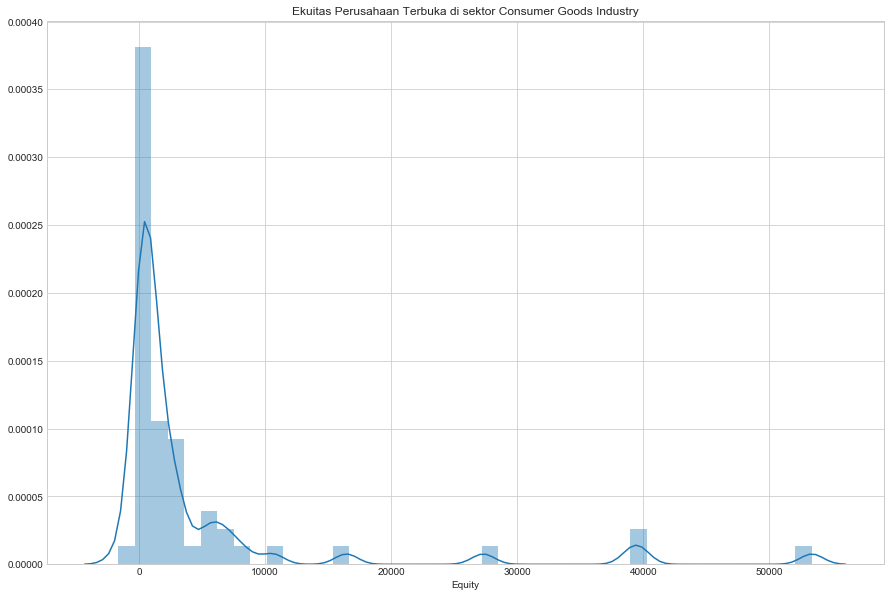

In [68]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(15,10))

sns.distplot(consumer['Equity'])
plt.title('Ekuitas Perusahaan Terbuka di sektor Consumer Goods Industry')
plt.show()

## Visualisasi Rasio Likuiditas Perusahaan Terbuka di sektor Consumer Goods Industry

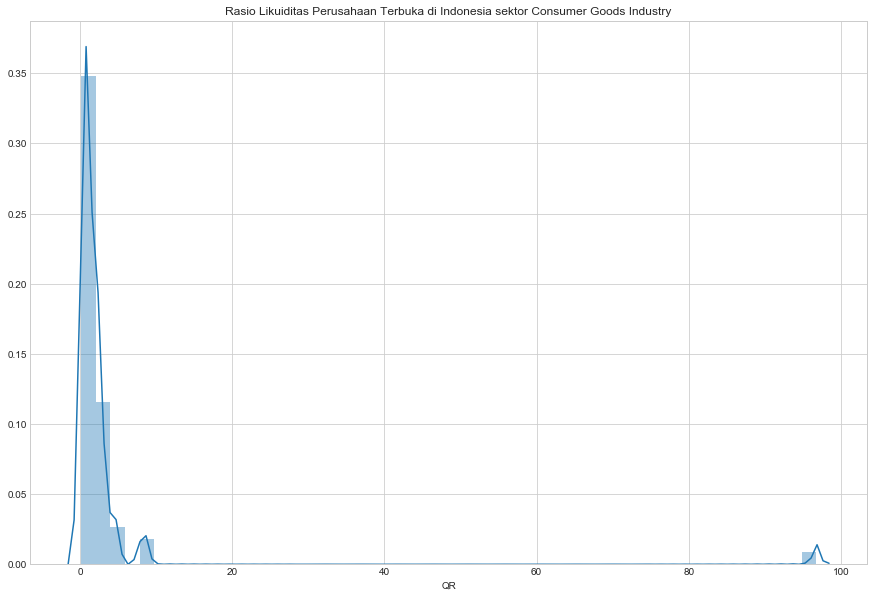

In [69]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(15,10))

sns.distplot(consumer['QR'])
plt.title('Rasio Likuiditas Perusahaan Terbuka di Indonesia sektor Consumer Goods Industry')
plt.show()

<hr>

## __D. Exploratory Data Analysis pada Sektor Trade, Service and Investment__

In [70]:
trade = sql_df('''select * from trade_service_and_invesment''')
trade.head().T

0                   1  \
Company_Name               Mahaka Media Tbk.  ABM Investama Tbk.   
Code_Name                               ABBA                ABMM   
Subsector     Advertising, Printing And Medi  Investment Company   
MR_Quarter                        31/03/2020          31/03/2020   
Fin_Yr_End                          December            December   
Iss_Share                               2.76                2.75   
Mar_Cap                               137.76                3630   
St_Ind                                  87.7                35.2   
Sales                                  41.19             2264.36   
Assets                                404.09             12458.3   
Liability                             351.67             9105.88   
Equity                                 69.88              3631.6   
Cash_Flow                               -9.5              187.88   
Op_Profit                              -9.52              224.56   
Net_Profit                             -7.99                25.2   
DPS                                        0               13.17   
EPS                                      -12                36.4   
RPS                                       60                3290   
BVPS                                      25              1318.8   
CFPS                                     -14                 273   
CEPS                                       7                 553   
NAVS                                      19                1218   
Div_Yield                                  0                0.01   
PER                                    -4.17                30.9   
PSR                                     0.84                0.34   
PBVR                                       2                0.86   
PCFR                                   -3.63                4.14   
DPR                                        0              0.3063   
GPM                                   0.5351              0.1765   
OPM                                  -0.2311              0.0991   
NPM                                   -0.194              0.0111   
EBITM                                -0.2843             -0.0155   
ROE                                  -0.4575              0.0276   
ROA                                  -0.0791               0.008   
DER                                   5.0324              2.5074   
CR                                    0.1006              0.4383   
QR                                    0.7452              1.0022   
CRR                                   0.7827              1.1279   

                                        2                               3  \
Company_Name  Ace Hardware Indonesia Tbk.        Asia Sejahtera Mina Tbk.   
Code_Name                            ACES                            AGAR   
Subsector                    Retail Trade  Wholesale (Durable & Non-Durab   
MR_Quarter                     31/03/2020                      31/03/2020   
Fin_Yr_End                       December                        December   
Iss_Share                           17.15                               1   
Mar_Cap                             27950                             498   
St_Ind                              198.8                           452.7   
Sales                                1970                           38.47   
Assets                               6990                          175.95   
Liability                            2090                            65.2   
Equity                               4880                          110.74   
Cash_Flow                          402.97                           11.31   
Op_Profit                          267.44                            -2.8   
Net_Profit                         245.68                            1.84   
DPS                                 28.25                               0   
EPS                                    57                               7   
RPS 

In [71]:
trade.columns

Index(['Company_Name', 'Code_Name', 'Subsector', 'MR_Quarter', 'Fin_Yr_End',
       'Iss_Share', 'Mar_Cap', 'St_Ind', 'Sales', 'Assets', 'Liability',
       'Equity', 'Cash_Flow', 'Op_Profit', 'Net_Profit', 'DPS', 'EPS', 'RPS',
       'BVPS', 'CFPS', 'CEPS', 'NAVS', 'Div_Yield', 'PER', 'PSR', 'PBVR',
       'PCFR', 'DPR', 'GPM', 'OPM', 'NPM', 'EBITM', 'ROE', 'ROA', 'DER', 'CR',
       'QR', 'CRR'],
      dtype='object')

<hr>

### __1d. Ada subsektor apa saja pada sektor `trade, service and investment`?__

In [72]:
trade['Subsector'].value_counts()

Wholesale (Durable & Non-Durab    47
Tourism, Restaurant And Hotel     40
Retail Trade                      24
Advertising, Printing And Medi    18
Computer And Services             12
Investment Company                11
Others - Trade Services & Inve    10
Healthcare                         9
Trade, Services & Investment       1
Others - Agriculture               1
Food And Beverages                 1
Name: Subsector, dtype: int64

In [73]:
trade[trade['Subsector'] == 'Food And Beverages']['Company_Name']

102    Magna Investama Mandiri Tbk.
Name: Company_Name, dtype: object

In [74]:
trade[trade['Subsector'] == 'Trade, Services & Investment']['Company_Name']

49    MD Pictures Tbk.
Name: Company_Name, dtype: object

### __2d. Sekarang kita mengetahui subsektor terbanyak pada sektor `Trade, Service and Investment` adalah subsektor `Wholesale (Durable & Non-durable)`. Perusahaan apa saja yang memiliki penjualan terbesar di sektor ini pada Q1 2020?__

In [75]:
sql_df('''select Company_Name as NamaPerusahan,
Code_Name as KodeSaham,
Subsector as Subsektor,
Sales as Penjualan_dalam_Milliar
from trade_service_and_invesment
order by Sales DESC
LIMIT 5''')

NamaPerusahan KodeSaham                       Subsektor  \
0  Tiphone Mobile Indonesia Tbk.      TELE                    Retail Trade   
1    Sumber Alfaria Trijaya Tbk.      AMRT  Wholesale (Durable & Non-Durab   
2           United Tractors Tbk.      UNTR  Wholesale (Durable & Non-Durab   
3        Erajaya Swasembada Tbk.      ERAA                    Retail Trade   
4            AKR Corporindo Tbk.      AKRA  Wholesale (Durable & Non-Durab   

   Penjualan_dalam_Milliar  
0                  19950.0  
1                  19330.0  
2                  18310.0  
3                   7810.0  
4                   6350.0

### __3d. Perusahaan apa saja yang memiliki penjualan tertinggi pada subsektor `Wholesale (Durable & Non-Durable)`__

In [76]:
sql_df('''Select Company_Name as NamaPerusahaan, 
Code_Name as KodeSaham, 
Sales as Penjualan_dalam_Milliar
from trade_service_and_invesment
where Subsector = 'Wholesale (Durable & Non-Durab'
ORDER BY Sales DESC
LIMIT 5
''')

NamaPerusahaan KodeSaham  Penjualan_dalam_Milliar
0     Sumber Alfaria Trijaya Tbk.      AMRT                 19330.00
1            United Tractors Tbk.      UNTR                 18310.00
2             AKR Corporindo Tbk.      AKRA                  6350.00
3         Hexindo Adiperkasa Tbk.      HEXA                  5942.02
4  Enseval Putera Megatrading Tbk      EPMT                  5570.00

### __4d. Perusahaan apa saja yang memiliki profit bersih tertinggi pada sektor `Trade, Service and Investment` di Q1 2020 ini?__

In [77]:
sql_df('''Select Company_Name as NamaPerusahaan, 
Code_Name as KodeSaham,
Subsector as Subsektor,
Sales as Penjualan_dalam_Milliar,
Net_Profit as Keuntungan_bersih_dalam_Milliar
from trade_service_and_invesment
order by Net_Profit DESC
LIMIT 5''')

NamaPerusahaan KodeSaham                       Subsektor  \
0           United Tractors Tbk.      UNTR  Wholesale (Durable & Non-Durab   
1        Hexindo Adiperkasa Tbk.      HEXA  Wholesale (Durable & Non-Durab   
2  Tiphone Mobile Indonesia Tbk.      TELE                    Retail Trade   
3    Sumber Alfaria Trijaya Tbk.      AMRT  Wholesale (Durable & Non-Durab   
4     Media Nusantara Citra Tbk.      MNCN  Advertising, Printing And Medi   

   Penjualan_dalam_Milliar  Keuntungan_bersih_dalam_Milliar  
0                 18310.00                          1820.00  
1                  5942.02                           538.16  
2                 19950.00                           382.06  
3                 19330.00                           350.40  
4                  2020.00                           311.98

### __5d. Perusahaan apa saja yang memiliki margin keuntungan bersih paling tinggi pada sektor `Trade, Service, and Investment` di Q1 2020 ini?__

In [78]:
sql_df('''Select Company_Name as NamaPerusahaan,
Code_Name as KodeSaham,
Subsector as Subsektor,
Net_Profit as Keutungan_bersih_dalam_Milliar,
NPM as Margin_Keuntungan
from trade_service_and_invesment
where Net_Profit > 0
order by NPM DESC
Limit 5''')

NamaPerusahaan KodeSaham                       Subsektor  \
0  Indoritel Makmur Internasional      DNET           Computer And Services   
1  Aesler Grup Internasional Tbk.      RONY   Tourism, Restaurant And Hotel   
2                  Tanah Laut Tbk      INDX            Others - Agriculture   
3          Surya Citra Media Tbk.      SCMA  Advertising, Printing And Medi   
4  Multifiling Mitra Indonesia Tb      MFMI  Others - Trade Services & Inve   

   Keutungan_bersih_dalam_Milliar  Margin_Keuntungan  
0                        49.64000             0.5839  
1                         4.64000             0.4743  
2                         0.47758             0.3983  
3                       311.52000             0.2388  
4                         8.17000             0.2334

### __6d. Perusahaan apa saja yang memiliki tingkat hutang terhadap ekuitas paling rendah pada sektor `Trade, Service and Investment` di Q1 2020?__

In [79]:
sql_df('''Select Company_Name as NamaPerusahaan,
Code_Name as KodeSaham,
Subsector as Subsektor,
DER as Tingkat_Hutang_terhadap_Ekuitas
from trade_service_and_invesment
where DER > 0
order by DER
limit 5''')

NamaPerusahaan KodeSaham                       Subsektor  \
0      Sumber Energi Andalan Tbk.      ITMA  Others - Trade Services & Inve   
1  Nusantara Properti Internasion      NATO   Tourism, Restaurant And Hotel   
2  Optima Prima Metal Sinergi Tbk      OPMS  Wholesale (Durable & Non-Durab   
3                MD Pictures Tbk.      FILM    Trade, Services & Investment   
4   Tourindo Guide Indonesia Tbk.      PGJO   Tourism, Restaurant And Hotel   

   Tingkat_Hutang_terhadap_Ekuitas  
0                           0.0020  
1                           0.0055  
2                           0.0164  
3                           0.0202  
4                           0.0277

### __7d. Perusahaan apa saja yang memiliki Ekuitas paling tinggi pada sektor `Trade, Service, and Investment` di Q1 2020?__

In [80]:
sql_df('''Select Company_Name as NamaPerusahaan,
Code_Name as KodeSaham,
Subsector as Subsektor,
Equity as Ekuitas
from trade_service_and_invesment
order by Equity DESC
Limit 5''')

NamaPerusahaan KodeSaham                       Subsektor  \
0            United Tractors Tbk.      UNTR  Wholesale (Durable & Non-Durab   
1                   MNC Land Tbk.      KPIG   Tourism, Restaurant And Hotel   
2  Saratoga Investama Sedaya Tbk.      SRTG              Investment Company   
3              MNC Investama Tbk.      BHIT              Investment Company   
4      Media Nusantara Citra Tbk.      MNCN  Advertising, Printing And Medi   

   Ekuitas  
0  63100.0  
1  22720.0  
2  16720.0  
3  12620.0  
4  11700.0

### __8d. Perusahaan apa saja yang memiliki rasio likuiditas tertinggi pada sektor `Trade, Service and Investment` di Q1 2020?__

In [242]:
sql_df('''Select Company_Name as NamaPerusahaan,
Code_Name as KodeSaham,
Subsector as Subsektor,
QR as Rasio_Likuiditas
from trade_service_and_invesment
order by QR DESC
Limit 5''')

NamaPerusahaan KodeSaham                       Subsektor  \
0       Triwira Insanlestari Tbk.      TRIL  Wholesale (Durable & Non-Durab   
1  Nusantara Properti Internasion      NATO   Tourism, Restaurant And Hotel   
2  Optima Prima Metal Sinergi Tbk      OPMS  Wholesale (Durable & Non-Durab   
3  Metro Healthcare Indonesia Tbk      CARE                      Healthcare   
4                   Arthavest Tbk      ARTA   Tourism, Restaurant And Hotel   

   Rasio_Likuiditas  
0          724.3020  
1           42.3301  
2           27.1363  
3           24.5772  
4           19.8367

### __9d. Perusahaan apa pada sektor `Trade, Service and Investment` pada Q1 2020 ini yang;__
  #### a.memiliki *__dividen yield__* diatas 4% 
  #### b.memiliki *__tingkat harga saham terhadap nilai bukunya__* tidak melebihi 2x
  #### c.*__rasio hutang terhadap ekuitas__* tidak melebihi 200% dari ekuitasnya
  #### d.*__rasio pembagian dividen yang tinggi terhadap laba bersihnya__* (diatas 20%)
  #### e.*__pengembalian laba bersih terhadap ekuitas lebih dari 5%?__*
  #### f. diurutkan dari yang memiliki *__rasio likuiditas__* tertinggi. Tampilkan 13 perusahaan.

In [81]:
recom_trade = sql_df('''select Company_Name,
Code_Name,
Subsector,
Equity,
PBVR,
DER,
Div_Yield,
ROE,
DPR
from trade_service_and_invesment
where DER < 2 and Div_Yield > 0.04 and ROE > 0.02 and DPR > 0.2 and PBVR < 2 and PBVR > 0
ORDER BY QR DESC
Limit 15''')
recom_trade

Company_Name Code_Name                       Subsector  \
0   Multifiling Mitra Indonesia Tb      MFMI  Others - Trade Services & Inve   
1   Pembangunan Graha Lestari Inda      PGLI   Tourism, Restaurant And Hotel   
2          Colorpak Indonesia Tbk.      CLPI  Wholesale (Durable & Non-Durab   
3   Enseval Putera Megatrading Tbk      EPMT  Wholesale (Durable & Non-Durab   
4   MNC Studios International Tbk.      MSIN  Advertising, Printing And Medi   
5             United Tractors Tbk.      UNTR  Wholesale (Durable & Non-Durab   
6    Mitra Pinasthika Mustika Tbk.      MPMX  Wholesale (Durable & Non-Durab   
7          Hexindo Adiperkasa Tbk.      HEXA  Wholesale (Durable & Non-Durab   
8       Multipolar Technology Tbk.      MLPT           Computer And Services   
9       Jasuindo Tiga Perkasa Tbk.      JTPE  Advertising, Printing And Medi   
10             AKR Corporindo Tbk.      AKRA  Wholesale (Durable & Non-Durab   
11              Surya Pertiwi Tbk.      SPTO  Wholesale (Durable & Non-Durab   
12                   Link Net Tbk.      LINK  Advertising, Printing And Medi   

      Equity  PBVR     DER  Div_Yield     ROE     DPR  
0     245.12  1.59  0.9744     0.5126  0.1333  6.1395  
1      64.94  1.62  0.4399     0.0463  0.0274  2.5000  
2     481.99  0.46  0.4772     0.0755  0.0921  0.3799  
3    6260.00  0.80  0.5354     0.0486  0.1124  0.3462  
4    1430.00  0.92  0.6068     0.0833  0.1669  0.4565  
5   63100.00  1.09  0.7688     0.0656  0.1155  0.6205  
6    7020.00  0.31  0.4806     0.1844  0.0376  1.5254  
7    2496.62  1.05  0.4918     0.1390  0.2155  1.3737  
8     928.04  1.20  1.2698     0.2235  0.1425  1.8732  
9     718.36  1.85  0.5530     0.0581  0.0570  1.8750  
10   8540.00  1.16  1.3155     0.0447  0.1067  0.4846  
11   1240.00  1.08  1.1400     0.0806  0.1323  0.6557  
12   4550.00  1.26  0.5195     0.0890  0.1738  0.6478

In [82]:
# recom_trade.to_csv('Trade.csv')

<hr>

## Descriptive Analysis

In [83]:
trade.describe().T

count         mean           std         min         25%  \
Iss_Share   174.0     5.885809     10.469188     0.15200    0.948335   
Mar_Cap     174.0  3100.269540   7889.858522    19.00000  209.017500   
St_Ind      174.0   508.084828   1797.973938     0.20000   50.775000   
Sales       174.0  1100.895723   2742.529572   -30.03000   23.960000   
Assets      174.0  4444.935460  10913.820879     5.58000  355.122500   
Liability   174.0  2178.398989   5154.130175     0.41665   72.792500   
Equity      174.0  2014.141724   5575.631946 -3550.00000  115.690000   
Cash_Flow   174.0    77.787210    498.907835  -923.94000   -9.397500   
Op_Profit   174.0    64.866843    286.505053  -420.26000   -3.847500   
Net_Profit  174.0   -23.926755    494.203123 -6010.00000  -11.565000   
DPS         174.0    25.070264    108.630707     0.00000    0.000000   
EPS         174.0   -22.390460    725.870556 -8862.00000  -20.000000   
RPS         174.0  1429.377011   3474.572825   -48.00000   23.250000   
BVPS        174.0   570.214943   1472.037039  -718.00000   87.250000   
CFPS        174.0    51.922989    563.057864 -1857.80000  -15.750000   
CEPS        174.0   137.954023    414.686268     0.00000    3.250000   
NAVS        174.0   615.432184   1544.887472  -718.00000   90.000000   
Div_Yield   174.0     0.107115      1.180169     0.00000    0.000000   
PER         174.0     3.236609     57.472860  -296.00000  -11.262500   
PSR         174.0    35.754368    237.409333   -80.59000    0.325000   
PBVR        174.0     1.745517      6.956981   -64.50000    0.475000   
PCFR        174.0   -56.622701    641.137688 -8059.02000   -6.652500   
DPR         174.0     0.264654      1.201086    -2.48650    0.000000   
GPM         174.0     0.272274      0.270890    -0.99780    0.067675   
OPM         174.0    -0.881854      8.256883  -105.45700   -0.063825   
NPM         174.0    -5.160180     51.335492  -667.72900   -0.208600   
EBITM       174.0     7.114151    114.039152  -104.37900   -0.304475   
ROE         174.0    -0.173566      2.323529   -27.16460   -0.071650   
ROA         174.0    -0.046275      0.286229    -2.58440   -0.059775   
DER         174.0    -0.061444     12.909601  -130.53300    0.233100   
CR          174.0     3.318380     22.987686     0.00120    0.068400   
QR          174.0     6.274211     54.954422     0.00000    0.327200   
CRR         174.0    18.678056    178.921449     0.00000    0.974800   

                    50%          75%          max  
Iss_Share      2.145000     5.945000      80.6300  
Mar_Cap      733.665000  2232.500000   69010.0000  
St_Ind       123.450000   302.725000   22022.0000  
Sales        188.065000   945.762500   19950.0000  
Assets      1150.000000  4652.500000  114910.0000  
Liability    466.345000  2067.500000   48510.0000  
Equity       558.120000  1822.500000   63100.0000  
Cash_Flow      1.140000    47.102500    5900.0000  
Op_Profit      2.180000    26.347500    3200.0000  
Net_Profit     0.010555    10.555000    1820.0000  
DPS            0.000000     6.000000    1213.0000  
EPS            0.000000    24.000000    2248.0000  
RPS          199.500000  1279.250000   30240.0000  
BVPS         177.200000   583.750000   16916.0000  
CFPS           3.000000    53.000000    6327.0000  
CEPS          22.500000   105.000000    4580.0000  
NAVS         182.600000   642.500000   17800.0000  
Div_Yield      0.000000     0.015075      15.5700  
PER            0.000000    20.485000     233.5700  
PSR            1.200000     4.965000    2949.4300  
PBVR           1.090000     2.275000      35.7100  
PCFR           1.305000    12.072500    1383.3700  
DPR            0.000000     0.000000      10.5714  
GPM            0.217800     0.471800       0.9853  
OPM            0.013200     0.078000       6.1841  
NPM            0.001750     0.036475       1.7244  
EBITM         -0.019700     0.027625    1497.7800  
ROE            0.011150     0.078425      11.4438  
ROA           -0.000200     0.030825       1.2441  
DER

In [84]:
trade[trade['ROE'] == 11.4438]['Company_Name']

148    Siwani Makmur Tbk
Name: Company_Name, dtype: object

In [85]:
trade[trade['DER'] == 51.6464]['Company_Name']

84    Perdana Bangun Pusaka Tbk
Name: Company_Name, dtype: object

In [86]:
trade[trade['QR'] == 724.3020]['Company_Name']

164    Triwira Insanlestari Tbk.
Name: Company_Name, dtype: object

In [87]:
trade[trade['Assets'] == trade['Assets'].max()]

Company_Name Code_Name                       Subsector  \
168  United Tractors Tbk.      UNTR  Wholesale (Durable & Non-Durab   

     MR_Quarter Fin_Yr_End  Iss_Share  Mar_Cap   St_Ind    Sales    Assets  \
168  31/03/2020   December       3.73  69010.0  22022.0  18310.0  114910.0   

     ...     GPM     OPM     NPM   EBITM     ROE     ROA     DER      CR  \
168  ...  0.2325  0.1746  0.0995  0.1061  0.1155  0.0634  0.7688  0.6265   

         QR     CRR  
168  1.4021  1.8063  

[1 rows x 38 columns]

## Correlation Analysis

In [88]:
trade_try_1 = trade.copy()
trade_value_drop1 = trade_try_1.drop(['DPR', 'DPS', 'EPS', 'RPS', 'BVPS', 'CFPS', 'CEPS', 'NAVS', 'PER', 'PSR', 'PBVR', 'PCFR', 'GPM', 'OPM', 'NPM', 'EBITM', 'ROE', 'ROA', 'CR', 'QR', 'CRR', 'DER'], axis=1)
trade_value_drop1.head().T

0                   1  \
Company_Name               Mahaka Media Tbk.  ABM Investama Tbk.   
Code_Name                               ABBA                ABMM   
Subsector     Advertising, Printing And Medi  Investment Company   
MR_Quarter                        31/03/2020          31/03/2020   
Fin_Yr_End                          December            December   
Iss_Share                               2.76                2.75   
Mar_Cap                               137.76                3630   
St_Ind                                  87.7                35.2   
Sales                                  41.19             2264.36   
Assets                                404.09             12458.3   
Liability                             351.67             9105.88   
Equity                                 69.88              3631.6   
Cash_Flow                               -9.5              187.88   
Op_Profit                              -9.52              224.56   
Net_Profit                             -7.99                25.2   
Div_Yield                                  0                0.01   

                                        2                               3  \
Company_Name  Ace Hardware Indonesia Tbk.        Asia Sejahtera Mina Tbk.   
Code_Name                            ACES                            AGAR   
Subsector                    Retail Trade  Wholesale (Durable & Non-Durab   
MR_Quarter                     31/03/2020                      31/03/2020   
Fin_Yr_End                       December                        December   
Iss_Share                           17.15                               1   
Mar_Cap                             27950                             498   
St_Ind                              198.8                           452.7   
Sales                                1970                           38.47   
Assets                               6990                          175.95   
Liability                            2090                            65.2   
Equity                               4880                          110.74   
Cash_Flow                          402.97                           11.31   
Op_Profit                          267.44                            -2.8   
Net_Profit                         245.68                            1.84   
Div_Yield                          0.0173                               0   

                                           4  
Company_Name    Akbar Indo Makmur Stimec Tbk  
Code_Name                               AIMS  
Subsector     Wholesale (Durable & Non-Durab  
MR_Quarter                        30/06/2020  
Fin_Yr_End                          December  
Iss_Share                               0.22  
Mar_Cap                                 39.6  
St_Ind                                   144  
Sales                                   1.53  
Assets                                 19.08  
Liability                               5.71  
Equity                                 13.37  
Cash_Flow                           -0.18212  
Op_Profit                            -0.2511  
Net_Profit                           -0.2679  
Div_Yield                                  0

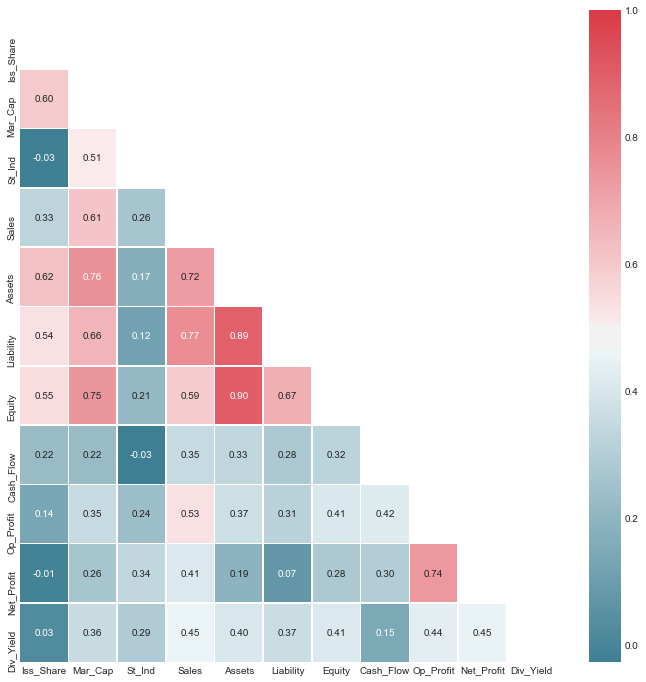

In [89]:
corr = trade_value_drop1.corr(method='spearman')
fig, ax = plt.subplots(figsize = (12,12))
colormap = sns.diverging_palette(220,10, as_cmap=True)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
colormap = sns.diverging_palette(220,10, as_cmap = True)
sns.heatmap(corr, cmap=colormap, linewidth=0.5, annot=True, fmt=".2f", mask=dropSelf)
plt.show()

In [90]:
trade_try_2 = trade.copy()
trade_value_drop2 = trade_try_2.drop(['Iss_Share', 'Mar_Cap', 'St_Ind', 'Sales', 'Equity', 'Assets', 'Liability', 'Cash_Flow', 'Op_Profit', 'Net_Profit'], axis=1)
trade_value_drop2.head().T

0                   1  \
Company_Name               Mahaka Media Tbk.  ABM Investama Tbk.   
Code_Name                               ABBA                ABMM   
Subsector     Advertising, Printing And Medi  Investment Company   
MR_Quarter                        31/03/2020          31/03/2020   
Fin_Yr_End                          December            December   
DPS                                        0               13.17   
EPS                                      -12                36.4   
RPS                                       60                3290   
BVPS                                      25              1318.8   
CFPS                                     -14                 273   
CEPS                                       7                 553   
NAVS                                      19                1218   
Div_Yield                                  0                0.01   
PER                                    -4.17                30.9   
PSR                                     0.84                0.34   
PBVR                                       2                0.86   
PCFR                                   -3.63                4.14   
DPR                                        0              0.3063   
GPM                                   0.5351              0.1765   
OPM                                  -0.2311              0.0991   
NPM                                   -0.194              0.0111   
EBITM                                -0.2843             -0.0155   
ROE                                  -0.4575              0.0276   
ROA                                  -0.0791               0.008   
DER                                   5.0324              2.5074   
CR                                    0.1006              0.4383   
QR                                    0.7452              1.0022   
CRR                                   0.7827              1.1279   

                                        2                               3  \
Company_Name  Ace Hardware Indonesia Tbk.        Asia Sejahtera Mina Tbk.   
Code_Name                            ACES                            AGAR   
Subsector                    Retail Trade  Wholesale (Durable & Non-Durab   
MR_Quarter                     31/03/2020                      31/03/2020   
Fin_Yr_End                       December                        December   
DPS                                 28.25                               0   
EPS                                    57                               7   
RPS                                   459                             154   
BVPS                                  285                             111   
CFPS                                   94                              45   
CEPS                                   90                              13   
NAVS                                  285                             111   
Div_Yield                          0.0173                               0   
PER                                  28.6                           71.14   
PSR                                  3.55                            3.24   
PBVR                                 5.72                            4.49   
PCFR                                17.34                              11   
DPR                                0.4956                               0   
GPM                                0.4959                          0.0146   
OPM                                0.1359                         -0.0728   
NPM                                0.1249                          0.0478   
EBITM                              0.1426                         -0.0725   
ROE                                0.2012                          0.0665   
ROA                                0.1405                          0.0418   
DER                                0.4288                          0.5888   
CR                                 1.9646                          0

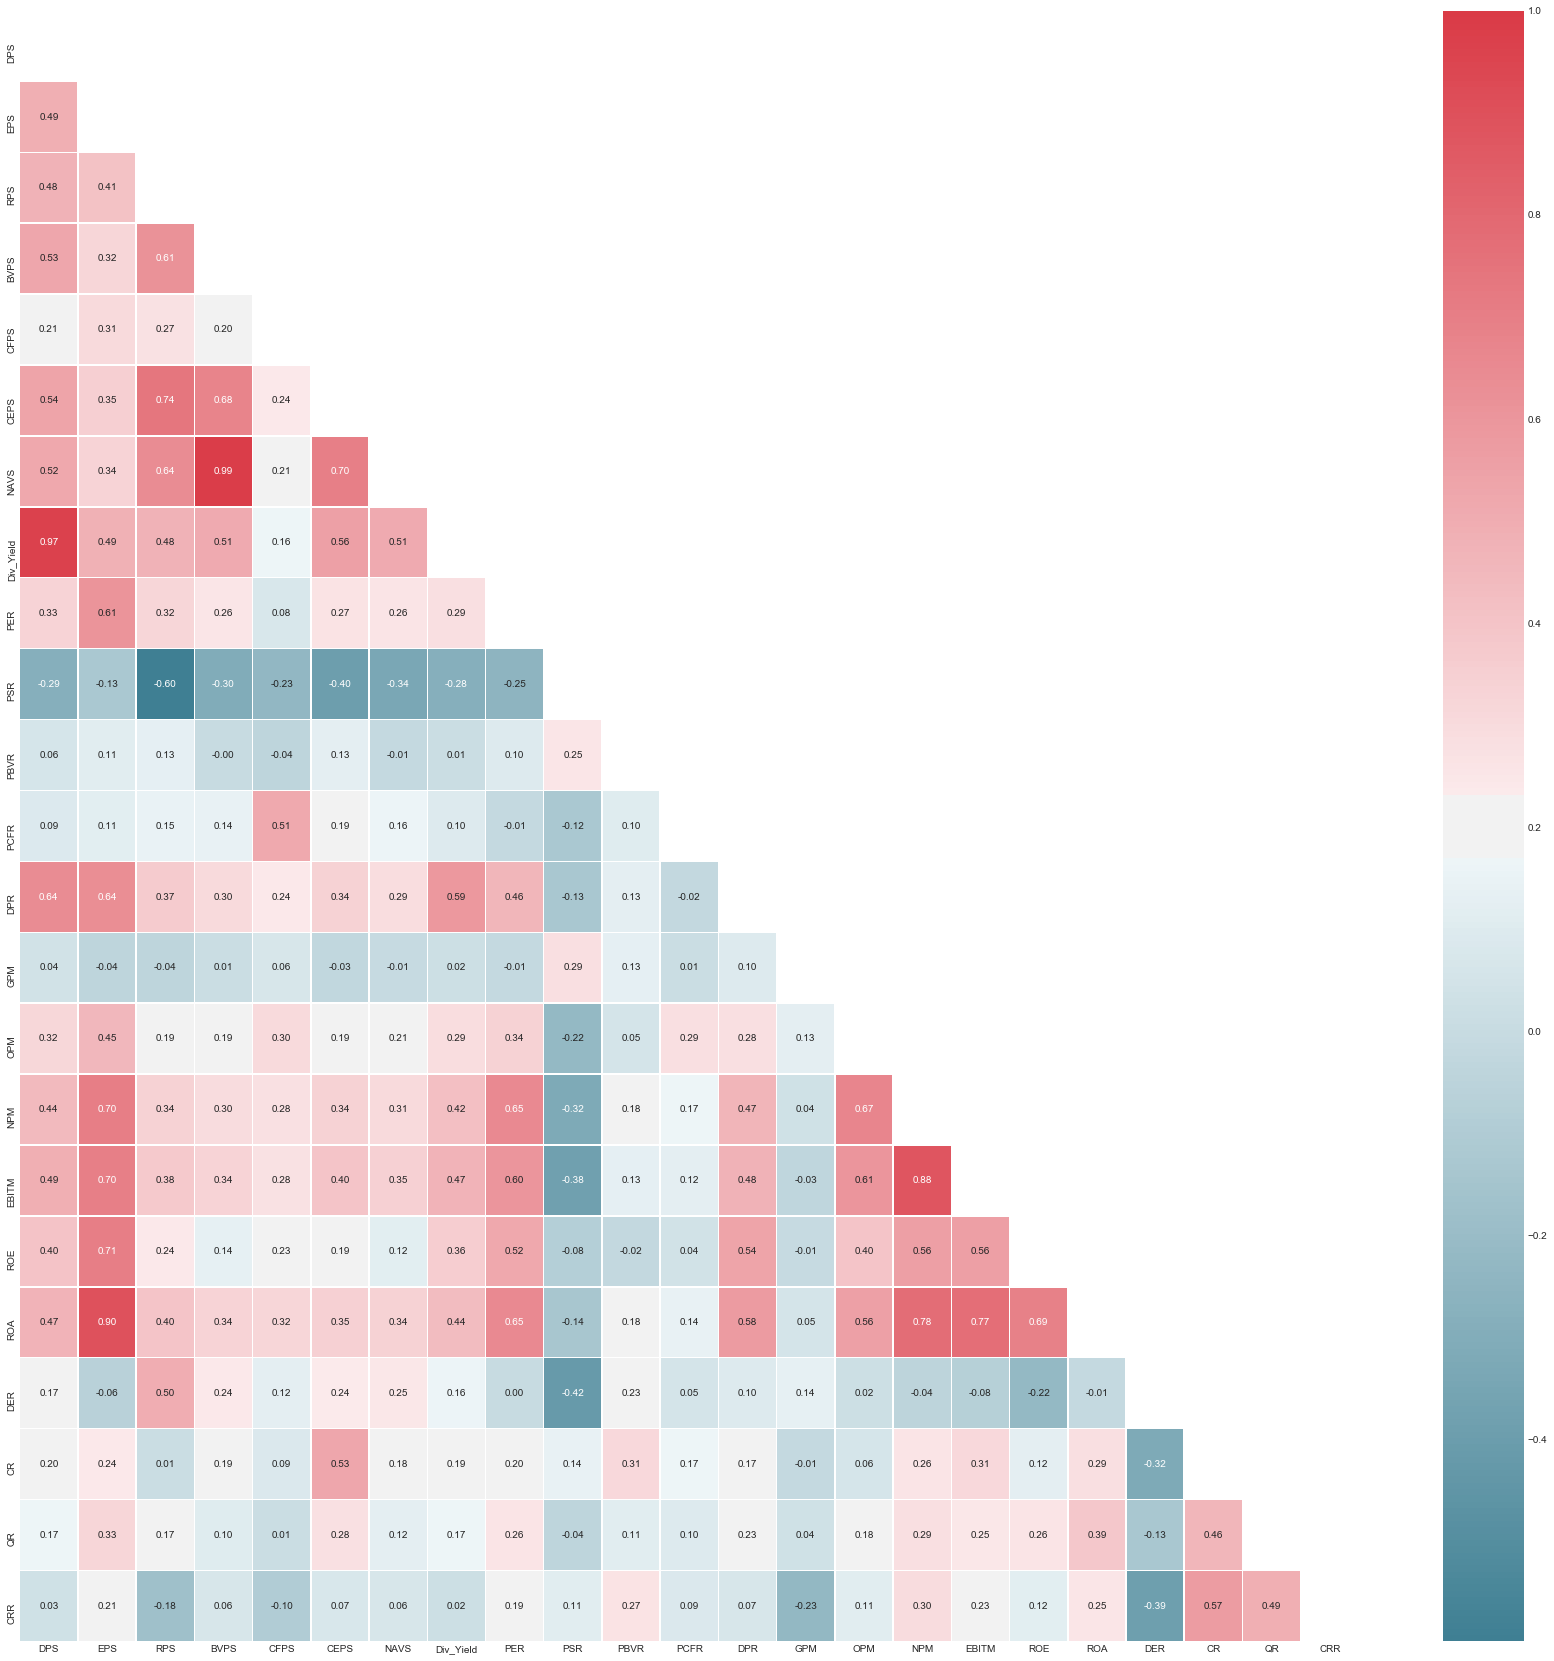

In [91]:
corr = trade_value_drop2.corr(method='spearman')
fig, ax = plt.subplots(figsize = (30,30))
colormap = sns.diverging_palette(220,10, as_cmap=True)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
colormap = sns.diverging_palette(220,10, as_cmap = True)
sns.heatmap(corr, cmap=colormap, linewidth=0.5, annot=True, fmt=".2f", mask=dropSelf)
plt.show()

## Visualisasi Target Feature Dividen Yield pada Perusahaan Sektor `Trade, Service, and Investment`

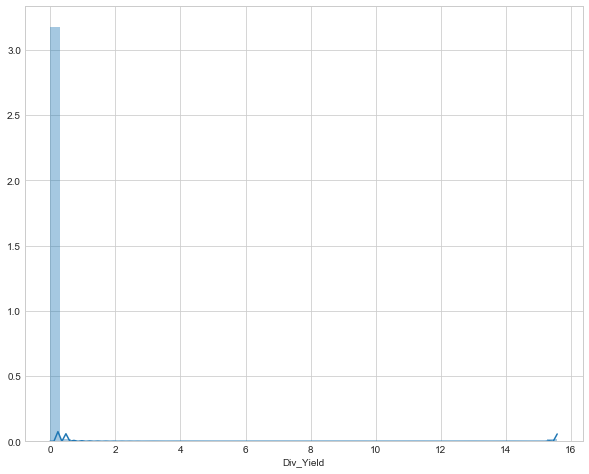

In [92]:
plt.figure(figsize=(10,8))
sns.distplot(trade['Div_Yield'])

## Visualisasi Tingkat Hutang terhadap Ekuitas Pada Perusahaan sektor `Trade, Service and Investment`

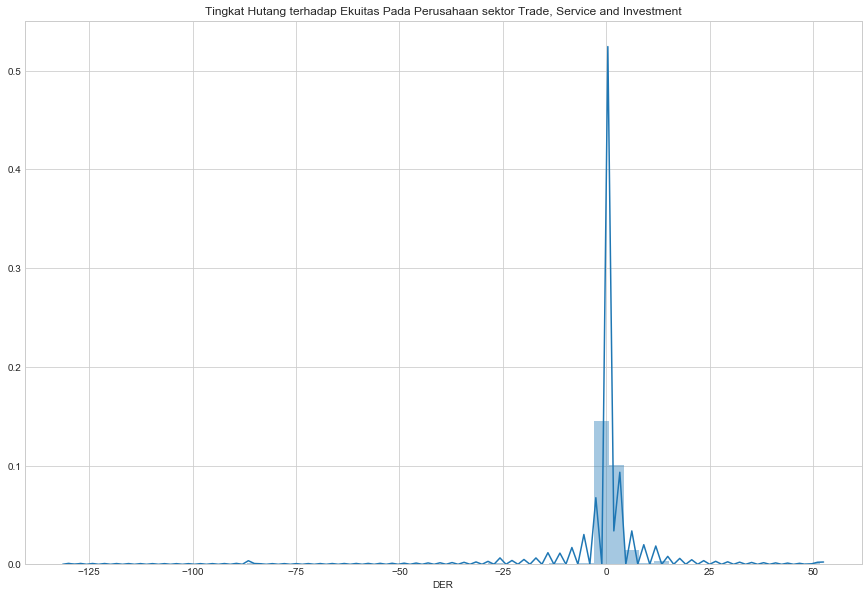

In [93]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(15,10))

sns.distplot(trade['DER'])
plt.title('Tingkat Hutang terhadap Ekuitas Pada Perusahaan sektor Trade, Service and Investment')
plt.show()

## Visualisasi Margin Keuntungan Bersih pada Perusahaan sektor `Trade, Service and Investment`

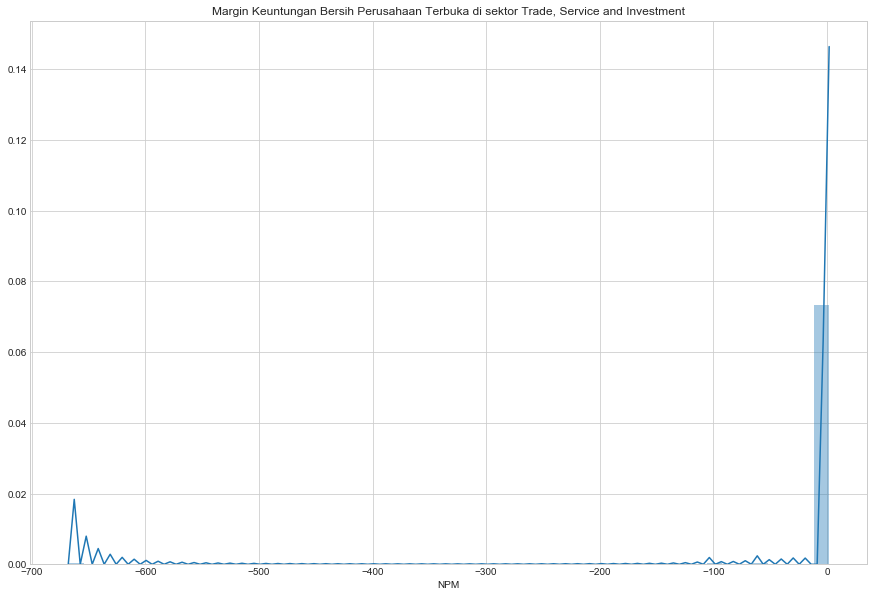

In [94]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(15,10))

sns.distplot(trade['NPM'])
plt.title('Margin Keuntungan Bersih Perusahaan Terbuka di sektor Trade, Service and Investment')
plt.show()

## Visualisasi Ekuitas Perusahaan Terbuka di Indonesia pada sektor `Trade, Service and Investment`

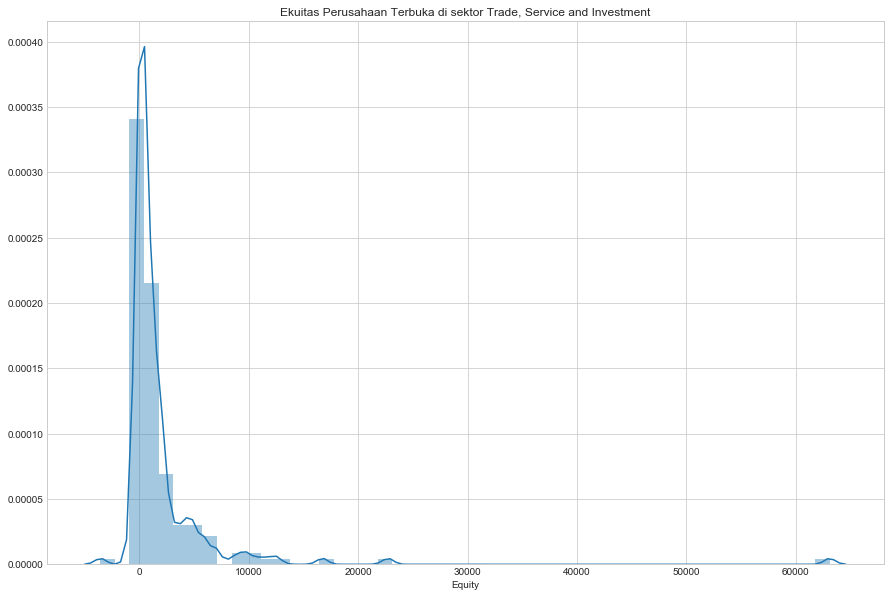

In [95]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(15,10))

sns.distplot(trade['Equity'])
plt.title('Ekuitas Perusahaan Terbuka di sektor Trade, Service and Investment')
plt.show()

## Visualisasi Rasio Likuiditas Perusahaan Terbuka di Indonesia pada sektor `Trade, Service and Investment`

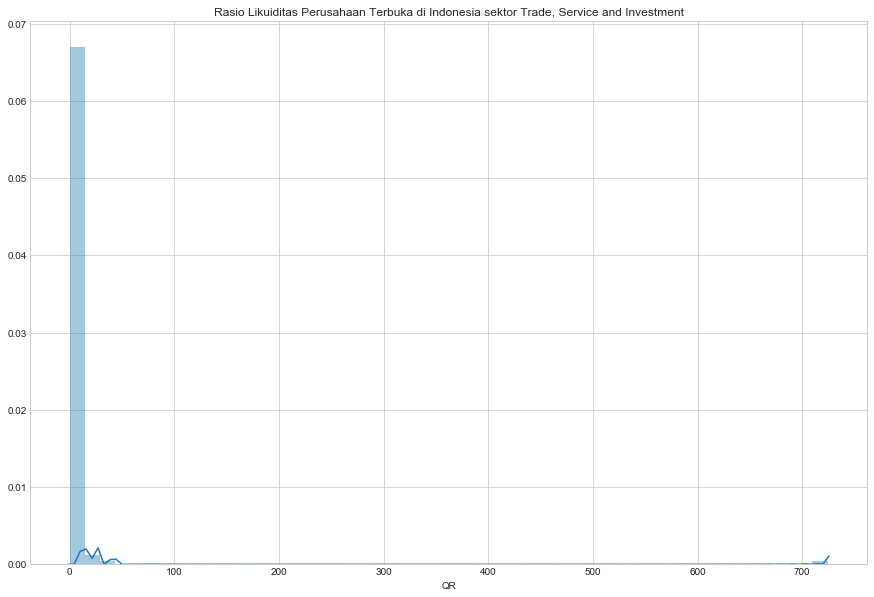

In [96]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(15,10))

sns.distplot(trade['QR'])
plt.title('Rasio Likuiditas Perusahaan Terbuka di Indonesia sektor Trade, Service and Investment')
plt.show()

<hr>

# __E. Exploratory Data Analysis pada sektor `Infrastructure, Utilities, and Transportation`__

In [97]:
infra = sql_df('''select * from infrastructure_utilities_and_transportation''')
infra.head().T

0                       1  \
Company_Name  Maming Enam Sembilan Mineral T  Adi Sarana Armada Tbk.   
Code_Name                               AKSI                    ASSA   
Subsector                     Transportation          Transportation   
MR_Quarter                        31/03/2020              31/03/2020   
Fin_Yr_End                          December                December   
Iss_Share                               0.72                     3.4   
Mar_Cap                               226.08                    1490   
St_Ind                                   157                   112.8   
Sales                                  89.91                  701.62   
Assets                                 245.5                    5110   
Liability                             146.75                    3700   
Equity                                 98.47                    1230   
Cash_Flow                            0.09847                    1.23   
Op_Profit                             -13.03                   77.37   
Net_Profit                            -15.26                    34.8   
DPS                                        0                       0   
EPS                                      -85                      41   
RPS                                      500                     826   
BVPS                                     137                     361   
CFPS                                      21                      52   
CEPS                                      62                      90   
NAVS                                     137                     415   
Div_Yield                                  0                       0   
PER                                    -3.69                   10.73   
PSR                                     0.63                    0.53   
PBVR                                    2.29                    1.22   
PCFR                                   14.69                    8.54   
DPR                                        0                       0   
GPM                                   0.0118                  0.2887   
OPM                                  -0.1448                  0.1102   
NPM                                  -0.1697                  0.0495   
EBITM                                -0.2001                 -0.0449   
ROE                                  -0.6198                  0.1136   
ROA                                  -0.2486                  0.0272   
DER                                   1.4902                   3.022   
CR                                    0.5663                  0.2309   
QR                                         0                  0.6168   
CRR                                   1.4311                  0.6342   

                                       2                              3  \
Company_Name  Bali Towerindo Sentra Tbk.  Pelayaran Nasional Bina Buana   
Code_Name                           BALI                           BBRM   
Subsector      Non Building Construction                 Transportation   
MR_Quarter                    31/03/2020                     31/03/2020   
Fin_Yr_End                      December                       December   
Iss_Share                           3.93                           5.37   
Mar_Cap                             3500                         268.35   
St_Ind                            1112.5                           21.7   
Sales                             180.15                           48.3   
Assets                              4240                         1044.4   
Liability                           2270                         808.64   
Equity                              1980                          236.6   
Cash_Flow                           1.98                         0.2366   
Op_Profit                          87.07                         -10.99   
Net_Profit                          8.93                         -186.2   
DPS                               

In [98]:
infra.columns

Index(['Company_Name', 'Code_Name', 'Subsector', 'MR_Quarter', 'Fin_Yr_End',
       'Iss_Share', 'Mar_Cap', 'St_Ind', 'Sales', 'Assets', 'Liability',
       'Equity', 'Cash_Flow', 'Op_Profit', 'Net_Profit', 'DPS', 'EPS', 'RPS',
       'BVPS', 'CFPS', 'CEPS', 'NAVS', 'Div_Yield', 'PER', 'PSR', 'PBVR',
       'PCFR', 'DPR', 'GPM', 'OPM', 'NPM', 'EBITM', 'ROE', 'ROA', 'DER', 'CR',
       'QR', 'CRR'],
      dtype='object')

<hr>

### __1e. Apa saja subsektor yang ada pada sektor `Infrastructure, Utilities, and Transportation`?__

In [99]:
infra['Subsector'].value_counts()

Transportation                    43
Non Building Construction         13
Energy                             7
Telecommunication                  5
Toll Road, Airport, Harbor And     5
Wholesale (Durable & Non-Durab     2
Retail Trade                       1
 Telecommunication                 1
Toll Road, Airport, Harbor         1
Name: Subsector, dtype: int64

In [100]:
infra[infra['Subsector'] == 'Wholesale (Durable & Non-Durab']['Company_Name']

15           AirAsia Indonesia Tbk.
41    Nusantara Infrastructure Tbk.
Name: Company_Name, dtype: object

In [101]:
infra[infra['Subsector'] == 'Retail Trade']['Company_Name']

13    Centratama Telekomunikasi Indo
Name: Company_Name, dtype: object

### __2e. Kita sekarang mengetahui jika subsektor terbanyak yang ada pada sektor `Infrastructure, Utilities and Transportation` adalah subsektor `Transportation`. Apa saja perusahaan yang memiliki penjualan terbesar di sektor `Infrastructure, Utilities, and Transportation` pada Q1 2020 ini?__

In [102]:
sql_df('''select Company_Name as NamaPerusahaan,
Code_Name as KodeSaham,
Sales as Penjualan_dalam_Milliar
from infrastructure_utilities_and_transportation
Order by Sales DESC
limit 5''')

NamaPerusahaan KodeSaham  Penjualan_dalam_Milliar
0  Telekomunikasi Indonesia (Pers      TLKM                  34190.0
1      Perusahaan Gas Negara Tbk.      PGAS                  12233.0
2  Garuda Indonesia (Persero) Tbk      GIAA                  10753.0
3                    Indosat Tbk.      ISAT                   6520.0
4                   XL Axiata Tbk      EXCL                   6500.0

### __3e. Apa saja perusahaan yang memiliki penjualan terbesar pada subsektor `Transportation`?__

In [103]:
sql_df('''select Company_Name as NamaPerusahaan,
Code_Name as KodeSaham,
Sales as Penjualan_dalam_Milliar
from infrastructure_utilities_and_transportation
where Subsector = 'Transportation'
order by Sales DESC
limit 5
''')

NamaPerusahaan KodeSaham  Penjualan_dalam_Milliar
0  Garuda Indonesia (Persero) Tbk      GIAA                 10753.00
1         Samudera Indonesia Tbk.      SMDR                  1875.86
2                  Blue Bird Tbk.      BIRD                   885.18
3                      Temas Tbk.      TMAS                   706.85
4          Adi Sarana Armada Tbk.      ASSA                   701.62

### __4e. Perusahaan apa saja yang memiliki keuntungan bersih paling tinggi di sektor ini pada Q1 2020?__

In [104]:
sql_df('''Select Company_Name as NamaPerusahaan, 
Code_Name as KodeSaham,
Subsector as Subsektor,
Sales as Penjualan_dalam_Milliar,
Net_Profit as Keuntungan_bersih_dalam_Milliar
from infrastructure_utilities_and_transportation
order by Net_Profit DESC
LIMIT 5''')

NamaPerusahaan KodeSaham                       Subsektor  \
0  Telekomunikasi Indonesia (Pers      TLKM               Telecommunication   
1                   XL Axiata Tbk      EXCL               Telecommunication   
2      Perusahaan Gas Negara Tbk.      PGAS                          Energy   
3       Jasa Marga (Persero) Tbk.      JSMR  Toll Road, Airport, Harbor And   
4    Sarana Menara Nusantara Tbk.      TOWR       Non Building Construction   

   Penjualan_dalam_Milliar  Keuntungan_bersih_dalam_Milliar  
0                  34190.0                          5860.00  
1                   6500.0                          1520.00  
2                  12233.0                           668.78  
3                   4180.0                           587.93  
4                   1820.0                           518.96

### __5e. Perusahaan apa saja yang memiliki margin keuntungan bersih paling tinggi pada Q1 2020 ini?__

In [105]:
sql_df('''select Company_Name as NamaPerusahaan, Code_Name as KodeSaham,
Sales as Penjualan_dalam_Milliar,
Net_Profit as Keuntungan_bersih_dalam_Milliar,
NPM as Margin_Keuntungan_Bersih
from infrastructure_utilities_and_transportation
order by NPM DESC
LIMIT 5''')

NamaPerusahaan KodeSaham  Penjualan_dalam_Milliar  \
0      Protech Mitra Perkasa Tbk.      OASA                  0.80243   
1     Kencana Energi Lestari Tbk.      KEEN                 56.42000   
2       Terregra Asia Energy Tbk.      TGRA                  2.85000   
3  Gihon Telekomunikasi Indonesia      GHON                 31.72000   
4        Buana Lintas Lautan Tbk.      BULL                602.98000   

   Keuntungan_bersih_dalam_Milliar  Margin_Keuntungan_Bersih  
0                             2.39                    2.9837  
1                            97.86                    1.7335  
2                             2.84                    0.9975  
3                            16.60                    0.5231  
4                           271.88                    0.4509

### __6e. Perusahaan apa saja yang memiliki tingkat hutang terhadap ekuitas paling rendah pada sektor `Infrastructure, Utilities, and Transportation` pada Q1 2020?__

In [106]:
sql_df('''select Company_Name as NamaPerusahaan, Code_Name as KodeSaham, 
Subsector as Subsektor,
DER as Tingkat_Hutang_thdp_Ekuitas
from infrastructure_utilities_and_transportation
Where DER > 0
order by DER
Limit 5''')

NamaPerusahaan KodeSaham                  Subsektor  \
0      Protech Mitra Perkasa Tbk.      OASA  Non Building Construction   
1   Krida Jaringan Nusantara Tbk.      KJEN             Transportation   
2  Visi Telekomunikasi Infrastruk      GOLD  Non Building Construction   
3         LCK Global Kedaton Tbk.      LCKM  Non Building Construction   
4  Pelayaran Nelly Dwi Putri Tbk.      NELY             Transportation   

   Tingkat_Hutang_thdp_Ekuitas  
0                       0.0160  
1                       0.0673  
2                       0.0987  
3                       0.1135  
4                       0.1651

### __7e. Perusahaan apa saja yang memiliki Ekuitas tertinggi pada sektor `Infrastructure, Utilities and Transportation pada Q1 2020?__

In [107]:
sql_df('''select Company_Name as NamaPerusahaan,
Code_Name as KodeSaham,
Equity as Ekuitas
from infrastructure_utilities_and_transportation
order by Equity DESC
Limit 5''')

NamaPerusahaan KodeSaham   Ekuitas
0  Telekomunikasi Indonesia (Pers      TLKM  106450.0
1      Perusahaan Gas Negara Tbk.      PGAS   36400.0
2                   XL Axiata Tbk      EXCL   20650.0
3       Jasa Marga (Persero) Tbk.      JSMR   19420.0
4                    Indosat Tbk.      ISAT   12150.0

### __8e. Perusahaan apa pada sektor `Infrastructure, Utilities, and Transportation` pada Q1 2020 ini yang;__
  #### a.memiliki *__dividen yield__* diatas 3% 
  #### b.memiliki *__tingkat harga saham terhadap nilai bukunya__* tidak melebihi 2x
  #### c.*__rasio hutang terhadap ekuitas__* tidak melebihi 200% dari ekuitasnya
  #### d.*__rasio pembagian dividen yang tinggi terhadap laba bersihnya__* (diatas 20%)
  #### e.*__pengembalian laba bersih terhadap ekuitas lebih dari 1%__*?
  #### f. diurutkan dari yang memiliki *__rasio likuiditas__* tertinggi. Tampilkan 10 perusahaan.

In [108]:
recom_infra = sql_df('''select Company_Name,
Code_Name,
Subsector,
Equity,
PBVR,
DER,
Div_Yield,
ROE,
DPR
from infrastructure_utilities_and_transportation
where DER < 2 and Div_Yield > 0.03 and ROE > 0.01 and DPR > 0.2 and PBVR < 2 and PBVR > 0
ORDER BY CRR DESC
Limit 10''')
recom_infra

Company_Name Code_Name                       Subsector  \
0         Cikarang Listrindo Tbk.      POWR                          Energy   
1  Indonesia Kendaraan Terminal T      IPCC      Toll Road, Airport, Harbor   
2      Perusahaan Gas Negara Tbk.      PGAS                          Energy   
3                 PP Presisi Tbk.      PPRE       Non Building Construction   
4         Samudera Indonesia Tbk.      SMDR                  Transportation   
5   Nusantara Infrastructure Tbk.      META  Wholesale (Durable & Non-Durab   
6                  Blue Bird Tbk.      BIRD                  Transportation   
7         Trans Power Marine Tbk.      TPMA                  Transportation   
8                      Temas Tbk.      TMAS                  Transportation   

     Equity  PBVR     DER  Div_Yield     ROE     DPR  
0   9250.92  0.88  0.9630     0.0418  0.0196  1.9143  
1   1090.00  0.72  0.7903     0.0811  0.0746  0.7749  
2  36400.00  0.65  1.7905     0.0366  0.0735  0.3222  
3   2240.00  0.89  1.9676     0.0332  0.0250  1.3000  
4   2218.86  0.29  1.6935     0.0348  0.0470  0.2162  
5   2620.00  0.73  0.8753     0.0880  0.0619  1.0556  
6   5320.00  0.48  0.4284     0.0716  0.0103  3.3182  
7  11236.40  0.65  0.3829     0.0821  0.0596  0.8867  
8   1190.00  0.50  1.9298     0.0343  0.0130  1.2000

In [109]:
# recom_infra.to_csv('Infrastructure.csv')

<hr>

## __Descriptive Analysis__

In [110]:
infra.describe().T

count          mean           std         min         25%  \
Iss_Share    78.0     10.457822     27.766656      0.3500    0.914807   
Mar_Cap      78.0   8020.287692  35607.673919     29.3600  199.360000   
St_Ind       78.0    325.005769    770.947307      5.4000   34.725000   
Sales        78.0   1293.689904   4342.232736      0.0000   27.792500   
Assets       78.0  12742.478462  35747.354231     49.6000  338.892500   
Liability    78.0   8444.250381  22727.854094      0.7797  146.375000   
Equity       78.0   3878.882512  13189.112319 -15580.0000  133.447500   
Cash_Flow    78.0      3.648826     13.226180    -15.5800    0.126653   
Op_Profit    78.0    262.394296   1587.228776  -2486.1200   -0.596150   
Net_Profit   78.0     75.683891    755.716712  -1780.0000   -3.895000   
DPS          78.0      6.876649     20.568706      0.0000    0.000000   
EPS          78.0     18.784615    116.074583   -446.0000   -4.800000   
RPS          78.0    470.905128    767.409011    -11.2000   42.750000   
BVPS         78.0    482.215128    792.670577   -834.4000  108.750000   
CFPS         78.0    146.038462    457.544611   -163.0000    0.250000   
CEPS         78.0    100.048718    189.382390      0.0000    5.700000   
NAVS         78.0    519.205128    846.032046   -834.4000  115.000000   
Div_Yield    78.0      0.010150      0.020857      0.0000    0.000000   
PER          78.0     27.407051     78.582096   -284.1100   -0.487500   
PSR          78.0      6.716538     27.030537      0.0000    0.590000   
PBVR         78.0      2.334487      6.116323     -2.3600    0.512500   
PCFR         78.0      5.861282    238.011166  -1043.6700    0.552500   
DPR          78.0      0.192055      0.510857     -0.4023    0.000000   
GPM          78.0      0.135503      0.626105     -3.7901    0.054850   
OPM          78.0     -0.057050      0.857403     -5.8651   -0.013425   
NPM          78.0     -0.768976      5.878323    -51.1372   -0.022000   
EBITM        78.0     -1.745122     13.524381   -119.3050   -0.201600   
ROE          78.0     -2.879509     25.714314   -227.0590    0.002325   
ROA          78.0     -0.029314      0.199514     -1.0530   -0.024150   
DER          78.0      4.026351     25.372716     -8.1002    0.334100   
CR           78.0      4.828897     37.617996      0.0001    0.061225   
QR           78.0      5.411460     38.343287      0.0000    0.001225   
CRR          78.0      6.144429     38.574450      0.0004    0.465075   

                   50%          75%          max  
Iss_Share      3.04500     6.832500     217.9600  
Mar_Cap      792.15500  2187.500000  308080.0000  
St_Ind        93.60000   213.350000    5089.6000  
Sales        105.89500   539.207500   34190.0000  
Assets      1299.03000  5492.500000  241910.0000  
Liability    734.80000  2907.500000  120960.0000  
Equity       623.56000  2480.000000  106450.0000  
Cash_Flow      0.62328     2.300000     106.4500  
Op_Profit     13.81500    86.197500   13480.0000  
Net_Profit     4.39000    25.760000    5860.0000  
DPS            0.00000     3.375000     154.0680  
EPS            7.50000    39.100000     568.0000  
RPS          189.00000   494.000000    4802.0000  
BVPS         199.00000   504.250000    4434.0000  
CFPS          22.40000    87.500000    3151.0000  
CEPS          23.90000    93.000000     950.0000  
NAVS         205.50000   560.000000    4434.0000  
Div_Yield      0.00000     0.006450       0.0880  
PER           10.80500    32.315000     366.6700  
PSR            1.31000     4.432500     233.4000  
PBVR           0.87000     1.917500      50.0000  
PCFR           3.19000     9.087500    1587.3000  
DPR            0.00000     0.101550       3.3182  
GPM            0.21360     0.387825       0.8318  
OPM            0.10685     0.256450       0.7475  
NPM            0.04950     0.139200       2.9837  
EBITM         -0.01190     0.072550       2.5884  
ROE            0.03780     0.114275       1.2492  
ROA            0.01610     0.041100       0.2555  

## __Correlation Analysis__

In [111]:
infra_try_1 = infra.copy()
infra_value_drop1 = infra_try_1.drop(['DPR', 'DPS', 'EPS', 'RPS', 'BVPS', 'CFPS', 'CEPS', 'NAVS', 'PER', 'PSR', 'PBVR', 'PCFR', 'GPM', 'OPM', 'NPM', 'EBITM', 'ROE', 'ROA', 'CR', 'QR', 'CRR', 'DER'], axis=1)
infra_value_drop1.head().T

0                       1  \
Company_Name  Maming Enam Sembilan Mineral T  Adi Sarana Armada Tbk.   
Code_Name                               AKSI                    ASSA   
Subsector                     Transportation          Transportation   
MR_Quarter                        31/03/2020              31/03/2020   
Fin_Yr_End                          December                December   
Iss_Share                               0.72                     3.4   
Mar_Cap                               226.08                    1490   
St_Ind                                   157                   112.8   
Sales                                  89.91                  701.62   
Assets                                 245.5                    5110   
Liability                             146.75                    3700   
Equity                                 98.47                    1230   
Cash_Flow                            0.09847                    1.23   
Op_Profit                             -13.03                   77.37   
Net_Profit                            -15.26                    34.8   
Div_Yield                                  0                       0   

                                       2                              3  \
Company_Name  Bali Towerindo Sentra Tbk.  Pelayaran Nasional Bina Buana   
Code_Name                           BALI                           BBRM   
Subsector      Non Building Construction                 Transportation   
MR_Quarter                    31/03/2020                     31/03/2020   
Fin_Yr_End                      December                       December   
Iss_Share                           3.93                           5.37   
Mar_Cap                             3500                         268.35   
St_Ind                            1112.5                           21.7   
Sales                             180.15                           48.3   
Assets                              4240                         1044.4   
Liability                           2270                         808.64   
Equity                              1980                          236.6   
Cash_Flow                           1.98                         0.2366   
Op_Profit                          87.07                         -10.99   
Net_Profit                          8.93                         -186.2   
Div_Yield                              0                              0   

                                           4  
Company_Name  Batulicin Nusantara Maritim Tb  
Code_Name                               BESS  
Subsector                     Transportation  
MR_Quarter                        31/03/2020  
Fin_Yr_End                          December  
Iss_Share                                3.4  
Mar_Cap                                802.4  
St_Ind                                 224.8  
Sales                                  58.68  
Assets                                603.83  
Liability                              327.9  
Equity                                275.93  
Cash_Flow                            0.27593  
Op_Profit                              12.97  
Net_Profit                               5.6  
Div_Yield                                  0

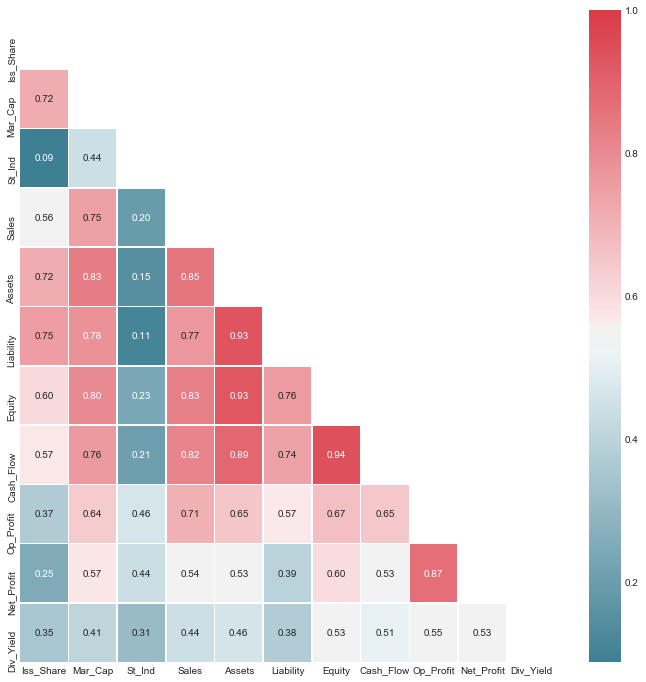

In [112]:
corr = infra_value_drop1.corr(method='spearman')
fig, ax = plt.subplots(figsize = (12,12))
colormap = sns.diverging_palette(220,10, as_cmap=True)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
colormap = sns.diverging_palette(220,10, as_cmap = True)
sns.heatmap(corr, cmap=colormap, linewidth=0.5, annot=True, fmt=".2f", mask=dropSelf)
plt.show()

In [113]:
infra_try_2 = infra.copy()
infra_value_drop2 = infra_try_2.drop(['Iss_Share', 'Mar_Cap', 'St_Ind', 'Sales', 'Equity', 'Assets', 'Liability', 'Cash_Flow', 'Op_Profit', 'Net_Profit'], axis=1)
infra_value_drop2.head().T

0                       1  \
Company_Name  Maming Enam Sembilan Mineral T  Adi Sarana Armada Tbk.   
Code_Name                               AKSI                    ASSA   
Subsector                     Transportation          Transportation   
MR_Quarter                        31/03/2020              31/03/2020   
Fin_Yr_End                          December                December   
DPS                                        0                       0   
EPS                                      -85                      41   
RPS                                      500                     826   
BVPS                                     137                     361   
CFPS                                      21                      52   
CEPS                                      62                      90   
NAVS                                     137                     415   
Div_Yield                                  0                       0   
PER                                    -3.69                   10.73   
PSR                                     0.63                    0.53   
PBVR                                    2.29                    1.22   
PCFR                                   14.69                    8.54   
DPR                                        0                       0   
GPM                                   0.0118                  0.2887   
OPM                                  -0.1448                  0.1102   
NPM                                  -0.1697                  0.0495   
EBITM                                -0.2001                 -0.0449   
ROE                                  -0.6198                  0.1136   
ROA                                  -0.2486                  0.0272   
DER                                   1.4902                   3.022   
CR                                    0.5663                  0.2309   
QR                                         0                  0.6168   
CRR                                   1.4311                  0.6342   

                                       2                              3  \
Company_Name  Bali Towerindo Sentra Tbk.  Pelayaran Nasional Bina Buana   
Code_Name                           BALI                           BBRM   
Subsector      Non Building Construction                 Transportation   
MR_Quarter                    31/03/2020                     31/03/2020   
Fin_Yr_End                      December                       December   
DPS                                    0                              0   
EPS                                    9                            -14   
RPS                                  183                           36.4   
BVPS                                 502                           44.8   
CFPS                                 147                           -1.4   
CEPS                                   3                            8.4   
NAVS                                 502                           44.8   
Div_Yield                              0                              0   
PER                                98.89                          -3.09   
PSR                                 4.86                           1.19   
PBVR                                1.77                           0.97   
PCFR                                6.07                         -33.94   
DPR                                    0                              0   
GPM                               0.5645                        -0.0968   
OPM                               0.4833                        -0.2274   
NPM                               0.0495                        -0.3853   
EBITM                            -0.2199                         -0.542   
ROE                                0.018                        -0.3147   
ROA                               0.0084                        -0.0712   
DER                               1.1469                         3.4169   
CR  

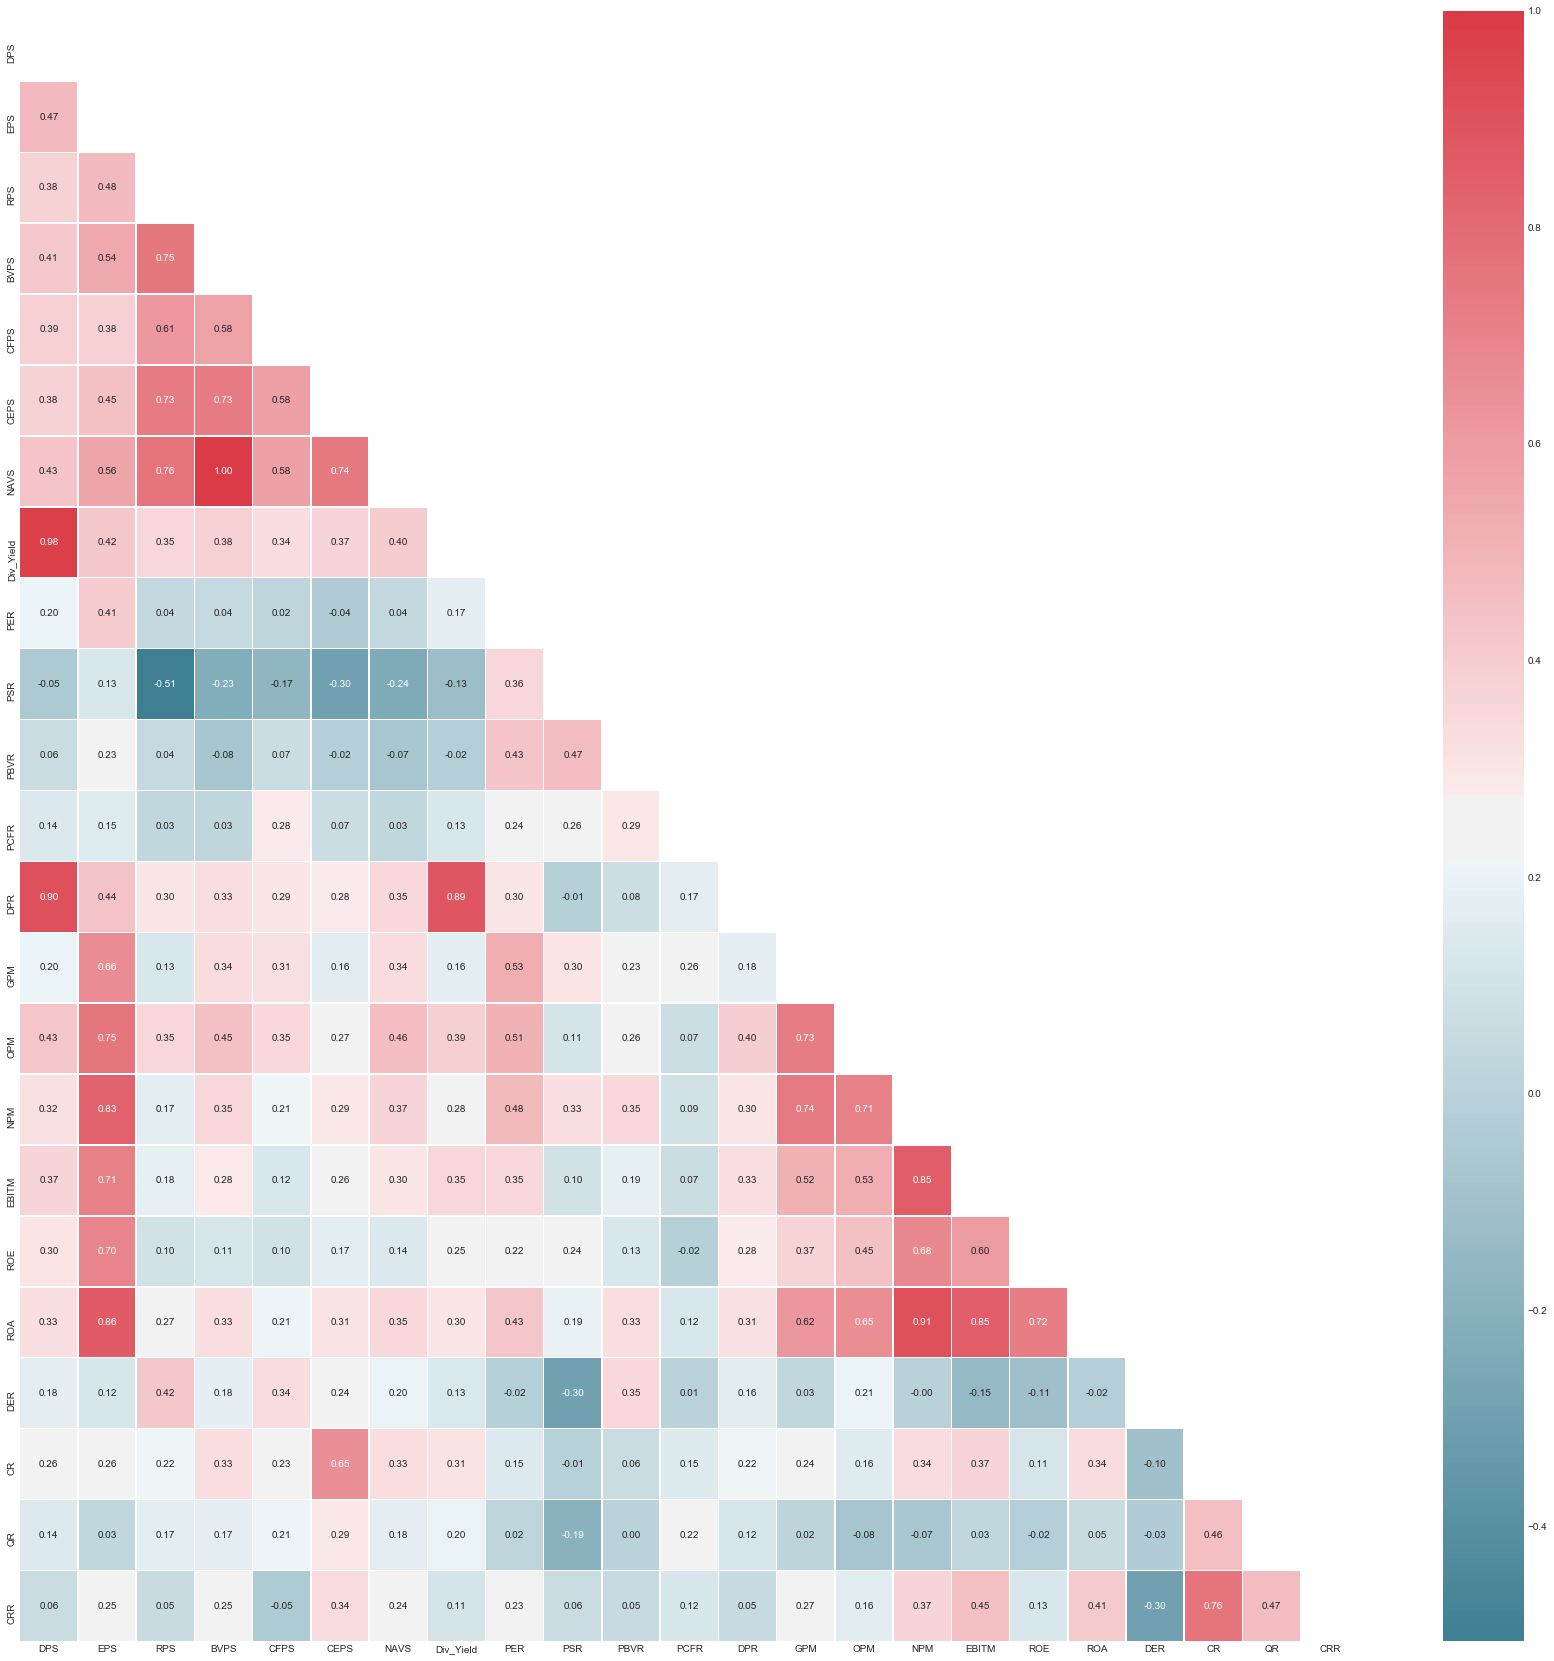

In [114]:
corr = infra_value_drop2.corr(method='spearman')
fig, ax = plt.subplots(figsize = (30,30))
colormap = sns.diverging_palette(220,10, as_cmap=True)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
colormap = sns.diverging_palette(220,10, as_cmap = True)
sns.heatmap(corr, cmap=colormap, linewidth=0.5, annot=True, fmt=".2f", mask=dropSelf)
plt.show()

## Visualisasi Target Feature Dividen Yield pada Perusahaan sektor `Infrastructure, Utilities, and Transportation`

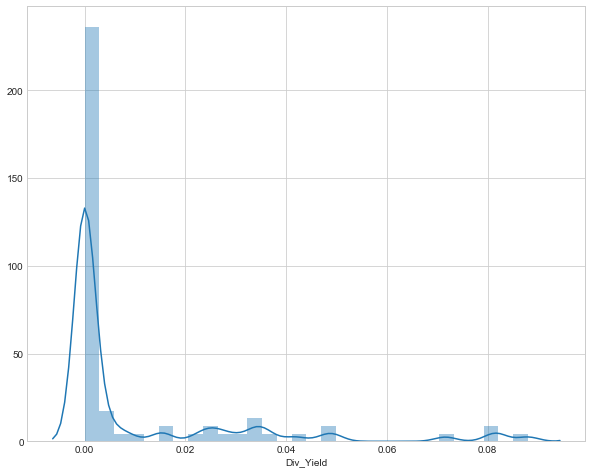

In [115]:
plt.figure(figsize=(10,8))
sns.distplot(infra['Div_Yield'])

## Visualisasi Tingkat Hutang terhadap Ekuitas pada Perusahaan sektor `Infrastructure, Utilities, and Transportation`

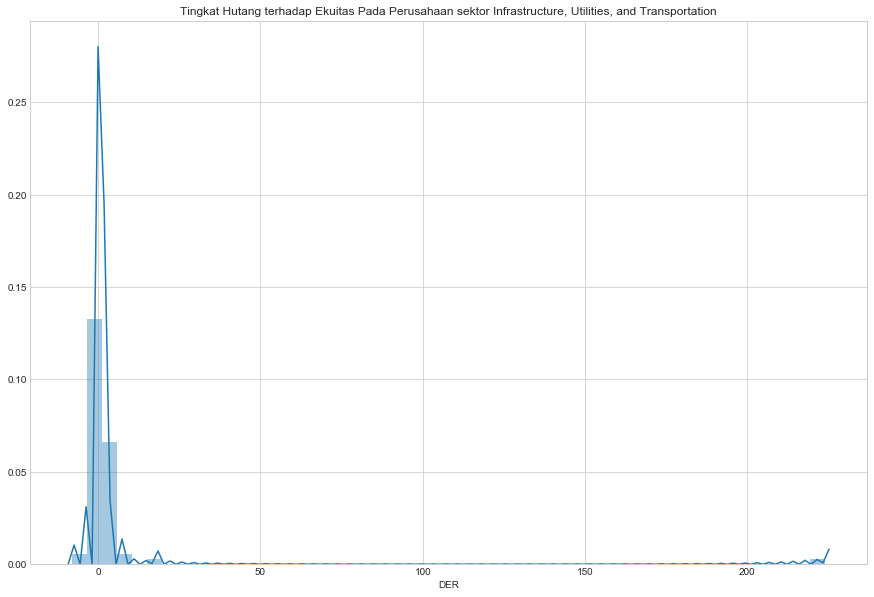

In [116]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(15,10))

sns.distplot(infra['DER'])
plt.title('Tingkat Hutang terhadap Ekuitas Pada Perusahaan sektor Infrastructure, Utilities, and Transportation')
plt.show()

## Visualisasi Margin Keuntungan Bersih pada Perusahaan sektor `Infrastructure, Utilities, and Transportation`

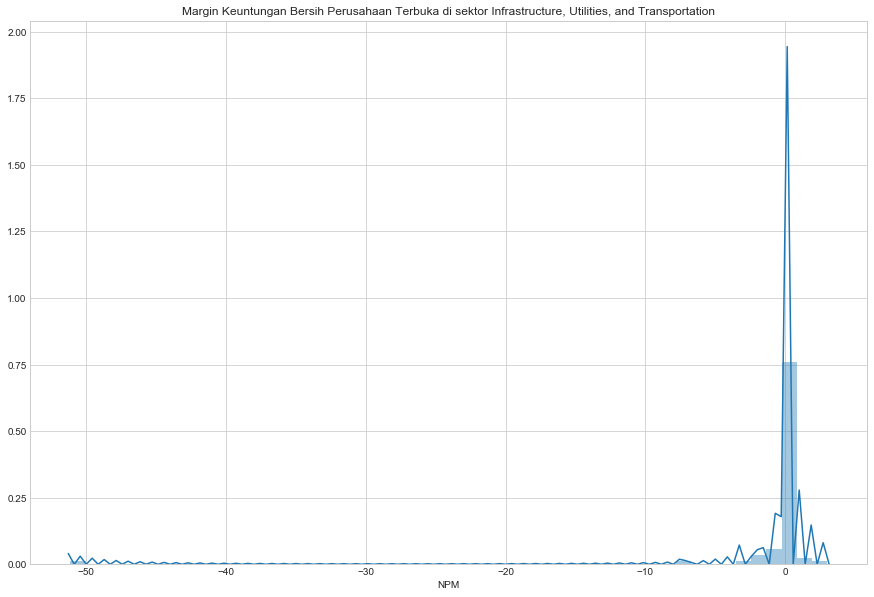

In [117]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(15,10))

sns.distplot(infra['NPM'])
plt.title('Margin Keuntungan Bersih Perusahaan Terbuka di sektor Infrastructure, Utilities, and Transportation')
plt.show()

## Visualisasi Ekuitas pada Perusahaan Terbuka di sektor `Infrastructure, Utilities, and Transportation`

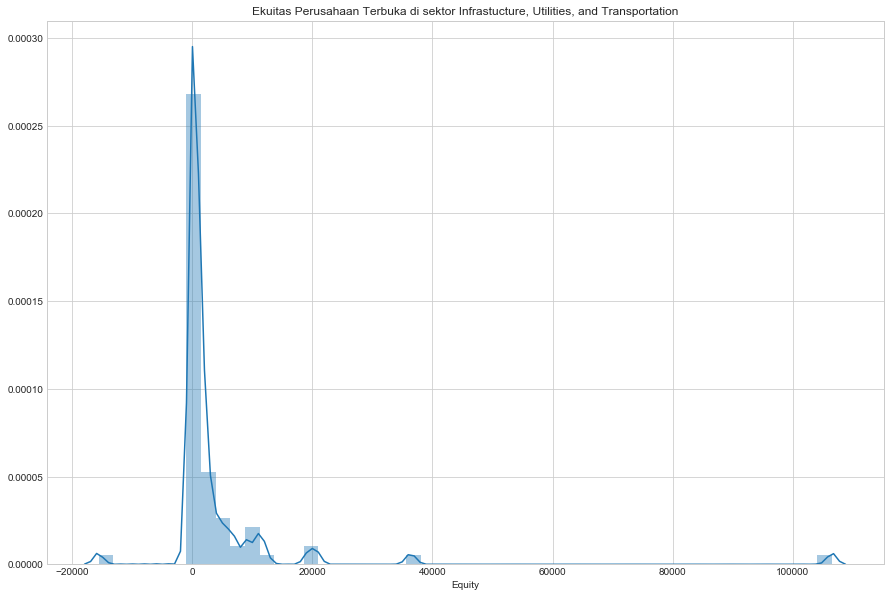

In [118]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(15,10))

sns.distplot(infra['Equity'])
plt.title('Ekuitas Perusahaan Terbuka di sektor Infrastucture, Utilities, and Transportation')
plt.show()

## Visualisasi Rasio Likuiditas Perusahaan Terbuka di sektor `Infrastructure, Utilities, and Transportation`

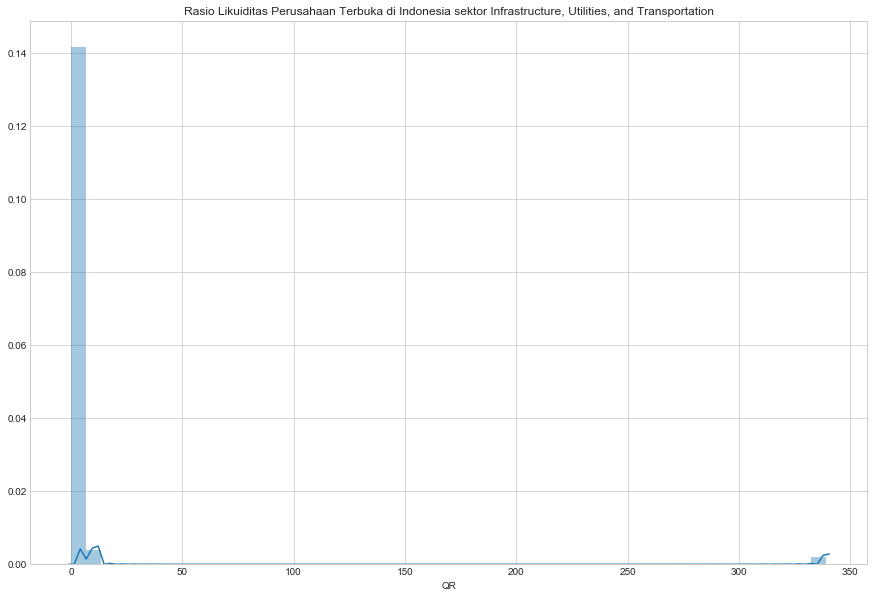

In [119]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(15,10))

sns.distplot(infra['QR'])
plt.title('Rasio Likuiditas Perusahaan Terbuka di Indonesia sektor Infrastructure, Utilities, and Transportation')
plt.show()

<hr>

# __F. Exploratory Data Analysis Perusahaan Terbuka sektor `Property, Real Estate, and Building Construction`__

In [120]:
prop = sql_df('''select * from property_real_estate_and_building_construction''')
prop.head().T

0                          1  \
Company_Name    Acset Indonusa Tbk.  Adhi Karya (Persero) Tbk.   
Code_Name                      ACST                       ADHI   
Subsector     Building Construction      Building Construction   
MR_Quarter               31/03/2020                 31/03/2020   
Fin_Yr_End                 December                   December   
Iss_Share                       0.7                       3.56   
Mar_Cap                       186.2                       2260   
St_Ind                         11.2                      423.3   
Sales                        477.61                       3070   
Assets                         4700                      36580   
Liability                      4530                      30940   
Equity                       104.49                       5620   
Cash_Flow                      2170                      -1150   
Op_Profit                    -12.83                     232.97   
Net_Profit                  -124.44                      14.56   
DPS                               5                    18.6418   
EPS                            -711                         16   
RPS                            2729                       3444   
BVPS                            149                       1577   
CFPS                          12378                      -1297   
CEPS                            678                        330   
NAVS                            238                       1584   
Div_Yield                    0.0188                     0.0294   
PER                           -0.37                      39.69   
PSR                             0.1                       0.18   
PBVR                           1.79                        0.4   
PCFR                           0.02                      -0.49   
DPR                          -0.007                     1.1651   
GPM                               0                     0.1349   
OPM                         -0.0268                     0.0759   
NPM                         -0.2605                     0.0047   
EBITM                       -0.5825                    -0.0614   
ROE                         -4.7638                     0.0103   
ROA                          -0.106                     0.0015   
DER                         43.3407                     5.5087   
CR                           0.2204                     0.0457   
QR                            1.518                     0.8949   
CRR                          1.6324                      1.184   

                                      2                         3  \
Company_Name  Makmur Berkah Amanda Tbk.  Agung Podomoro Land Tbk.   
Code_Name                          AMAN                      APLN   
Subsector      Property And Real Estate  Property And Real Estate   
MR_Quarter                   31/03/2020                31/03/2020   
Fin_Yr_End                     December                  December   
Iss_Share                          3.87                      22.7   
Mar_Cap                          759.21                      2570   
St_Ind                            178.2                      30.9   
Sales                             25.18                      1320   
Assets                           800.47                     31220   
Liability                        223.17                     20180   
Equity                           567.98                      8170   
Cash_Flow                        -91.22                    183.04   
Op_Profit                          5.69                    278.15   
Net_Profit                          3.3                   -448.57   
DPS                                   0                         0   
EPS                                   3                       -79   
RPS                                  26                       233   
BVPS                                147                       360   
CFPS                                -94                        32   
CEPS      

In [121]:
prop.columns

Index(['Company_Name', 'Code_Name', 'Subsector', 'MR_Quarter', 'Fin_Yr_End',
       'Iss_Share', 'Mar_Cap', 'St_Ind', 'Sales', 'Assets', 'Liability',
       'Equity', 'Cash_Flow', 'Op_Profit', 'Net_Profit', 'DPS', 'EPS', 'RPS',
       'BVPS', 'CFPS', 'CEPS', 'NAVS', 'Div_Yield', 'PER', 'PSR', 'PBVR',
       'PCFR', 'DPR', 'GPM', 'OPM', 'NPM', 'EBITM', 'ROE', 'ROA', 'DER', 'CR',
       'QR', 'CRR'],
      dtype='object')

<hr>

### __1f. Apa sajakah subsektor pada sektor ini?__

In [122]:
prop['Subsector'].value_counts()

Property And Real Estate         71
Building Construction            18
Tourism, Restaurant And Hotel     2
Name: Subsector, dtype: int64

### __2f. Sekarang kita mengetahui subsektor terbanyak pada sektor ini adalah subsektor `Property and Real Estate`. Perusahaan apa saja yang memiliki penjualan paling tinggi pada sektor ini dan subsektor `Property and Real Estate`?__

In [123]:
sql_df('''select Company_Name as NamaPerusahaan, 
Code_Name as KodeSaham,
Subsector as Subsektor,
Sales as Penjualan_dalam_Milliar
from property_real_estate_and_building_construction
order by Sales DESC
LIMIT 5''')

NamaPerusahaan KodeSaham                 Subsektor  \
0   Wijaya Karya (Persero) Tbk.      WIKA     Building Construction   
1  Waskita Karya (Persero) Tbk.      WSKT     Building Construction   
2       Alam Sutera Realty Tbk.      ASRI  Property And Real Estate   
3             PP (Persero) Tbk.      PTPP     Building Construction   
4     Adhi Karya (Persero) Tbk.      ADHI     Building Construction   

   Penjualan_dalam_Milliar  
0                   4200.0  
1                   4170.0  
2                   3480.0  
3                   3410.0  
4                   3070.0

In [124]:
sql_df('''select Company_Name as NamaPerusahaan,
Code_Name as KodeSaham,
Sales as Penjualan_dalam_Milliar
from property_real_estate_and_building_construction
where Subsector = 'Property and Real Estate'
order by Sales DESC
LIMIT 5
''')

NamaPerusahaan KodeSaham  Penjualan_dalam_Milliar
0   Alam Sutera Realty Tbk.      ASRI                   3480.0
1       Lippo Karawaci Tbk.      LPKR                   3070.0
2         Pakuwon Jati Tbk.      PWON                   1650.0
3  Ciputra Development Tbk.      CTRA                   1510.0
4   Bumi Serpong Damai Tbk.      BSDE                   1500.0

### __3f. Perusahaan apa saja yang memiliki keuntungan bersih paling tinggi di sektor ini?__

In [125]:
sql_df('''
select Company_Name as NamaPerusahaan,
Code_Name as KodeSaham,
Net_Profit as Keuntungan_bersih_dalam_milliar
from property_real_estate_and_building_construction
order by Net_Profit DESC
Limit 5
''')

NamaPerusahaan KodeSaham  Keuntungan_bersih_dalam_milliar
0     Alam Sutera Realty Tbk.      ASRI                          1010.00
1          Lippo Cikarang Tbk      LPCK                           793.58
2     Bumi Serpong Damai Tbk.      BSDE                           259.65
3  Metropolitan Kentjana Tbk.      MKPI                           207.45
4     Jaya Real Property Tbk.      JRPT                           207.18

### __4f. Perusahaaan apa saja yang memiliki margin keuntungan bersih paling tinggi di sektor ini?__

In [126]:
sql_df('''
select Company_Name as NamaPerusahaan,
Code_Name as KodeSaham,
Subsector as Subsektor,
Sales as Penjualan_dalam_Milliar,
Net_Profit as Keuntungan_bersih_dalam_milliar,
NPM as Margin_keuntungan_bersih
from property_real_estate_and_building_construction
order by NPM DESC
limit 5
''')

NamaPerusahaan KodeSaham                 Subsektor  \
0   Royalindo Investa Wijaya Tbk.      INDO  Property And Real Estate   
1        Greenwood Sejahtera Tbk.      GWSA  Property And Real Estate   
2              Lippo Cikarang Tbk      LPCK  Property And Real Estate   
3       Forza Land Indonesia Tbk.      FORZ  Property And Real Estate   
4  Ristia Bintang Mahkotasejati T      RBMS  Property And Real Estate   

   Penjualan_dalam_Milliar  Keuntungan_bersih_dalam_milliar  \
0                   0.7801                            44.66   
1                  14.0100                            41.68   
2                 574.3800                           793.58   
3                   4.4000                             5.11   
4                  99.7300                            61.43   

   Margin_keuntungan_bersih  
0                   57.2615  
1                    2.9745  
2                    1.3816  
3                    1.1622  
4                    0.6159

### __5f. Perusahaan apa saja yang memiliki tingkat hutang terhadap ekuitas paling rendah?__

In [127]:
sql_df('''select Company_Name as NamaPerusahaan,
Code_Name as KodeSaham, 
DER as Debt_Equity_Ratio
from property_real_estate_and_building_construction
where DER > 0
order by DER
Limit 5''')

NamaPerusahaan KodeSaham  Debt_Equity_Ratio
0      Repower Asia Indonesia Tbk.      REAL             0.0012
1        Eureka Prima Jakarta Tbk.      LCGP             0.0258
2  Bumi Benowo Sukses Sejahtera PT      BBSS             0.0563
3          Sitara Propertindo Tbk.      TARA             0.0671
4          Bekasi Asri Pemula Tbk.      BAPA             0.0762

### __6f. Perusahaan apa saja yang memiliki ekuitas paling tinggi pada sektor ini pada Q1 2020?__

In [128]:
sql_df('''select Company_Name as NamaPerusahaan,
Code_Name as KodeSaham,
Equity as Ekuitas
from property_real_estate_and_building_construction
order by Equity DESC
Limit 5''')

NamaPerusahaan KodeSaham  Ekuitas
0       Bumi Serpong Damai Tbk.      BSDE  27800.0
1           Lippo Karawaci Tbk.      LPKR  26370.0
2  Waskita Karya (Persero) Tbk.      WSKT  16070.0
3      Ciputra Development Tbk.      CTRA  14710.0
4   Wijaya Karya (Persero) Tbk.      WIKA  14300.0

### __7f. Perusahaan apa pada sektor `Property, Real Estate, and Building Construction` pada Q1 2020 ini yang;__
  #### a.memiliki *__dividen yield__* diatas 4% 
  #### b.memiliki *__tingkat harga saham terhadap nilai bukunya__* tidak melebihi 2x
  #### c.*__rasio hutang terhadap ekuitas__* tidak melebihi 200% dari ekuitasnya
  #### d.*__rasio pembagian dividen yang tinggi terhadap laba bersihnya__* (diatas 20%)
  #### e.*__pengembalian laba bersih terhadap ekuitas lebih dari 5%?__*
  #### f. diurutkan dari yang memiliki *__rasio likuiditas__* tertinggi, tampilkan 10 perusahaan.

In [129]:
recom_prop = sql_df('''select Company_Name,
Code_Name,
Subsector,
Equity,
PBVR,
DER,
Div_Yield,
ROE,
DPR
from property_real_estate_and_building_construction
where DER < 2 and Div_Yield > 0.04 and ROE > 0.02 and DPR > 0.2 and PBVR < 2 and PBVR > 0
ORDER BY CRR DESC
Limit 12''')
recom_prop

Company_Name Code_Name                 Subsector  \
0          Puradelta Lestari Tbk.      DMAS  Property And Real Estate   
1            Nusa Raya Cipta Tbk.      NRCA     Building Construction   
2     Plaza Indonesia Realty Tbk.      PLIN  Property And Real Estate   
3  Wijaya Karya Bangunan Gedung T      WEGE     Building Construction   
4       Total Bangun Persada Tbk.      TOTL     Building Construction   
5         Jaya Real Property Tbk.      JRPT  Property And Real Estate   

    Equity  PBVR     DER  Div_Yield     ROE      DPR  
0   6440.0  1.34  0.1894     0.2333  0.0331  10.5000  
1   1250.0  0.75  0.9575     0.0802  0.0898   0.6667  
2  11710.0  0.73  0.0824     0.0413  0.0473   0.6346  
3   2200.0  0.89  1.6900     0.0578  0.1481   0.3471  
4   1140.0  1.10  1.6937     0.1087  0.2139   0.5556  
5   7170.0  0.80  0.5641     0.0577  0.1155   0.4000

In [130]:
# recom_prop.to_csv('Property.csv')

<hr>

## Descriptive Analysis

In [131]:
prop.describe().T

count         mean           std         min         25%  \
Iss_Share    91.0    11.425000     16.600076     0.10154    2.465000   
Mar_Cap      91.0  3284.406154   5732.061371    33.09000  356.100000   
St_Ind       91.0   285.794505    671.533321     3.40000   33.300000   
Sales        91.0   496.911320    911.219640     0.14400   18.045000   
Assets       91.0  9568.491319  17698.467457    74.74000  879.465000   
Liability    91.0  5204.559928  12359.958396     0.43344  237.290000   
Equity       91.0  3738.454066   5249.015122    53.86000  522.675000   
Cash_Flow    91.0    -5.647859    660.702856 -4130.00000  -25.245000   
Op_Profit    91.0    93.636483    225.568572   -52.42000   -0.442455   
Net_Profit   91.0    -9.298845    290.122546 -2120.00000   -7.410000   
DPS          91.0    10.738511     41.811886     0.00000    0.000000   
EPS          91.0    25.087912    202.273173  -711.00000   -8.000000   
RPS          91.0   311.340659    616.395494     0.00000   14.500000   
BVPS         91.0   720.131868   1499.182660    14.00000  129.000000   
CFPS         91.0   125.131868   1340.562910 -1842.00000  -11.500000   
CEPS         91.0   123.714286    251.604332     0.00000    4.000000   
NAVS         91.0   783.846154   1542.848635    14.00000  145.000000   
Div_Yield    91.0     0.012484      0.032245     0.00000    0.000000   
PER          91.0    13.259780    150.958590  -700.00000   -6.850000   
PSR          91.0    33.644615    141.434353     0.10000    0.950000   
PBVR         91.0     1.639341      3.228177     0.10000    0.350000   
PCFR         91.0   -14.906813    338.948592 -2474.50000  -11.455000   
DPR          91.0     0.184936      1.287480    -4.50000    0.000000   
GPM          91.0     0.378797      0.242087    -0.12200    0.155750   
OPM          91.0    -0.053189      0.847202    -4.29860   -0.029350   
NPM          91.0     0.350520      6.140422    -5.75580   -0.362250   
EBITM        91.0     0.137299      6.250794   -11.20830   -0.593550   
ROE          91.0    -0.070143      0.520506    -4.76380   -0.042100   
ROA          91.0    -0.002425      0.059384    -0.24690   -0.022450   
DER          91.0     1.633797      4.621641     0.00120    0.323800   
CR           91.0     0.660157      1.426588     0.00390    0.068850   
QR           91.0     1.540532      3.327184     0.00000    0.322250   
CRR          91.0     6.403497     27.949367     0.15440    1.278350   

                   50%         75%          max  
Iss_Share      5.54000    10.86000      86.7000  
Mar_Cap     1130.00000  3095.00000   42430.0000  
St_Ind        85.70000   190.00000    5100.0000  
Sales        109.47000   541.69500    4200.0000  
Assets      2440.00000  8320.00000  116370.0000  
Liability   1050.00000  3410.00000   89100.0000  
Equity      1250.00000  5595.00000   27800.0000  
Cash_Flow     -0.52156    27.63500    2810.0000  
Op_Profit      8.96000    88.79000    1690.0000  
Net_Profit     0.61381    42.19000    1010.0000  
DPS            0.00000     3.97785     369.0000  
EPS            1.00000    14.00000    1185.0000  
RPS           61.00000   299.50000    3444.0000  
BVPS         225.00000   506.00000    9621.0000  
CFPS           0.00000    27.00000   12378.0000  
CEPS          19.00000   101.50000    1442.0000  
NAVS         238.00000   564.50000    9621.0000  
Div_Yield      0.00000     0.00890       0.2333  
PER            0.68000    21.53000     850.0000  
PSR            3.29000    10.82000    1200.0000  
PBVR           0.73000     1.39500      23.9400  
PCFR          -0.69000    17.95500    1302.5800  
DPR            0.00000     0.00000      10.5000  
GPM            0.42210     0.57855       0.9292  
OPM            0.09290     0.31290       1.0000  
NPM            0.01370     0.14120      57.2615  
EBITM         -0.06880     0.08130      57.2541  
ROE            0.00490     0.04085       0.2950  
ROA            0.00150     0.02130       0.2283  
DER            0.68060     1.51935      43.3407  
CR           

# Correlation Analysis

In [132]:
prop_try_1 = prop.copy()
prop_value_drop1 = prop_try_1.drop(['DPR', 'DPS', 'EPS', 'RPS', 'BVPS', 'CFPS', 'CEPS', 'NAVS', 'PER', 'PSR', 'PBVR', 'PCFR', 'GPM', 'OPM', 'NPM', 'EBITM', 'ROE', 'ROA', 'CR', 'QR', 'CRR', 'DER'], axis=1)
prop_value_drop1.head().T

0                          1  \
Company_Name    Acset Indonusa Tbk.  Adhi Karya (Persero) Tbk.   
Code_Name                      ACST                       ADHI   
Subsector     Building Construction      Building Construction   
MR_Quarter               31/03/2020                 31/03/2020   
Fin_Yr_End                 December                   December   
Iss_Share                       0.7                       3.56   
Mar_Cap                       186.2                       2260   
St_Ind                         11.2                      423.3   
Sales                        477.61                       3070   
Assets                         4700                      36580   
Liability                      4530                      30940   
Equity                       104.49                       5620   
Cash_Flow                      2170                      -1150   
Op_Profit                    -12.83                     232.97   
Net_Profit                  -124.44                      14.56   
Div_Yield                    0.0188                     0.0294   

                                      2                         3  \
Company_Name  Makmur Berkah Amanda Tbk.  Agung Podomoro Land Tbk.   
Code_Name                          AMAN                      APLN   
Subsector      Property And Real Estate  Property And Real Estate   
MR_Quarter                   31/03/2020                31/03/2020   
Fin_Yr_End                     December                  December   
Iss_Share                          3.87                      22.7   
Mar_Cap                          759.21                      2570   
St_Ind                            178.2                      30.9   
Sales                             25.18                      1320   
Assets                           800.47                     31220   
Liability                        223.17                     20180   
Equity                           567.98                      8170   
Cash_Flow                        -91.22                    183.04   
Op_Profit                          5.69                    278.15   
Net_Profit                          3.3                   -448.57   
Div_Yield                             0                         0   

                                     4  
Company_Name   Armidian Karyatama Tbk.  
Code_Name                         ARMY  
Subsector     Property And Real Estate  
MR_Quarter                  30/09/2019  
Fin_Yr_End                    December  
Iss_Share                         9.01  
Mar_Cap                         450.31  
St_Ind                            16.7  
Sales                            78.93  
Assets                            1860  
Liability                        407.5  
Equity                            1450  
Cash_Flow                       -26.52  
Op_Profit                        17.19  
Net_Profit                       14.16  
Div_Yield                            0

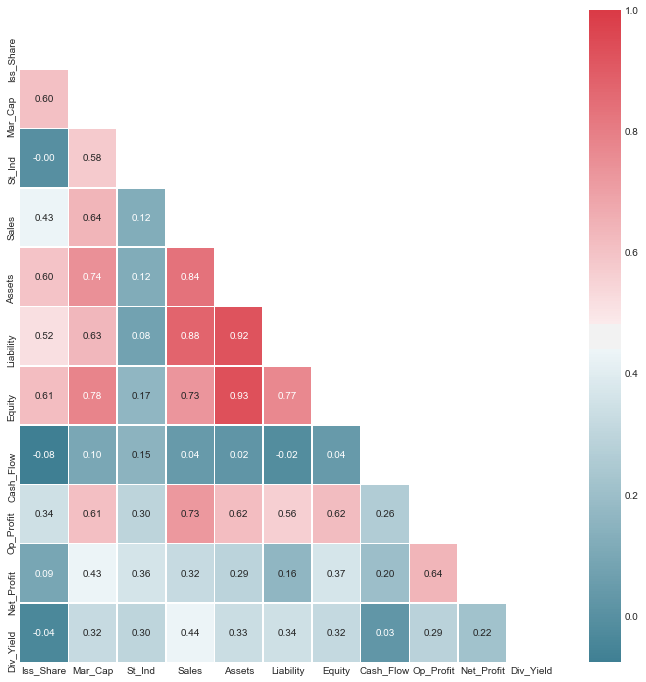

In [133]:
corr = prop_value_drop1.corr(method='spearman')
fig, ax = plt.subplots(figsize = (12,12))
colormap = sns.diverging_palette(220,10, as_cmap=True)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
colormap = sns.diverging_palette(220,10, as_cmap = True)
sns.heatmap(corr, cmap=colormap, linewidth=0.5, annot=True, fmt=".2f", mask=dropSelf)
plt.show()

In [134]:
prop_try_2 = prop.copy()
prop_value_drop2 = prop_try_2.drop(['Iss_Share', 'Mar_Cap', 'St_Ind', 'Sales', 'Equity', 'Assets', 'Liability', 'Cash_Flow', 'Op_Profit', 'Net_Profit'], axis=1)
prop_value_drop2.head().T

0                          1  \
Company_Name    Acset Indonusa Tbk.  Adhi Karya (Persero) Tbk.   
Code_Name                      ACST                       ADHI   
Subsector     Building Construction      Building Construction   
MR_Quarter               31/03/2020                 31/03/2020   
Fin_Yr_End                 December                   December   
DPS                               5                    18.6418   
EPS                            -711                         16   
RPS                            2729                       3444   
BVPS                            149                       1577   
CFPS                          12378                      -1297   
CEPS                            678                        330   
NAVS                            238                       1584   
Div_Yield                    0.0188                     0.0294   
PER                           -0.37                      39.69   
PSR                             0.1                       0.18   
PBVR                           1.79                        0.4   
PCFR                           0.02                      -0.49   
DPR                          -0.007                     1.1651   
GPM                               0                     0.1349   
OPM                         -0.0268                     0.0759   
NPM                         -0.2605                     0.0047   
EBITM                       -0.5825                    -0.0614   
ROE                         -4.7638                     0.0103   
ROA                          -0.106                     0.0015   
DER                         43.3407                     5.5087   
CR                           0.2204                     0.0457   
QR                            1.518                     0.8949   
CRR                          1.6324                      1.184   

                                      2                         3  \
Company_Name  Makmur Berkah Amanda Tbk.  Agung Podomoro Land Tbk.   
Code_Name                          AMAN                      APLN   
Subsector      Property And Real Estate  Property And Real Estate   
MR_Quarter                   31/03/2020                31/03/2020   
Fin_Yr_End                     December                  December   
DPS                                   0                         0   
EPS                                   3                       -79   
RPS                                  26                       233   
BVPS                                147                       360   
CFPS                                -94                        32   
CEPS                                  7                        34   
NAVS                                149                       486   
Div_Yield                             0                         0   
PER                               65.33                     -1.43   
PSR                                7.54                      0.49   
PBVR                               1.33                      0.31   
PCFR                              -2.08                       3.5   
DPR                                   0                         0   
GPM                              0.6283                    0.4151   
OPM                              0.2259                    0.2104   
NPM                              0.1311                   -0.3394   
EBITM                            0.0092                   -0.4717   
ROE                              0.0232                   -0.2196   
ROA                              0.0165                   -0.0574   
DER                              0.3929                    2.4699   
CR                               0.2048                    0.0831   
QR                                1.094                    0.4274   
CRR                              2.7621                    1.0254   

                                     4  
Company_Name   Armidian Karyatama Tbk.  
Code_Name                         A

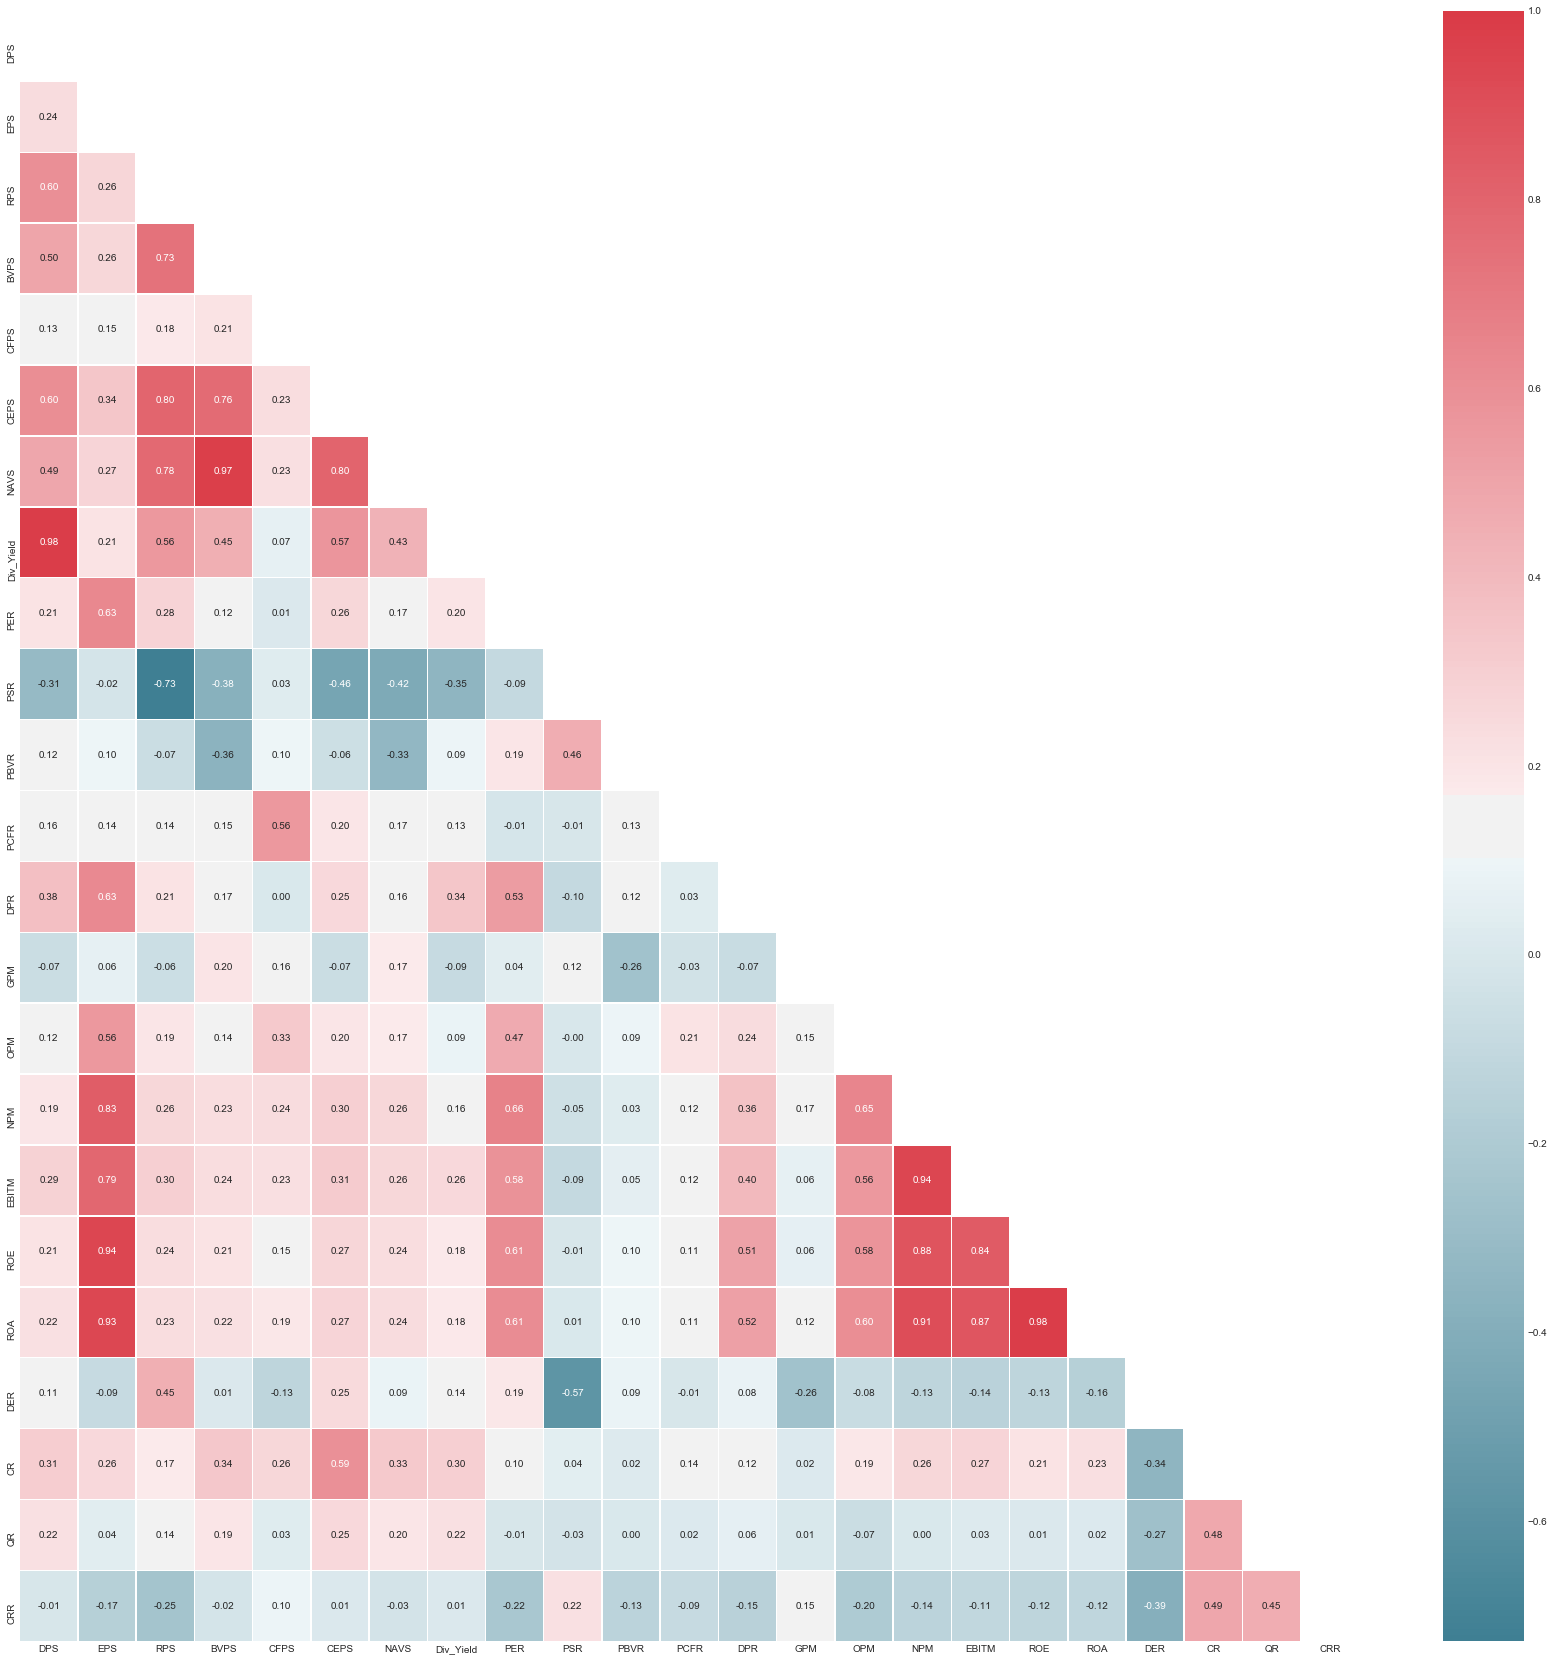

In [135]:
corr = prop_value_drop2.corr(method='spearman')
fig, ax = plt.subplots(figsize = (30,30))
colormap = sns.diverging_palette(220,10, as_cmap=True)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
colormap = sns.diverging_palette(220,10, as_cmap = True)
sns.heatmap(corr, cmap=colormap, linewidth=0.5, annot=True, fmt=".2f", mask=dropSelf)
plt.show()

## Visualisasi Target Feature Dividen Yield Perusahaan pada sektor `Property, Real Estate and Building Construction`

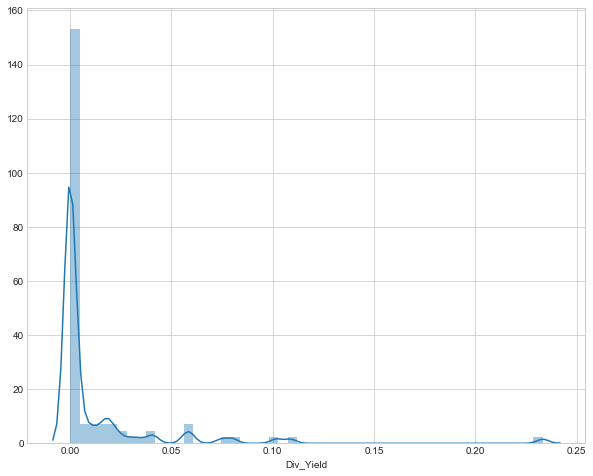

In [136]:
plt.figure(figsize=(10,8))
sns.distplot(prop['Div_Yield'])

## Visualisasi Tingkat Hutang terhadap Ekuitas pada Perusahaan sektor `Property, Real Estate and Building Construction`

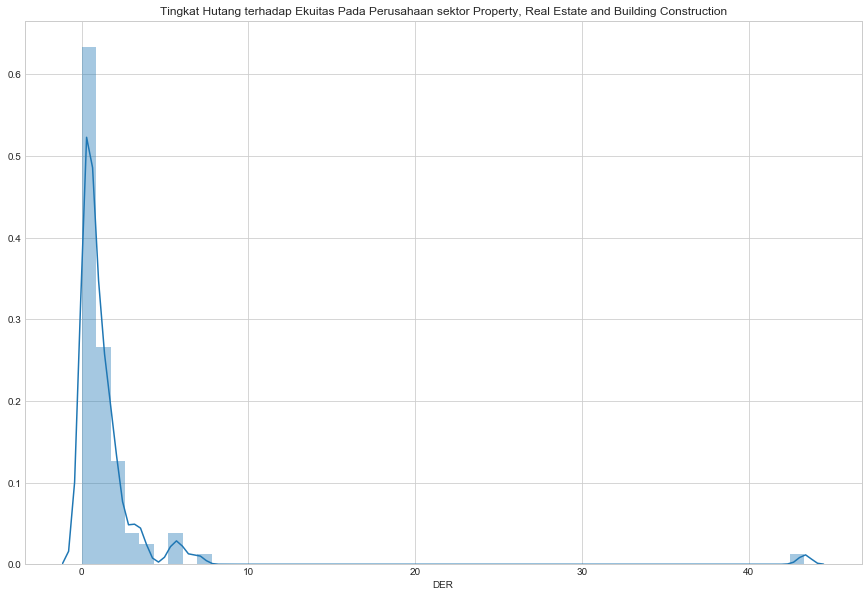

In [137]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(15,10))

sns.distplot(prop['DER'])
plt.title('Tingkat Hutang terhadap Ekuitas Pada Perusahaan sektor Property, Real Estate and Building Construction')
plt.show()

## Visualisasi Margin Keuntungan Bersih Perusahaan pada sektor `Property, Real Estate and Building Construction`

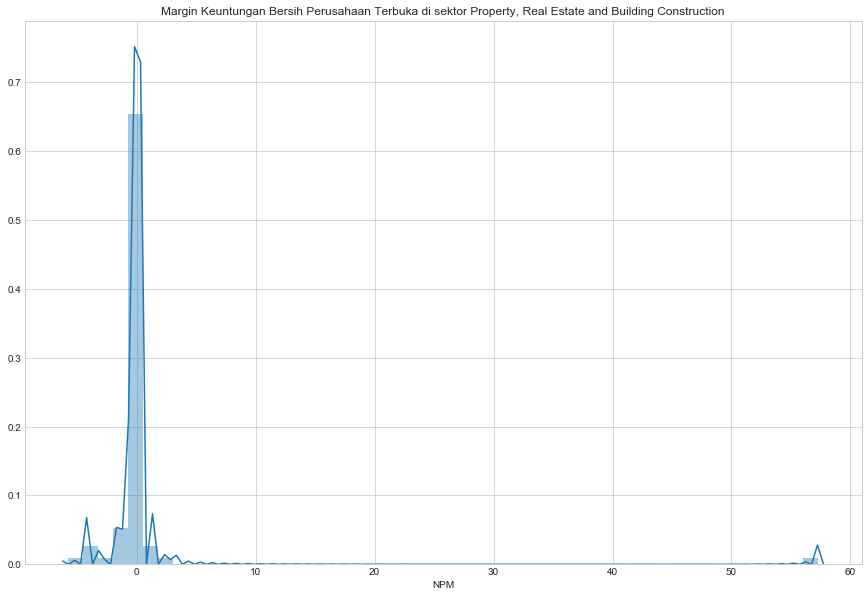

In [138]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(15,10))

sns.distplot(prop['NPM'])
plt.title('Margin Keuntungan Bersih Perusahaan Terbuka di sektor Property, Real Estate and Building Construction')
plt.show()

## Visualisasi Ekuitas Perusahaan Terbuka sektor `Property, Real Estate and Building Construction`

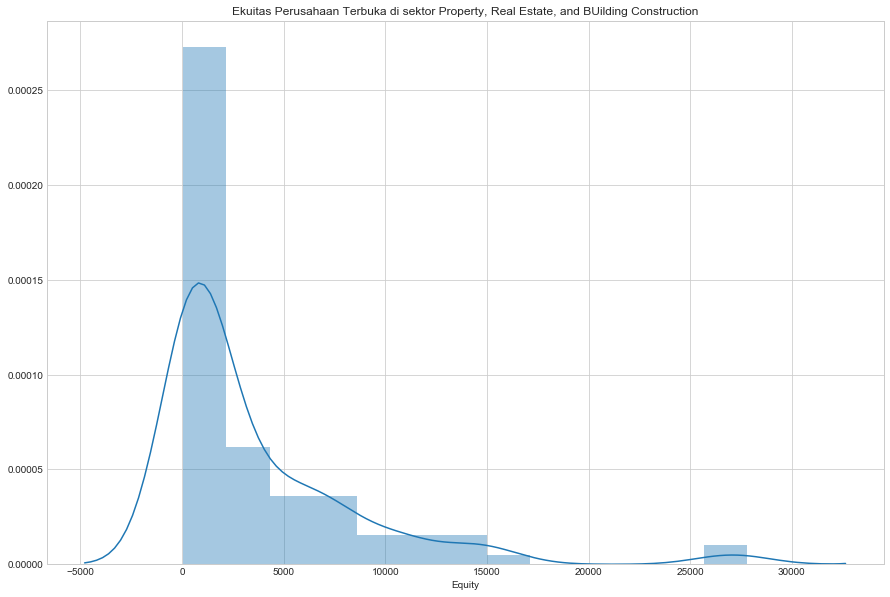

In [139]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(15,10))

sns.distplot(prop['Equity'])
plt.title('Ekuitas Perusahaan Terbuka di sektor Property, Real Estate, and BUilding Construction')
plt.show()

## Visualisasi Rasio Likuiditas Perusahaan Terbuka di sektor `Property, Real Estate and Building Construction`

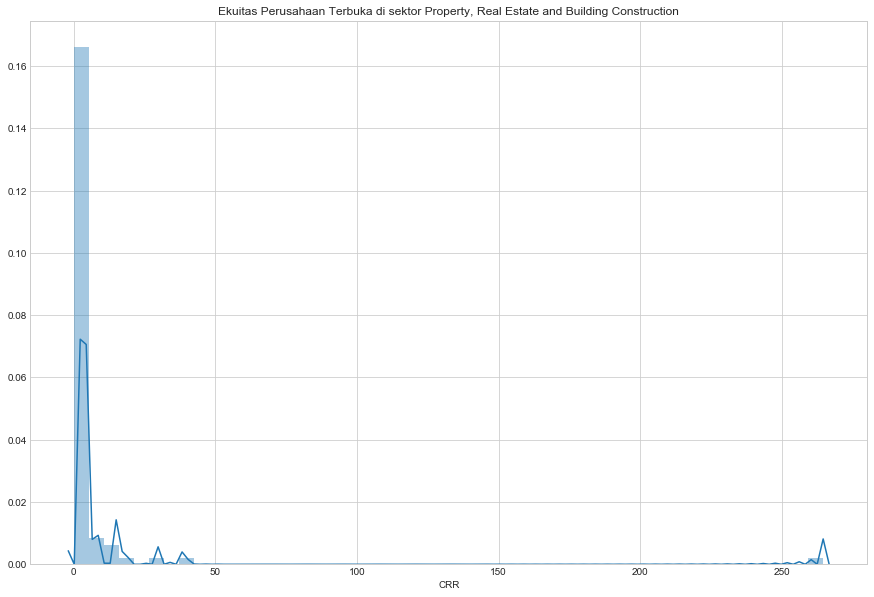

In [140]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(15,10))

sns.distplot(prop['CRR'])
plt.title('Ekuitas Perusahaan Terbuka di sektor Property, Real Estate and Building Construction')
plt.show()

<hr>

# __G. Explaratory Data Analysis Perusahaan Terbuka sektor `Mining`__

In [141]:
mining = sql_df('''select * from mining''')
mining.head().T

0                         1  \
Company_Name  Adaro Energy Tbk.        Aneka Tambang Tbk.   
Code_Name                  ADRO                      ANTM   
Subsector           Coal Mining  Metal And Mineral Mining   
MR_Quarter           31/03/2020                31/03/2020   
Fin_Yr_End             December                  December   
Iss_Share                 31.99                     24.03   
Mar_Cap                   34700                     15500   
St_Ind                     98.6                     425.3   
Sales                   10506.6                      5200   
Assets                    96880                     30770   
Liability                 35000                     12750   
Equity                    52360                     18030   
Cash_Flow               1992.48                     18.87   
Op_Profit               1910.16                    137.54   
Net_Profit              1374.52                   -281.84   
DPS                      109.48                      2.82   
EPS                       172.2                       -47   
RPS                      1314.6                       866   
BVPS                     1635.2                       750   
CFPS                      249.2                         3   
CEPS                      547.4                       132   
NAVS                     1741.4                       750   
Div_Yield                0.1027                    0.0044   
PER                         5.4                    -13.72   
PSR                        0.71                      0.74   
PBVR                       0.57                      0.86   
PCFR                       3.72                    205.39   
DPR                      0.6341                     -0.06   
GPM                      0.2644                     0.108   
OPM                      0.1818                    0.0264   
NPM                      0.1308                   -0.0541   
EBITM                    0.1213                   -0.2979   
ROE                       0.105                   -0.0625   
ROA                      0.0567                   -0.0366   
DER                      0.7883                    0.7071   
CR                       1.2262                    0.5625   
QR                       1.6925                    0.8941   
CRR                      1.7952                    1.3186   

                                           2                               3  \
Company_Name       Apeindo Pratama Duta Tbk.            Atlas Resources Tbk.   
Code_Name                               APEX                            ARII   
Subsector     Crude Petroleum & Natural Gas   Crude Petroleum & Natural Gas    
MR_Quarter                        31/03/2020                      31/03/2020   
Fin_Yr_End                          December                        December   
Iss_Share                               2.66                               3   
Mar_Cap                               465.47                            1560   
St_Ind                                  11.2                            34.7   
Sales                                 255.78                          168.28   
Assets                                6919.5                         4876.48   
Liability                            6231.12                          4378.5   
Equity                                688.38                          535.64   
Cash_Flow                              25.34                          -8.876   
Op_Profit                              -16.1                           2.044   
Net_Profit                            -102.9                          -76.86   
DPS                                        0                               0   
EPS                                   -155.4                          -102.2   
RPS                                      385                             224   
BVPS                                     259                           179.2   
CFPS                                    37.8      

<hr>

### __1g. Apa saja subsektor pada sektor ini?__

In [142]:
mining['Subsector'].value_counts()

Coal Mining                       23
Metal And Mineral Mining          12
Crude Petroleum & Natural Gas     10
Land / Stone Quarrying             1
Non Building Construction          1
Others - Trade Services & Inve     1
Name: Subsector, dtype: int64

### __2g. Sekaran kita mengetahui jika subsektor terbanyak pada sektor `Mining` adalah subsektor `Coal Mining`. Apa saja yang memiliki penjualan tertinggi pada sektor `Mining` dan subsektor `Coal Mining` pada Q1 2020 ini?__

In [143]:
sql_df('''select Company_Name as NamaPerusahaan,
Code_Name as KodeSaham,
Sales as Penjualan_dlm_Milliar
from mining
order by Sales DESC
Limit 5''')

NamaPerusahaan KodeSaham  Penjualan_dlm_Milliar
0     Dian Swastatika Sentosa Tbk      DSSA                23380.0
1  Medco Energi Internasional Tbk      MEDC                20160.0
2               Adaro Energy Tbk.      ADRO                10506.6
3              Indika Energy Tbk.      INDY                 8981.0
4              Aneka Tambang Tbk.      ANTM                 5200.0

In [144]:
sql_df('''Select Company_Name as NamaPerusahaan,
Code_Name as KodeSaham,
Sales as Penjualan_dalam_Milliar
from mining
where Subsector = 'Coal Mining'
order by Sales DESC
Limit 5
''')

NamaPerusahaan KodeSaham  Penjualan_dalam_Milliar
0  Dian Swastatika Sentosa Tbk      DSSA                  23380.0
1            Adaro Energy Tbk.      ADRO                  10506.6
2           Indika Energy Tbk.      INDY                   8981.0
3  Indo Tambangraya Megah Tbk.      ITMG                   5122.6
4              Bukit Asam Tbk.      PTBA                   5120.0

### __3g. Perusahaan apa saja pada sektor ini yang memiliki profit bersih paling tinggi di Q1 2020?__

In [145]:
sql_df('''select Company_Name as NamaPerusahaan,
Code_Name as KodeSaham,
Net_Profit as ProfitBersih_dlm_Milliar
from mining
order by Net_Profit DESC
limit 5''')

NamaPerusahaan KodeSaham  ProfitBersih_dlm_Milliar
0            Adaro Energy Tbk.      ADRO                   1374.52
1              Bukit Asam Tbk.      PTBA                    903.25
2  Dian Swastatika Sentosa Tbk      DSSA                    703.08
3         Bayan Resources Tbk.      BYAN                    497.70
4     Golden Energy Mines Tbk.      GEMS                    464.10

### __4g. Perusahaan apa saja pada sektor ini yang memiliki margin keuntungan bersih paling tinggi pada Q1 2020?__

In [146]:
sql_df('''select Company_Name as NamaPerusahaan,
Code_Name as KodeSaham,
NPM as Margin_Keuntungan_Bersih_dlmMilliar
from mining
order by NPM DESC
Limit 5''')

NamaPerusahaan KodeSaham  \
0       Perdana Karya Perkasa Tbk      PKPK   
1  Astrindo Nusantara Infrastrukt      BIPI   
2    Cita Mineral Investindo Tbk.      CITA   
3       Mitrabara Adiperdana Tbk.      MBAP   
4          Kapuas Prima Coal Tbk.      ZINC   

   Margin_Keuntungan_Bersih_dlmMilliar  
0                               2.1876  
1                               0.5963  
2                               0.2271  
3                               0.2198  
4                               0.2017

### __5g. Perusahaan apa saja yang memiliki tingkat hutang terhadap ekuitas terendah di sektor ini pada Q1 2020?__

In [147]:
sql_df('''select Company_Name as NamaPerusahaan,
Code_Name as KodeSaham,
DER as tingkat_hutang
from mining
where DER > 0
order by DER
limit 5''')

NamaPerusahaan KodeSaham  tingkat_hutang
0           Vale Indonesia Tbk.      INCO          0.1149
1            Cakra Mineral Tbk.      CKRA          0.1285
2             Harum Energy Tbk.      HRUM          0.1525
3        Samindo Resources Tbk.      MYOH          0.2151
4  Bumi Resources Minerals Tbk.      BRMS          0.2480

### __6g. Perusahaan apa saja yang memiliki Ekuitas terbesar di sektor ini pada Q1 2020 ini?__

In [148]:
sql_df('''Select Company_Name as NamaPerusahaan,
Code_Name as KodeSaham,
Equity as Ekuitas
from mining
order by Equity DESC
Limit 5''')

NamaPerusahaan KodeSaham  Ekuitas
0            Adaro Energy Tbk.      ADRO  52360.0
1          Vale Indonesia Tbk.      INCO  27580.0
2  Dian Swastatika Sentosa Tbk      DSSA  20860.0
3              Bukit Asam Tbk.      PTBA  19760.0
4           Aneka Tambang Tbk.      ANTM  18030.0

### __7g. Perusahaan apa saja yang memiliki rasio likuiditas tertinggi di sektor ini pada Q1 2020?__

In [149]:
sql_df('''select Company_Name as NamaPerusahan,
Code_Name as KodeSaham,
QR as Rasio_Likuiditas
from mining
order by QR DESC
limit 5''')

NamaPerusahan KodeSaham  Rasio_Likuiditas
0         Cakra Mineral Tbk.      CKRA            9.0580
1          Harum Energy Tbk.      HRUM            8.5570
2  Perdana Karya Perkasa Tbk      PKPK            4.8555
3        Vale Indonesia Tbk.      INCO            4.0189
4     Samindo Resources Tbk.      MYOH            3.6816

### __8g. Perusahaan apa pada sektor `Mining` pada Q1 2020 ini yang;__
  #### a.memiliki *__dividen yield__* diatas 4% 
  #### b.memiliki *__tingkat harga saham terhadap nilai bukunya__* tidak melebihi 2x
  #### c.*__rasio hutang terhadap ekuitas__* tidak melebihi 200% dari ekuitasnya
  #### d.*__rasio pembagian dividen yang tinggi terhadap laba bersihnya__* (diatas 20%)
  #### e.*__pengembalian laba bersih terhadap ekuitas lebih dari 5%__*?
  #### f. diurutkan dari yang memiliki *__rasio likuiditas__* tertinggi. Tampilkan 10 perusahaan.

In [150]:
recom_mining = sql_df('''select Company_Name,
Code_Name,
Subsector,
Equity,
PBVR,
DER,
Div_Yield,
ROE,
DPR
from mining
where DER < 2 and Div_Yield > 0.04 and ROE > 0.05 and DPR > 0.2 and PBVR < 2 and PBVR > 0
ORDER BY CRR DESC
Limit 10''')
recom_mining

Company_Name Code_Name                       Subsector  \
0    Mitrabara Adiperdana Tbk.      MBAP                     Coal Mining   
1              Bukit Asam Tbk.      PTBA                     Coal Mining   
2  Indo Tambangraya Megah Tbk.      ITMG                     Coal Mining   
3            Adaro Energy Tbk.      ADRO                     Coal Mining   
4                Petrosea Tbk.      PTRO       Non Building Construction   
5                  Elnusa Tbk.      ELSA  Crude Petroleum & Natural Gas    

    Equity  PBVR     DER  Div_Yield     ROE     DPR  
0   2245.6  0.79  0.3792     0.0955  0.3717  0.2025  
1  19760.0  1.21  0.3950     0.1577  0.1828  1.0397  
2  12198.8  0.59  0.4293     0.1711  0.0707  1.4278  
3  52360.0  0.57  0.7883     0.1027  0.1050  0.6341  
4   2939.3  0.43  1.6297     0.0732  0.0801  0.2487  
5   3630.0  0.49  1.1532     0.0505  0.0571  0.4361

In [151]:
# recom_mining.to_csv('Mining.csv')

<hr>

## __Descriptive Analysis__

In [152]:
mining.describe().T

count          mean           std        min          25%  \
Iss_Share    48.0     12.056470     16.084981     0.6000     2.190000   
Mar_Cap      48.0   6179.671042  10194.604780    30.0000   519.710000   
St_Ind       48.0    356.789583    659.538231     1.3000    17.850000   
Sales        48.0   2584.636250   4668.849734     0.0000   161.885000   
Assets       48.0  13794.203542  20891.171449    58.3800  1335.000000   
Liability    48.0   7619.890417  13022.844086    16.7200   637.100000   
Equity       48.0   5619.391667   9418.887827 -3181.5000   565.340000   
Cash_Flow    48.0    478.568482   1002.938928  -327.1800     2.727500   
Op_Profit    48.0    368.960012    903.804507  -436.8800    -0.316852   
Net_Profit   48.0     73.035543    321.439206  -491.4000   -36.580000   
DPS          48.0     76.438150    257.970184     0.0000     0.000000   
EPS          48.0     73.391667    237.015478  -225.4000   -32.650000   
RPS          48.0   2016.970833   5079.115335     0.0000    68.750000   
BVPS         48.0   1385.675000   4119.229172   -47.6000   143.100000   
CFPS         48.0    266.703042    654.296058  -270.0000     0.259500   
CEPS         48.0    427.866667   1114.766937     0.0000     3.000000   
NAVS         48.0   1458.383333   4491.114496   -14.0000   121.650000   
Div_Yield    48.0      0.023629      0.045011     0.0000     0.000000   
PER          48.0     29.542708    147.705980   -50.0000    -3.340000   
PSR          48.0      2.429792      7.498003     0.0000     0.217500   
PBVR         48.0      1.622708      5.160274    -4.6400     0.312500   
PCFR         48.0      5.341875     94.475727  -482.2600     0.560000   
DPR          48.0      0.148879      0.409285    -0.3750     0.000000   
GPM          48.0      0.174683      0.193790    -0.4181     0.103125   
OPM          48.0      0.044890      0.258690    -0.7935    -0.007200   
NPM          48.0     -0.026906      0.476775    -1.4372    -0.099850   
EBITM        48.0     -0.168310      0.468342    -2.2515    -0.249300   
ROE          48.0      0.091654      0.662312    -0.9635    -0.096150   
ROA          48.0     -0.001277      0.115739    -0.3896    -0.063950   
DER          48.0      2.977802     12.267050   -13.8254     0.391050   
CR           48.0      0.609233      1.164712     0.0018     0.051500   
QR           48.0      1.560223      1.845614     0.0000     0.450025   
CRR          48.0      1.904575      1.865560     0.1019     0.864075   

                    50%           75%         max  
Iss_Share      5.160000     13.855000     67.1500  
Mar_Cap     2150.000000   4677.500000  42920.0000  
St_Ind        66.750000    336.350000   2930.0000  
Sales        895.515000   2842.610000  23380.0000  
Assets      6577.480000  16100.000000  96880.0000  
Liability   2940.770000   7589.235000  65100.0000  
Equity      2733.570000   5104.410000  52360.0000  
Cash_Flow    104.540000    404.692500   5773.0400  
Op_Profit     90.090000    294.552500   5074.3000  
Net_Profit     1.474635    178.315000   1374.5200  
DPS            0.000000      7.552750   1275.0000  
EPS            0.500000     85.050000    912.8000  
RPS          388.500000   1295.400000  30276.0000  
BVPS         283.500000    936.150000  26992.0000  
CFPS          22.000000    286.300000   3952.2000  
CEPS          29.900000    259.350000   5922.0000  
NAVS         237.100000    945.750000  29762.6000  
Div_Yield      0.000000      0.033775      0.1711  
PER            1.385000      8.422500    976.6700  
PSR            0.705000      1.422500     50.9200  
PBVR           0.640000      1.195000     35.3000  
PCFR           2.670000      7.080000    335.1900  
DPR            0.000000      0.002825      1.9480  
GPM            0.175150      0.290325      0.5052  
OPM            0.094100      0.151400      0.8017  
NPM            0.009750      0.110650      2.1876  
EBITM         -0.009200      0.099250      0.3677  
ROE            0.014800      0.193075      3.8672  
ROA            0.0030

## __Correlation Analysis__

In [153]:
mining_try_1 = mining.copy()
mining_value_drop1 = mining_try_1.drop(['DPR', 'DPS', 'EPS', 'RPS', 'BVPS', 'CFPS', 'CEPS', 'NAVS', 'PER', 'PSR', 'PBVR', 'PCFR', 'GPM', 'OPM', 'NPM', 'EBITM', 'ROE', 'ROA', 'CR', 'QR', 'CRR', 'DER'], axis=1)
mining_value_drop1.head().T

0                         1  \
Company_Name  Adaro Energy Tbk.        Aneka Tambang Tbk.   
Code_Name                  ADRO                      ANTM   
Subsector           Coal Mining  Metal And Mineral Mining   
MR_Quarter           31/03/2020                31/03/2020   
Fin_Yr_End             December                  December   
Iss_Share                 31.99                     24.03   
Mar_Cap                   34700                     15500   
St_Ind                     98.6                     425.3   
Sales                   10506.6                      5200   
Assets                    96880                     30770   
Liability                 35000                     12750   
Equity                    52360                     18030   
Cash_Flow               1992.48                     18.87   
Op_Profit               1910.16                    137.54   
Net_Profit              1374.52                   -281.84   
Div_Yield                0.1027                    0.0044   

                                           2                               3  \
Company_Name       Apeindo Pratama Duta Tbk.            Atlas Resources Tbk.   
Code_Name                               APEX                            ARII   
Subsector     Crude Petroleum & Natural Gas   Crude Petroleum & Natural Gas    
MR_Quarter                        31/03/2020                      31/03/2020   
Fin_Yr_End                          December                        December   
Iss_Share                               2.66                               3   
Mar_Cap                               465.47                            1560   
St_Ind                                  11.2                            34.7   
Sales                                 255.78                          168.28   
Assets                                6919.5                         4876.48   
Liability                            6231.12                          4378.5   
Equity                                688.38                          535.64   
Cash_Flow                              25.34                          -8.876   
Op_Profit                              -16.1                           2.044   
Net_Profit                            -102.9                          -76.86   
Div_Yield                                  0                               0   

                                  4  
Company_Name  Ratu Prabu Energi Tbk  
Code_Name                      ARTI  
Subsector               Coal Mining  
MR_Quarter               30/09/2019  
Fin_Yr_End                 December  
Iss_Share                      7.84  
Mar_Cap                         392  
St_Ind                         12.3  
Sales                         142.7  
Assets                         3550  
Liability                    996.75  
Equity                         2450  
Cash_Flow                     86.19  
Op_Profit                    -18.47  
Net_Profit                    -6.29  
Div_Yield                         0

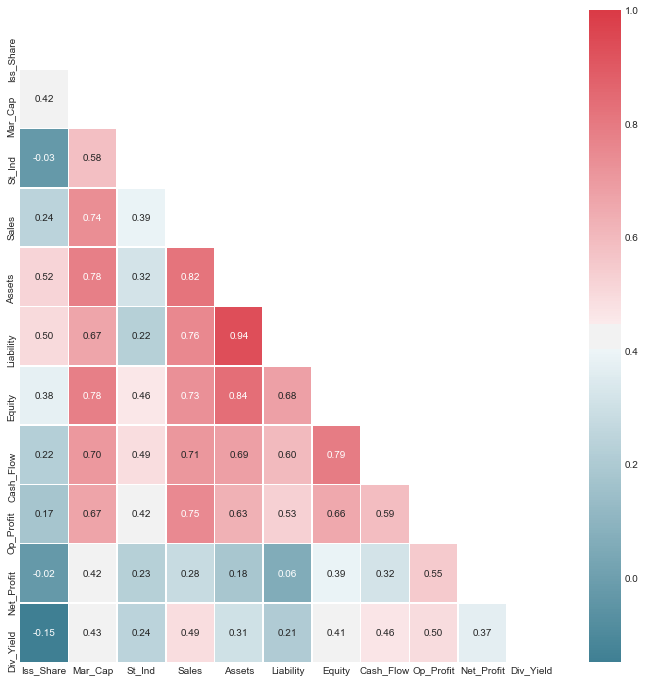

In [154]:
corr = mining_value_drop1.corr(method='spearman')
fig, ax = plt.subplots(figsize = (12,12))
colormap = sns.diverging_palette(220,10, as_cmap=True)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
colormap = sns.diverging_palette(220,10, as_cmap = True)
sns.heatmap(corr, cmap=colormap, linewidth=0.5, annot=True, fmt=".2f", mask=dropSelf)
plt.show()

In [155]:
mining_try_2 = mining.copy()
mining_value_drop2 = mining_try_2.drop(['Iss_Share', 'Mar_Cap', 'St_Ind', 'Sales', 'Equity', 'Assets', 'Liability', 'Cash_Flow', 'Op_Profit', 'Net_Profit'], axis=1)
mining_value_drop2.head().T

0                         1  \
Company_Name  Adaro Energy Tbk.        Aneka Tambang Tbk.   
Code_Name                  ADRO                      ANTM   
Subsector           Coal Mining  Metal And Mineral Mining   
MR_Quarter           31/03/2020                31/03/2020   
Fin_Yr_End             December                  December   
DPS                      109.48                      2.82   
EPS                       172.2                       -47   
RPS                      1314.6                       866   
BVPS                     1635.2                       750   
CFPS                      249.2                         3   
CEPS                      547.4                       132   
NAVS                     1741.4                       750   
Div_Yield                0.1027                    0.0044   
PER                         5.4                    -13.72   
PSR                        0.71                      0.74   
PBVR                       0.57                      0.86   
PCFR                       3.72                    205.39   
DPR                      0.6341                     -0.06   
GPM                      0.2644                     0.108   
OPM                      0.1818                    0.0264   
NPM                      0.1308                   -0.0541   
EBITM                    0.1213                   -0.2979   
ROE                       0.105                   -0.0625   
ROA                      0.0567                   -0.0366   
DER                      0.7883                    0.7071   
CR                       1.2262                    0.5625   
QR                       1.6925                    0.8941   
CRR                      1.7952                    1.3186   

                                           2                               3  \
Company_Name       Apeindo Pratama Duta Tbk.            Atlas Resources Tbk.   
Code_Name                               APEX                            ARII   
Subsector     Crude Petroleum & Natural Gas   Crude Petroleum & Natural Gas    
MR_Quarter                        31/03/2020                      31/03/2020   
Fin_Yr_End                          December                        December   
DPS                                        0                               0   
EPS                                   -155.4                          -102.2   
RPS                                      385                             224   
BVPS                                     259                           179.2   
CFPS                                    37.8                           -12.6   
CEPS                                    88.2                             2.8   
NAVS                                     259                           166.6   
Div_Yield                                  0                               0   
PER                                    -0.97                           -4.34   
PSR                                     0.39                            1.98   
PBVR                                    0.58                            2.49   
PCFR                                    3.92                          -37.38   
DPR                                        0                               0   
GPM                                    0.114                          0.0885   
OPM                                  -0.0631                          0.0121   
NPM                                   -0.402                         -0.4567   
EBITM                                -0.6929                         -0.6063   
ROE                                  -0.5975                         -0.5739   
ROA                                  -0.0594                          -0.063   
DER                                    9.052                          8.1751   
CR                                    0.6412                          0.0018   
QR                                    1.2986                          0.1469   
CRR                 

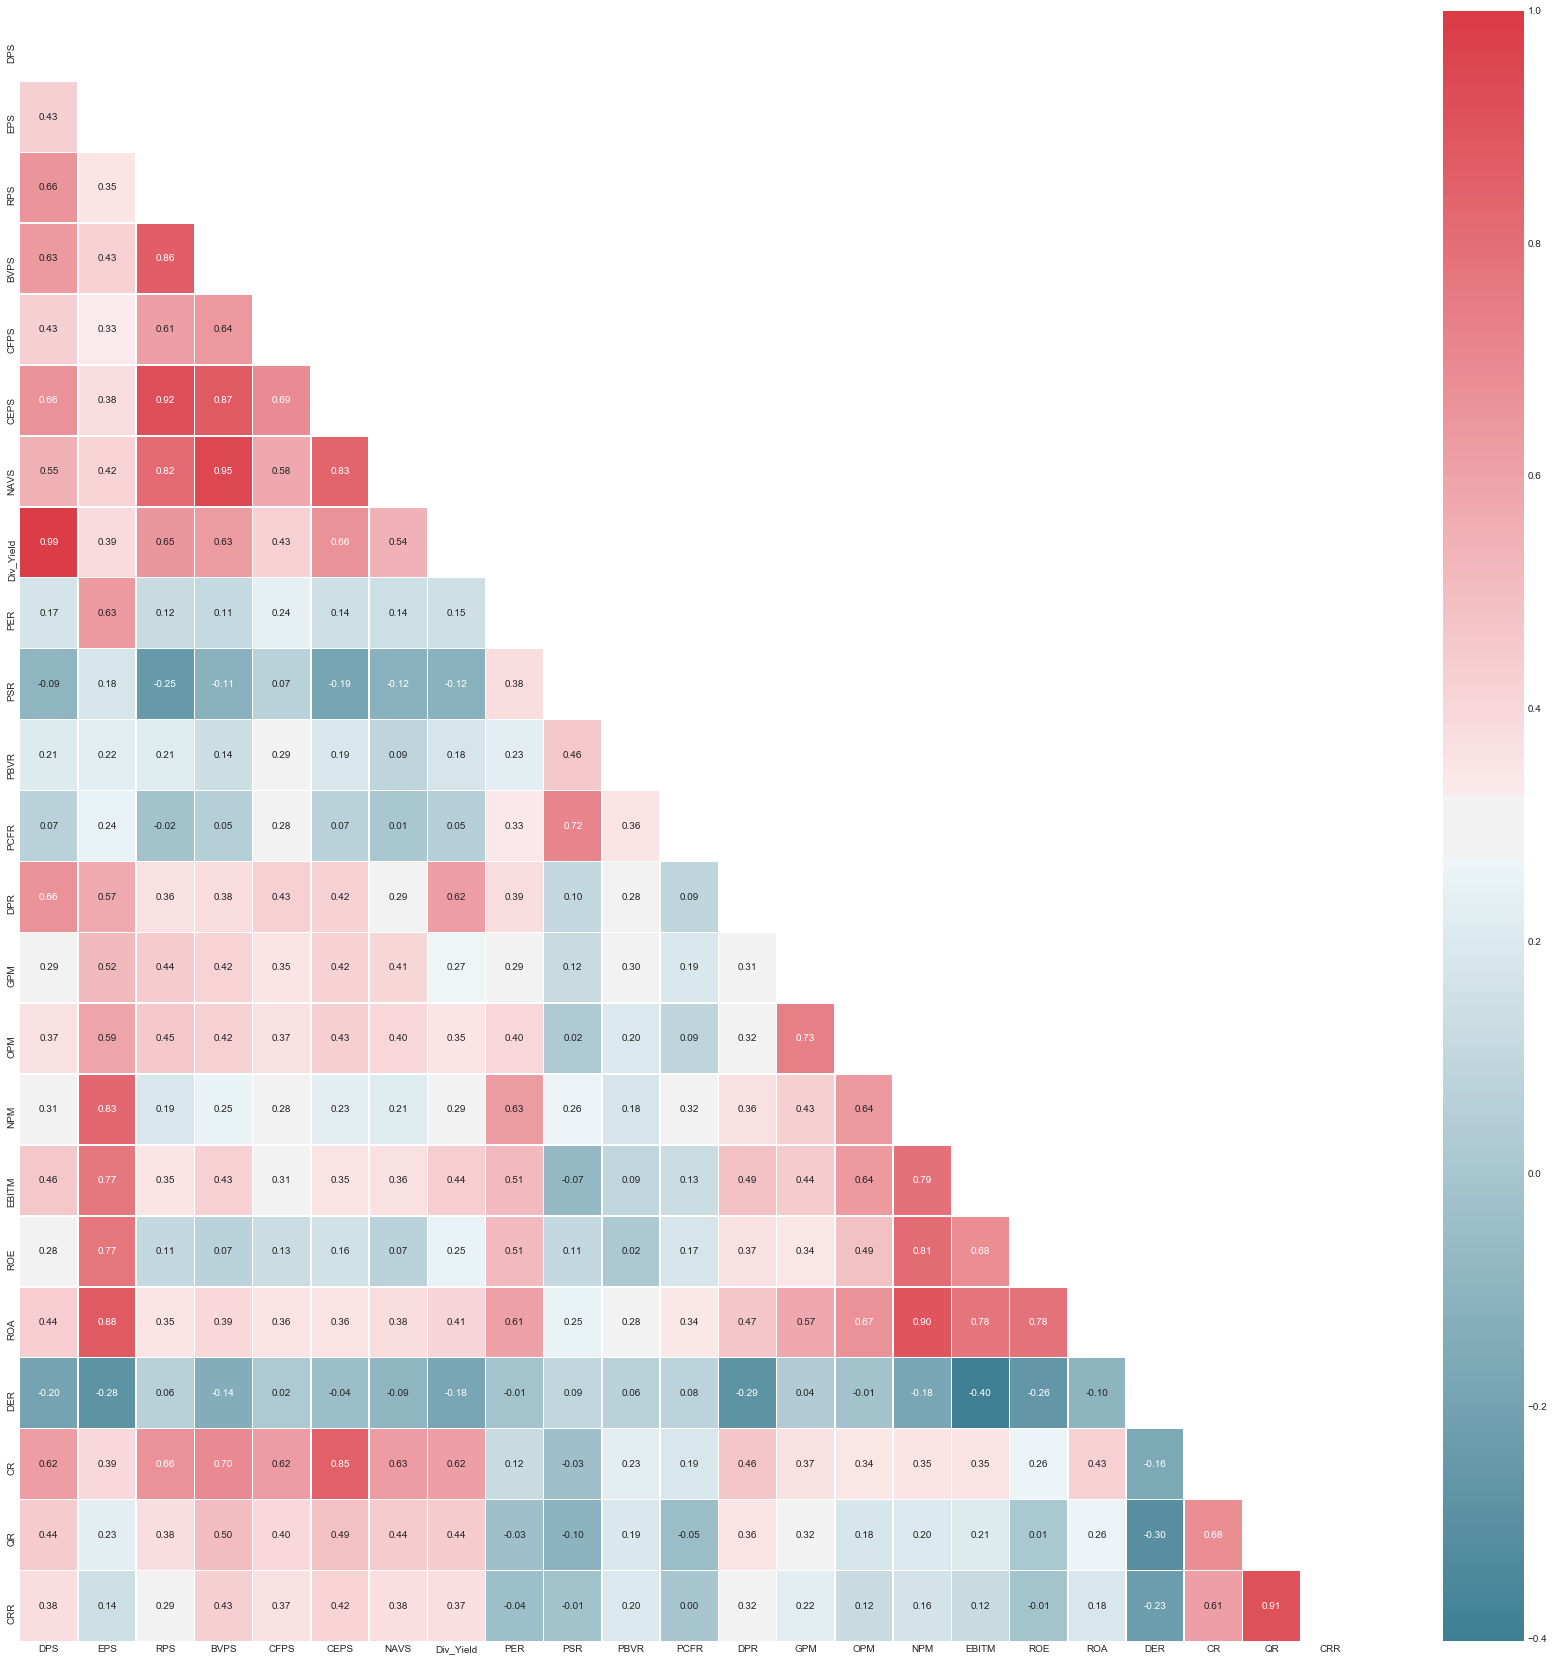

In [156]:
corr = mining_value_drop2.corr(method='spearman')
fig, ax = plt.subplots(figsize = (30,30))
colormap = sns.diverging_palette(220,10, as_cmap=True)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
colormap = sns.diverging_palette(220,10, as_cmap = True)
sns.heatmap(corr, cmap=colormap, linewidth=0.5, annot=True, fmt=".2f", mask=dropSelf)
plt.show()

## Visualisasi Target Feature `Dividen Yield` pada Perusahaan sektor `Mining` 

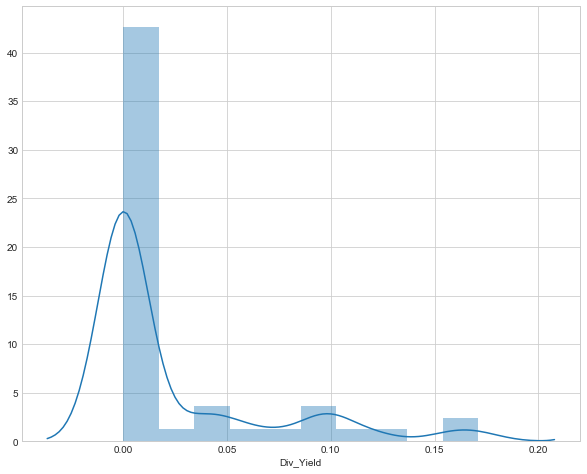

In [157]:
plt.figure(figsize=(10,8))
sns.distplot(mining['Div_Yield'])

## Visualisasi Tingkat Hutang terhadap Ekuitas pada Perusahaan sektor `Mining` 

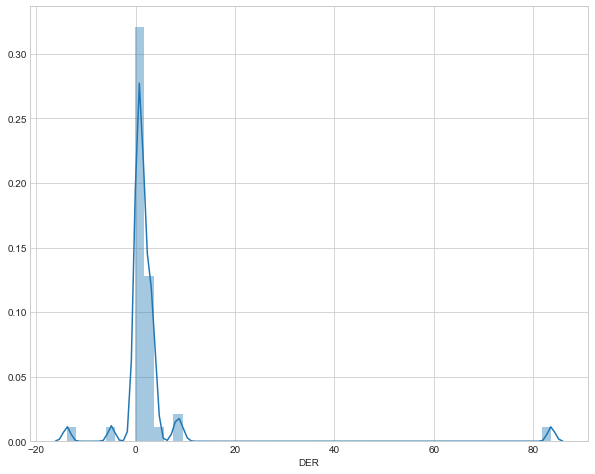

In [158]:
plt.figure(figsize=(10,8))
sns.distplot(mining['DER'])

## Visualisasi Margin Keuntungan Bersih Perusahaan sektor `Mining`

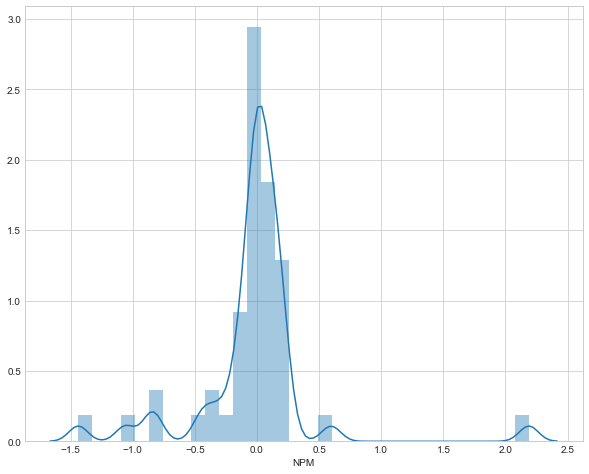

In [159]:
plt.figure(figsize=(10,8))
sns.distplot(mining['NPM'])

## Visualisasi Ekuitas Perusahaan Terbuka pada sektor `Mining`

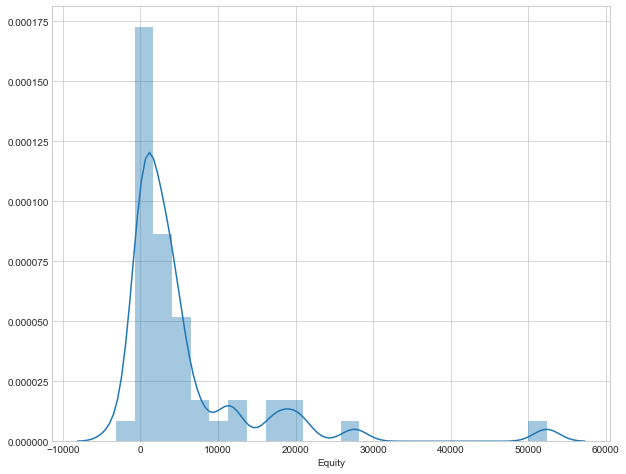

In [160]:
plt.figure(figsize=(10,8))
sns.distplot(mining['Equity'])

## Visualisasi Rasio Likuiditas Perusahaan Terbuka pada sektor `Mining`

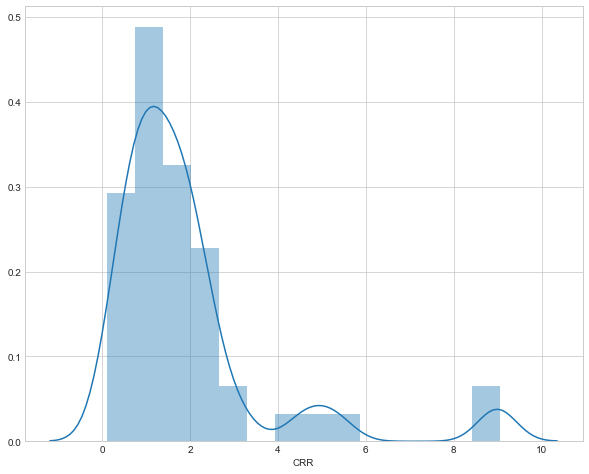

In [161]:
plt.figure(figsize=(10,8))
sns.distplot(mining['CRR'])

<hr>

## __H. Exploratory Data Analysis pada Perusahaan sektor `Basic Industry and Chemicals`__

In [162]:
chem = sql_df('''select * from basic_industry_and_chemicals''')
chem.head().T

0                        1  \
Company_Name  Polychem Indonesia Tbk  Aneka Gas Industri Tbk.   
Code_Name                       ADMG                     AGII   
Subsector            Tetile, Garment                Chemicals   
MR_Quarter                31/03/2020               31/03/2020   
Fin_Yr_End                  December                 December   
Iss_Share                       3.89                     3.07   
Mar_Cap                       400.59                     1720   
St_Ind                           9.2                     50.9   
Sales                          798.7                   544.43   
Assets                       3339.14                     7190   
Liability                     560.42                     3870   
Equity                       2778.86                     3260   
Cash_Flow                      17.22                    37.83   
Op_Profit                     -64.12                    98.48   
Net_Profit                    -61.18                    18.97   
DPS                                0                     3.25   
EPS                              -63                       25   
RPS                            821.8                      710   
BVPS                             714                     1063   
CFPS                            18.2                       49   
CEPS                              49                      140   
NAVS                             714                     1083   
Div_Yield                          0                   0.0058   
PER                             -1.4                     22.4   
PSR                             0.11                     0.79   
PBVR                            0.12                     0.53   
PCFR                            4.99                    11.35   
DPR                                0                     0.13   
GPM                          -0.0438                   0.4531   
OPM                          -0.0802                   0.1808   
NPM                          -0.0766                   0.0348   
EBITM                        -0.0718                  -0.1488   
ROE                           -0.088                   0.0232   
ROA                          -0.0733                   0.0105   
DER                           0.2017                   1.1869   
CR                             0.482                   0.2371   
QR                            1.8919                   0.7872   
CRR                            3.407                   1.0355   

                                           2                      3  \
Company_Name  Argha Karya Prima Industry Tbk  Alkindo Naratama Tbk.   
Code_Name                               AKPI                   ALDO   
Subsector               Plastics & Packaging           Pulp & Paper   
MR_Quarter                        31/03/2020             31/03/2020   
Fin_Yr_End                          December               December   
Iss_Share                               0.68                    1.1   
Mar_Cap                               201.28                    440   
St_Ind                                    39                  293.2   
Sales                                 572.25                 311.38   
Assets                                  3190                 938.79   
Liability                               1720                 394.24   
Equity                                  1470                  424.6   
Cash_Flow                              53.69                  20.85   
Op_Profit                              19.53                   27.5   
Net_Profit                             -2.54                   8.16   
DPS                                       12                    1.1   
EPS                                      -15                     30   
RPS                                     3366                   1132   
BVPS                                    2166                    386   
CFPS                                     316                     76   
CEPS    

### __1h. Apa saja subsektor yang ada pada sektor `Basic Industry and Chemicals`?__

In [163]:
chem['Subsector'].value_counts()

Metal And Allied Products         15
Chemicals                         11
Plastics & Packaging              11
Pulp & Paper                       9
Ceramics, Glass, Porcelain         8
Animal Feed                        5
Wood Industries                    3
Cement                             3
 Basic Industry And Chemicals      2
Chemicals                          2
 Metal And Allied Products         2
Cable                              1
 Others - Basic Industry And C     1
Metal And Allied Products          1
Coal Mining                        1
Tetile, Garment                    1
 Wood Industries                   1
 Plastics & Packaging              1
Others - Basic Industry And Ch     1
 Cement                            1
Name: Subsector, dtype: int64

### __2h. Sekarang kita mengetahui subsektor terbanyak pada sektor `Basic Industry and Chemicals adalah subsektor `Metal and Allied Products`. Perusahan apa saja yang memilki penjualan tertinggi pada sektor `Basic Industry and Chemicals` dan subsektor `Metal and Allied Products`?__

In [166]:
sql_df('''Select Company_Name as NamaPerusahaan,
Code_Name as KodeSaham,
Subsector as Subsektor,
Sales as Penjualan_dalam_Milliar
from basic_industry_and_chemicals
order by Sales DESC
LIMIT 5''')

NamaPerusahaan KodeSaham                  Subsektor  \
0  Trinitan Metals and Minerals T      PURE  Metal And Allied Products   
1  Charoen Pokphand Indonesia Tbk      CPIN                Animal Feed   
2    Japfa Comfeed Indonesia Tbk.      JPFA                Animal Feed   
3  Semen Indonesia (Persero) Tbk.      SMGR                     Cement   
4             Barito Pacific Tbk.      BRPT                  Chemicals   

   Penjualan_dalam_Milliar  
0                 452120.0  
1                  13890.0  
2                   9080.0  
3                   8580.0  
4                   8548.4

In [168]:
sql_df('''Select Company_Name as NamaPerusahaan,
Code_Name as KodeSaham,
Sales as Penjualan_dalam_Milliar
from basic_industry_and_chemicals
Where Subsector = 'Metal and Allied Products'
order by Sales DESC
Limit 5
''')

NamaPerusahaan KodeSaham  Penjualan_dalam_Milliar
0  Trinitan Metals and Minerals T      PURE                452120.00
1          Gunung Raja Paksi Tbk.      GGRP                  2749.32
2      Tembaga Mulia Semanan Tbk.      TBMS                  1873.90
3  Steel Pipe Industry of Indones      ISSP                  1050.00
4       Lotte Chemical Titan Tbk.      FPNI                   982.10

### __3h. Perusahaan apa saja yang memiliki keuntungan bersih paling tinggi di Q1 2020 ini?__

In [172]:
sql_df('''Select Company_Name as NamaPerusahaan,
Code_Name as KodeSaham,
Subsector as Subsektor,
Net_Profit as Keuntungan_Bersih_dalam_Milliar
from basic_industry_and_chemicals
order by Net_Profit DESC
Limit 5''')

NamaPerusahaan KodeSaham                      Subsektor  \
0  Pabrik Kertas Tjiwi Kimia Tbk.      TKIM                   Pulp & Paper   
1  Charoen Pokphand Indonesia Tbk      CPIN                    Animal Feed   
2  Semen Indonesia (Persero) Tbk.      SMGR                         Cement   
3  Indocement Tunggal Prakarsa Tb      INTP   Basic Industry And Chemicals   
4    Japfa Comfeed Indonesia Tbk.      JPFA                    Animal Feed   

   Keuntungan_Bersih_dalam_Milliar  
0                          2187.36  
1                           922.26  
2                           446.46  
3                           400.43  
4                           343.88

### __4h. Perusahaan apa saja yang memiliki margin keuntungan bersih paling tinggi pada sektor ini di Q1 2020 ini?__

In [173]:
sql_df('''Select Company_Name as NamaPerusahaan,
Code_Name as KodeSaham,
NPM as Margin_Keuntungan_Bersih
from basic_industry_and_chemicals
order by NPM DESC
Limit 5''')

NamaPerusahaan KodeSaham  Margin_Keuntungan_Bersih
0        Betonjaya Manunggal Tbk.      BTON                    1.1054
1  Pabrik Kertas Tjiwi Kimia Tbk.      TKIM                    0.5844
2    Mark Dynamics Indonesia Tbk.      MARK                    0.2412
3   Krakatau Steel (Persero) Tbk.      KRAS                    0.2382
4    Indah Kiat Pulp & Paper Tbk.      INKP                    0.2297

### __5h. Perusahaan apa saja yang memiliki tingkat hutang terhadap ekuitas paling rendah pada sektor ini di Q1 2O20 ini?__

In [174]:
sql_df('''Select Company_Name as NamaPerusahaan, 
Code_Name as KodeSaham,
DER as Tingkat_Hutang
from basic_industry_and_chemicals
where DER > 0
order by DER
Limit 5''')

NamaPerusahaan KodeSaham  Tingkat_Hutang
0    Tirta Mahakam Resources Tbk      TIRT          0.0926
1     Tembaga Mulia Semanan Tbk.      TBMS          0.1127
2              Emdeki Utama Tbk.      MDKI          0.1128
3   Ekadharma International Tbk.      EKAD          0.1348
4  Indonesia Fibreboard Industry      IFII          0.1416

### __6h. Perusahaan apa saja yang memiliki Ekuitas tertinggi pada sektor ini di Q1 2020?__

In [175]:
sql_df('''select Company_Name as NamaPerusahaan,
Code_Name as KodeSaham,
Equity as Ekuitas
from basic_industry_and_chemicals
order by Equity DESC
Limit 5''')

NamaPerusahaan KodeSaham   Ekuitas
0  Trinitan Metals and Minerals T      PURE  173510.0
1  Semen Indonesia (Persero) Tbk.      SMGR   33000.0
2  Chandra Asri Petrochemical Tbk      TPIA   24220.0
3  Indocement Tunggal Prakarsa Tb      INTP   23480.0
4  Charoen Pokphand Indonesia Tbk      CPIN   21980.0

### __7h. Perusahaan apa saja yang memiliki Rasio Likuiditas paling tinggi pada sektor ini di Q1 2020?__

In [178]:
sql_df('''select Company_Name as NamaPerusahaan,
Code_Name as KodeSaham,
CRR as Rasio_Likuiditas
from basic_industry_and_chemicals
order by QR DESC
limit 5''')

NamaPerusahaan KodeSaham  Rasio_Likuiditas
0     Duta Pertiwi Nusantara Tbk.      DPNS           14.0982
1            Kirana Megatara Tbk.      KMTR           14.5551
2    Ekadharma International Tbk.      EKAD            7.2368
3               Emdeki Utama Tbk.      MDKI            6.4906
4  Champion Pacific Indonesia Tbk      IGAR            5.8190

### __8h. Perusahaan apa pada sektor `Basic Industry and Chemicals` pada Q1 2020 ini yang;__
  #### a.memiliki *__dividen yield__* diatas 3% 
  #### b.memiliki *__tingkat harga saham terhadap nilai bukunya__* tidak melebihi 2x
  #### c.*__rasio hutang terhadap ekuitas__* tidak melebihi 200% dari ekuitasnya
  #### d.*__rasio pembagian dividen yang tinggi terhadap laba bersihnya__* (diatas 20%)
  #### e.*__pengembalian laba bersih terhadap ekuitas__* lebih dari 5%?
  #### f. diurutkan dari yang memiliki *__rasio likuiditas__* tertinggi. Tampilkan 10 perusahaan.

In [219]:
recom_chem = sql_df('''select Company_Name,
Code_Name,
Subsector,
Equity,
PBVR,
DER,
Div_Yield,
ROE,
DPR
from basic_industry_and_chemicals
where DER < 2 and Div_Yield > 0.04 and ROE > 0.05 and DPR > 0.2 and PBVR < 2 and PBVR > 0
ORDER BY CRR DESC
Limit 10''')
recom_chem

Company_Name Code_Name                      Subsector  \
0  Indocement Tunggal Prakarsa Tb      INTP   Basic Industry And Chemicals   
1          Panca Budi Idaman Tbk.      PBID           Plastics & Packaging   
2      Waskita Beton Precast Tbk.      WSBP                         Cement   

    Equity  PBVR     DER  Div_Yield     ROE     DPR  
0  23480.0  1.82  0.1660     0.0474  0.0682  1.2644  
1   1730.0  0.92  0.3805     0.0694  0.1426  0.4504  
2   7210.0  0.74  1.1848     0.0407  0.0579  0.5138

In [185]:
# recom_chem.to_csv('Basic Industry and Chemicals.csv')

<hr>

## Descriptive Analysis 

In [187]:
chem.describe().T

count          mean           std         min         25%  \
Iss_Share    80.0      6.274583     12.714440      0.0960    0.926318   
Mar_Cap      80.0   7642.910625  22525.949607      9.0000  241.930000   
St_Ind       80.0    675.553750   3084.089606      0.7000   38.675000   
Sales        80.0   6931.251307  50460.976726      0.0000  134.900000   
Assets       80.0  17741.802250  94763.429976      2.9300  727.625000   
Liability    80.0  12169.315750  74937.618542      2.7300  255.565000   
Equity       80.0   5234.156699  20065.676811   -496.1800  287.122500   
Cash_Flow    80.0   -620.185230   5091.835391 -43890.0000   -0.001985   
Op_Profit    80.0   -188.651384   2545.098657 -22550.0000    0.060730   
Net_Profit   80.0   -307.190066   3078.096103 -27370.0000  -27.655000   
DPS          80.0     24.191000     82.207228      0.0000    0.000000   
EPS          80.0   -278.708170   2395.118021 -20525.0000  -17.750000   
RPS          80.0   5850.877936  37845.468182      0.0000  199.150000   
BVPS         80.0   2378.535902  14534.154089  -3308.0000  113.250000   
CFPS         80.0   -247.257509   3715.142726 -32915.0000    0.118425   
CEPS         80.0    735.899371   5295.145727   -113.0000    8.000000   
NAVS         80.0   2488.307182  14539.984561  -3308.0000  137.000000   
Div_Yield    80.0      0.013845      0.029927     -0.0900    0.000000   
PER          80.0      1.210750    104.134247   -828.2200   -2.165000   
PSR          80.0     11.563125     95.039068     -0.4800    0.230000   
PBVR         80.0      1.310375      2.370362     -6.2300    0.367500   
PCFR         80.0      9.435815    254.586051  -1710.5000    0.000000   
DPR          80.0      0.415090      2.234236     -1.6667    0.000000   
GPM          80.0     -0.879949      9.052667    -80.8256    0.061700   
OPM          80.0     -1.132187     10.529566    -94.1096    0.002140   
NPM          80.0     -1.104555      9.852848    -88.0966   -0.055550   
EBITM        80.0     -0.993298      9.275474    -82.7251   -0.101100   
ROE          80.0      0.278657      2.353967     -5.0256   -0.042875   
ROA          80.0     -0.070085      0.909353     -7.8266   -0.027975   
DER          80.0     -0.216715      9.185894    -50.6763    0.391225   
CR           80.0      0.536381      0.962264      0.0017    0.057600   
QR           80.0      1.414761      1.721041      0.0230    0.545100   
CRR          80.0      2.133336      2.418161      0.0000    1.025550   

                   50%          75%          max  
Iss_Share      2.50000     7.227500      93.3900  
Mar_Cap      750.57000  2300.000000  118590.0000  
St_Ind        94.25000   314.975000   27326.1000  
Sales        437.07500  1082.500000  452120.0000  
Assets      1930.86000  5720.000000  842610.0000  
Liability    926.73500  2970.000000  669100.0000  
Equity       881.36500  2490.000000  173510.0000  
Cash_Flow     15.95500    82.377500    1350.0000  
Op_Profit     17.53500    61.275000    1300.0000  
Net_Profit     2.32500    21.017500    2187.3600  
DPS            0.00000    10.000000     550.0000  
EPS            8.00000    33.250000    2809.8000  
RPS          673.80000  1597.500000  339091.0000  
BVPS         334.30000   922.250000  130135.0000  
CFPS          36.00000   194.500000    1671.0000  
CEPS          42.00000   188.200000   47436.0000  
NAVS         361.80000   978.500000  130135.0000  
Div_Yield      0.00000     0.019325       0.1657  
PER            6.38000    21.097500     294.0000  
PSR            0.41000     1.237500     850.9200  
PBVR           0.76500     1.577500      10.2700  
PCFR           2.95000     9.187500    1375.5200  
DPR            0.00000     0.181550      18.7500  
GPM            0.14140     0.204975       0.4531  
OPM            0.06255     0.093875       1.0000  
NPM            0.01870     0.062850       1.1054  
EBITM          0.00555     0.062325       5.2561  
ROE            0.03190     0.112100      17.2956  
ROA            0.01435     0.051575       1.8553  

## Correlation Analysis

In [189]:
chem_try_1 = chem.copy()
chem_value_drop1 = chem_try_1.drop(['DPR', 'DPS', 'EPS', 'RPS', 'BVPS', 'CFPS', 'CEPS', 'NAVS', 'PER', 'PSR', 'PBVR', 'PCFR', 'GPM', 'OPM', 'NPM', 'EBITM', 'ROE', 'ROA', 'CR', 'QR', 'CRR', 'DER'], axis=1)
chem_value_drop1.head().T

0                        1  \
Company_Name  Polychem Indonesia Tbk  Aneka Gas Industri Tbk.   
Code_Name                       ADMG                     AGII   
Subsector            Tetile, Garment                Chemicals   
MR_Quarter                31/03/2020               31/03/2020   
Fin_Yr_End                  December                 December   
Iss_Share                       3.89                     3.07   
Mar_Cap                       400.59                     1720   
St_Ind                           9.2                     50.9   
Sales                          798.7                   544.43   
Assets                       3339.14                     7190   
Liability                     560.42                     3870   
Equity                       2778.86                     3260   
Cash_Flow                      17.22                    37.83   
Op_Profit                     -64.12                    98.48   
Net_Profit                    -61.18                    18.97   
Div_Yield                          0                   0.0058   

                                           2                      3  \
Company_Name  Argha Karya Prima Industry Tbk  Alkindo Naratama Tbk.   
Code_Name                               AKPI                   ALDO   
Subsector               Plastics & Packaging           Pulp & Paper   
MR_Quarter                        31/03/2020             31/03/2020   
Fin_Yr_End                          December               December   
Iss_Share                               0.68                    1.1   
Mar_Cap                               201.28                    440   
St_Ind                                    39                  293.2   
Sales                                 572.25                 311.38   
Assets                                  3190                 938.79   
Liability                               1720                 394.24   
Equity                                  1470                  424.6   
Cash_Flow                              53.69                  20.85   
Op_Profit                              19.53                   27.5   
Net_Profit                             -2.54                   8.16   
Div_Yield                             0.0405                 0.0028   

                                      4  
Company_Name    Alakasa Industrindo Tbk  
Code_Name                          ALKA  
Subsector     Metal And Allied Products  
MR_Quarter                   31/03/2020  
Fin_Yr_End                     December  
Iss_Share                       0.50767  
Mar_Cap                          217.28  
St_Ind                               72  
Sales                            746.22  
Assets                           673.81  
Liability                        565.32  
Equity                           103.55  
Cash_Flow                        109.31  
Op_Profit                           5.4  
Net_Profit                         2.13  
Div_Yield                             0

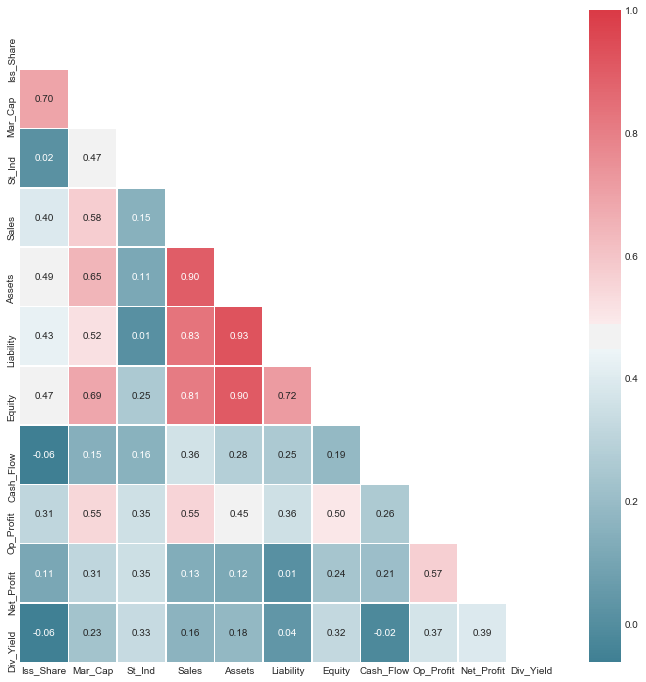

In [190]:
corr = chem_value_drop1.corr(method='spearman')
fig, ax = plt.subplots(figsize = (12,12))
colormap = sns.diverging_palette(220,10, as_cmap=True)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
colormap = sns.diverging_palette(220,10, as_cmap = True)
sns.heatmap(corr, cmap=colormap, linewidth=0.5, annot=True, fmt=".2f", mask=dropSelf)
plt.show()

In [191]:
chem_try_2 = chem.copy()
chem_value_drop2 = chem_try_2.drop(['Iss_Share', 'Mar_Cap', 'St_Ind', 'Sales', 'Equity', 'Assets', 'Liability', 'Cash_Flow', 'Op_Profit', 'Net_Profit'], axis=1)
chem_value_drop2.head().T

0                        1  \
Company_Name  Polychem Indonesia Tbk  Aneka Gas Industri Tbk.   
Code_Name                       ADMG                     AGII   
Subsector            Tetile, Garment                Chemicals   
MR_Quarter                31/03/2020               31/03/2020   
Fin_Yr_End                  December                 December   
DPS                                0                     3.25   
EPS                              -63                       25   
RPS                            821.8                      710   
BVPS                             714                     1063   
CFPS                            18.2                       49   
CEPS                              49                      140   
NAVS                             714                     1083   
Div_Yield                          0                   0.0058   
PER                             -1.4                     22.4   
PSR                             0.11                     0.79   
PBVR                            0.12                     0.53   
PCFR                            4.99                    11.35   
DPR                                0                     0.13   
GPM                          -0.0438                   0.4531   
OPM                          -0.0802                   0.1808   
NPM                          -0.0766                   0.0348   
EBITM                        -0.0718                  -0.1488   
ROE                           -0.088                   0.0232   
ROA                          -0.0733                   0.0105   
DER                           0.2017                   1.1869   
CR                             0.482                   0.2371   
QR                            1.8919                   0.7872   
CRR                            3.407                   1.0355   

                                           2                      3  \
Company_Name  Argha Karya Prima Industry Tbk  Alkindo Naratama Tbk.   
Code_Name                               AKPI                   ALDO   
Subsector               Plastics & Packaging           Pulp & Paper   
MR_Quarter                        31/03/2020             31/03/2020   
Fin_Yr_End                          December               December   
DPS                                       12                    1.1   
EPS                                      -15                     30   
RPS                                     3366                   1132   
BVPS                                    2166                    386   
CFPS                                     316                     76   
CEPS                                      96                     16   
NAVS                                    2166                    495   
Div_Yield                             0.0405                 0.0028   
PER                                   -19.73                  13.33   
PSR                                     0.09                   0.35   
PBVR                                    0.14                   1.04   
PCFR                                    0.94                   5.28   
DPR                                     -0.8                 0.0367   
GPM                                   0.0928                 0.2022   
OPM                                   0.0341                 0.0883   
NPM                                  -0.0044                 0.0261   
EBITM                                -0.0275                 0.0246   
ROE                                  -0.0068                 0.0768   
ROA                                  -0.0031                 0.0347   
DER                                   1.1656                 0.9285   
CR                                    0.0583                 0.0555   
QR                                    0.6598                 1.0185   
CRR                                   1.0693                  1.735   

                                      4  
Company_Name    Alakasa Industrindo Tbk  
Code_

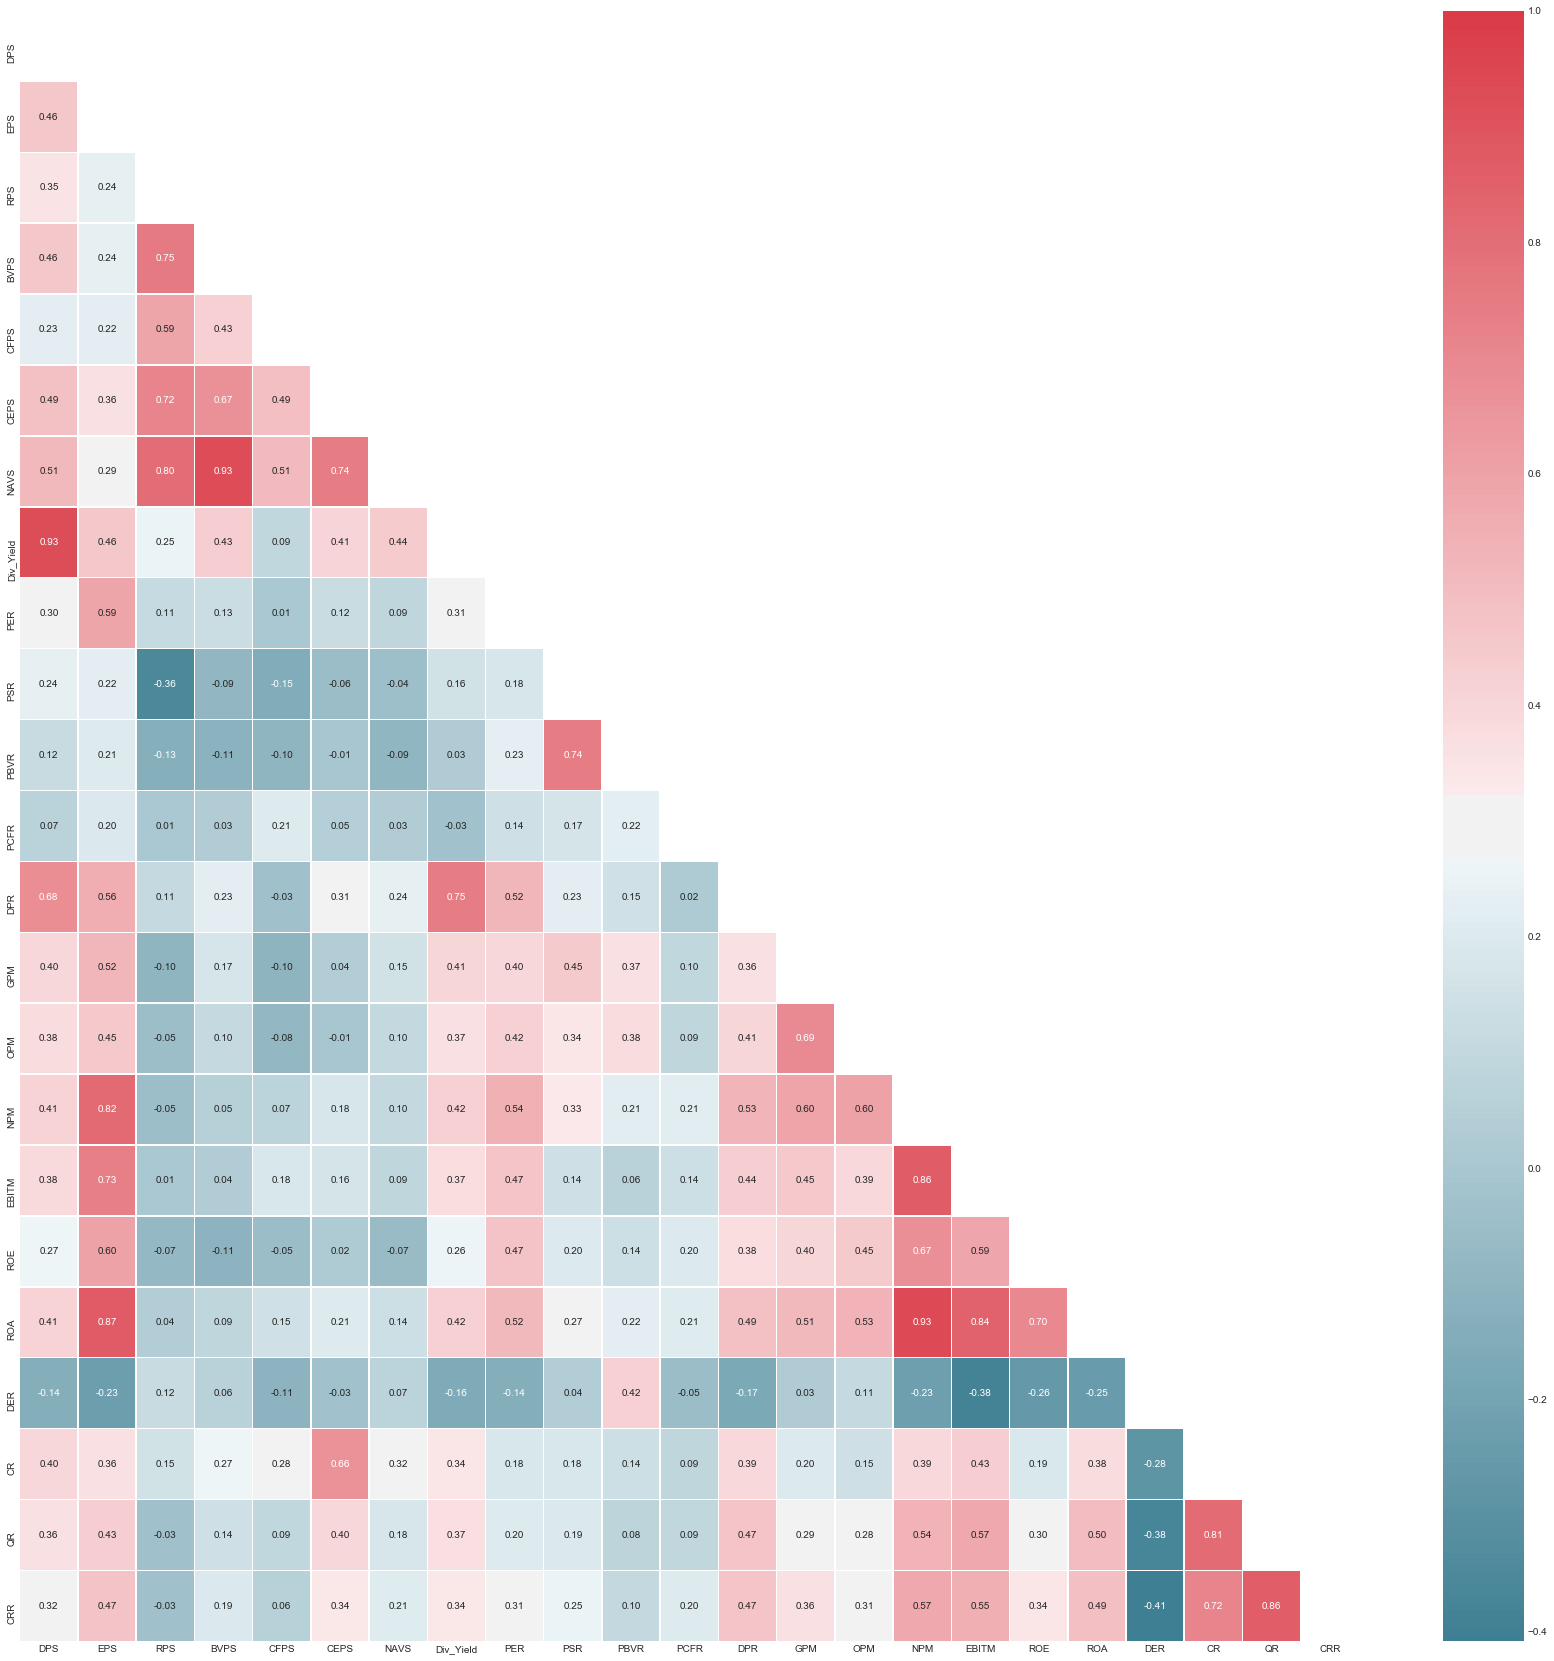

In [192]:
corr = chem_value_drop2.corr(method='spearman')
fig, ax = plt.subplots(figsize = (30,30))
colormap = sns.diverging_palette(220,10, as_cmap=True)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
colormap = sns.diverging_palette(220,10, as_cmap = True)
sns.heatmap(corr, cmap=colormap, linewidth=0.5, annot=True, fmt=".2f", mask=dropSelf)
plt.show()

<hr>

## Visualisasi Target Feature `Dividen Yield` pada Perusahaan sektor `Basic Industry and Chemicals`

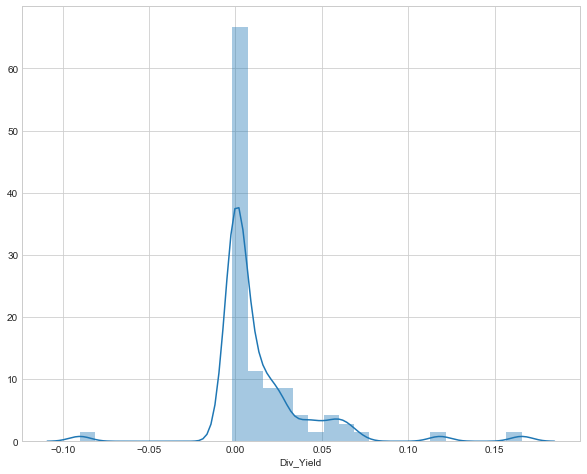

In [193]:
plt.figure(figsize=(10,8))
sns.distplot(chem['Div_Yield'])

## Visualisasi Tingkat Hutang terhadap Ekuitas pada Perusahaan sektor `Basic Industry and Chemicals`

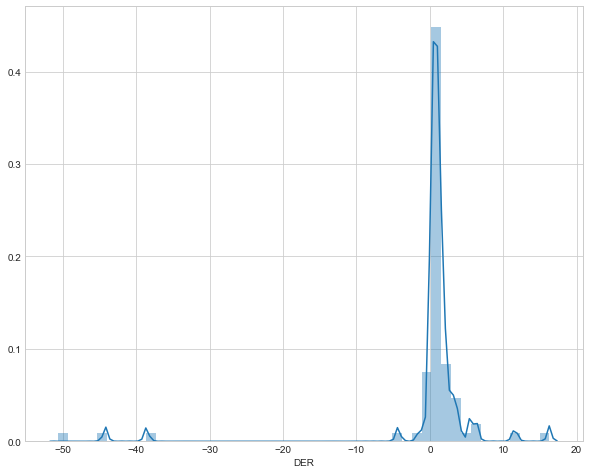

In [194]:
plt.figure(figsize=(10,8))
sns.distplot(chem['DER'])

## Visualisasi Margin Keuntungan Bersih pada Perusahaan Terbuka di sektor `Basic Industry and Chemicals`

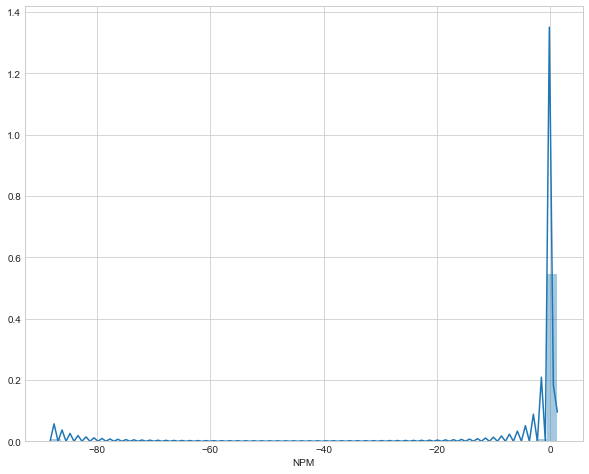

In [196]:
plt.figure(figsize=(10,8))
sns.distplot(chem['NPM'])

## Visualisasi Ekuitas pada Perusahaan Terbuka sektor `Basic Industry and Chemicals`

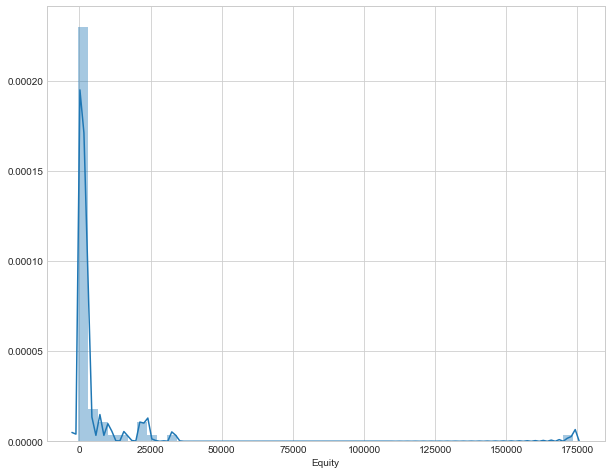

In [197]:
plt.figure(figsize=(10,8))
sns.distplot(chem['Equity'])

## Visualisasi Rasio likuiditas pada Perusahaan Terbuka pada sektor `Basic Industry and Chemicals`

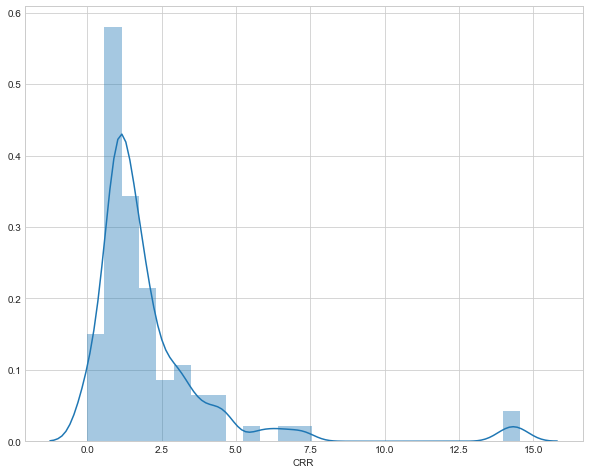

In [198]:
plt.figure(figsize=(10,8))
sns.distplot(chem['CRR'])

<hr>

## __I. Exploratory Data Analysis Perusahaan Terbuka di sektor `Miscellaneous Industry`__

In [199]:
misc = sql_df('''select * from miscellaneous_industry''')
misc.head().T

0                  1  \
Company_Name  Ateliers Mecaniques D Indonesi    Argo Pantes Tbk   
Code_Name                               AMIN               ARGO   
Subsector      Machinery and Heavy Equipment  Textile, Garment.   
MR_Quarter                        31/01/2020         31/12/2019   
Fin_Yr_End                           January           December   
Iss_Share                               1.08            0.33556   
Mar_Cap                               274.32             429.51   
St_Ind                                 198.4               32.2   
Sales                                 205.28              271.6   
Assets                                420.68            1190.42   
Liability                             210.72            2403.38   
Equity                                209.96           -1212.82   
Cash_Flow                              11.98              -49.7   
Op_Profit                              31.43             -21.28   
Net_Profit                             10.23            -101.92   
DPS                                        8                  0   
EPS                                        9             -303.8   
RPS                                      190              809.2   
BVPS                                     194            -3614.8   
CFPS                                      11             -148.4   
CEPS                                       3                8.4   
NAVS                                     194            -3614.8   
Div_Yield                             0.0299                  0   
PER                                    28.22              -4.25   
PSR                                     1.34               1.59   
PBVR                                    1.31              -0.36   
PCFR                                    22.9              -8.71   
DPR                                   0.8889                  0   
GPM                                   0.2728              0.032   
OPM                                   0.1531            -0.0784   
NPM                                   0.0498             -0.375   
EBITM                                 0.0036            -0.6036   
ROE                                   0.0487             0.0839   
ROA                                   0.0243            -0.0855   
DER                                   1.0036            -1.9815   
CR                                    0.0189             0.0016   
QR                                    0.9104             0.0263   
CRR                                   1.7041              0.096   

                                          2                          3  \
Company_Name     Arkha Jayanti Persada Tbk.   Astra International Tbk.   
Code_Name                              ARKA                       ASII   
Subsector     Machinery and Heavy Equipment  Automotive And Components   
MR_Quarter                       31/03/2020                 31/03/2020   
Fin_Yr_End                         December                   December   
Iss_Share                                 2                      40.48   
Mar_Cap                                 616                     197150   
St_Ind                                130.5                     3482.6   
Sales                                  6.39                      54000   
Assets                               462.97                     366740   
Liability                             347.5                     170840   
Equity                               115.46                     154580   
Cash_Flow                             -1.76                       7830   
Op_Profit                             -8.34                       5730   
Net_Profit                            -6.71                       4810   
DPS                                       0                        214   
EPS                                     -13                        475   
RPS                                      13                       5336   
BVPS                   

### __1i. Ada apa sajakah subsektor pada sektor ini?__

In [200]:
misc['Subsector'].value_counts()

Textile, Garment                 18
Automotive And Components        13
Cable                             6
Machinery and Heavy Equipment     5
Electronics                       3
Textile, Garment.                 3
Footwear                          2
Metal & Allied Products           1
Name: Subsector, dtype: int64

### __2i. Kita sekarang mengetahui bahwa subsektor yang terbanyak pada sektor `Miscellaneous Industry` adalah subsektor `Textile, Garment`. Perusahaan apa sajakah yang memiliki penjualan tertinggi pada sektor `Miscellaneous Industry` dan subsektor `Textile, Garment`?__

In [202]:
sql_df('''select Company_Name as NamaPerusahaan,
Code_Name as KodeSaham,
Subsector as Subsektor,
Sales as Penjualan_dalam_Milliar
from miscellaneous_industry
order by Sales DESC
limit 5''')

NamaPerusahaan KodeSaham                  Subsektor  \
0        Astra International Tbk.      ASII  Automotive And Components   
1  Indomobil Sukses Internasional      IMAS  Automotive And Components   
2           Sri Rejeki Isman Tbk.      SRIL           Textile, Garment   
3             Astra Otoparts Tbk.      AUTO  Automotive And Components   
4              Gajah Tunggal Tbk.      GJTL  Automotive And Components   

   Penjualan_dalam_Milliar  
0                 54000.00  
1                  4460.00  
2                  4432.68  
3                  3840.00  
4                  3800.00

In [203]:
sql_df('''select Company_Name as NamaPerusahaan,
Code_Name as KodeSaham,
Sales as Penjualan_dalam_Milliar
from miscellaneous_industry
where Subsector = 'Textile, Garment'
order by Sales DESC
Limit 5''')

NamaPerusahaan KodeSaham  Penjualan_dalam_Milliar
0      Sri Rejeki Isman Tbk.      SRIL                  4432.68
1  Indo-Rama Synthetics Tbk.      INDR                  2567.74
2   Uni-Charm Indonesia Tbk.      UCID                  2050.00
3          Pan Brothers Tbk.       PBR                  1703.24
4    Asia Pacific Fibers Tbk      POLY                  1224.02

### __3i. Perusahaan apa saja yang memiliki keuntungan bersih tertinggi di sektor ini pada Q1 2020?__

In [204]:
sql_df('''select Company_Name as NamaPerusahaan,
Code_Name as KodeSaham,
Net_Profit as Keuntungan_bersih_dlm_Milliar
from miscellaneous_industry
order by Net_Profit DESC
Limit 5''')

NamaPerusahaan KodeSaham  Keuntungan_bersih_dlm_Milliar
0       Astra International Tbk.      ASII                        4810.00
1          Sri Rejeki Isman Tbk.      SRIL                         395.08
2          Selamat Sempurna Tbk.      SMSM                         115.00
3            Astra Otoparts Tbk.      AUTO                         114.73
4  Supreme Cable Manufacturing &      SCCO                         110.55

### __4i. Perusahaan apa saja yang memiliki margin keuntungan bersih paling tinggi di sektor ini pada Q1 2020?__

In [205]:
sql_df('''select Company_Name as NamaPerusahaan,
Code_Name as KodeSaham,
NPM as Margin_keuntungan_bersih
from miscellaneous_industry
order by Net_Profit DESC
limit 5''')

NamaPerusahaan KodeSaham  Margin_keuntungan_bersih
0       Astra International Tbk.      ASII                    0.0890
1          Sri Rejeki Isman Tbk.      SRIL                    0.0891
2          Selamat Sempurna Tbk.      SMSM                    0.1432
3            Astra Otoparts Tbk.      AUTO                    0.0298
4  Supreme Cable Manufacturing &      SCCO                    0.0792

### __5i. Perusahaan apa saja yang memiliki tingkat hutang terhadap ekuitas paling rendah di sektor ini pada Q1 2020?__

In [206]:
sql_df('''select Company_Name as NamaPerusahaan,
Code_Name as KodeSaham,
DER as tingkat_hutang
from miscellaneous_industry
where DER > 0
order by DER
limit 5''')

NamaPerusahaan KodeSaham  tingkat_hutang
0      Multi Prima Sejahtera Tbk      LPIN          0.0608
1    Tifico Fiber Indonesia Tbk.      TFCO          0.0717
2                Indospring Tbk.      INDS          0.1068
3      Buana Artha Anugerah Tbk.      STAR          0.1839
4  Supreme Cable Manufacturing &      SCCO          0.2709

### __6i. Perusahaan apa saja yang memiliki ekuitas paling besar di sektor ini pada Q1 2020?__

In [207]:
sql_df('''select Company_Name as NamaPerusahaan,
Code_Name as KodeSaham,
Equity as Ekuitas
from miscellaneous_industry
order by Equity DESC
limit 5''')

NamaPerusahaan KodeSaham    Ekuitas
0        Astra International Tbk.      ASII  154580.00
1             Astra Otoparts Tbk.      AUTO   10720.00
2           Sri Rejeki Isman Tbk.      SRIL    8710.94
3  Indomobil Sukses Internasional      IMAS    7860.00
4              Gajah Tunggal Tbk.      GJTL    6060.00

### __7i. Perusahaan apa saja yang memiliki rasio likuiditas tertinggi di sektor ini pada Q1 2020?__

In [209]:
sql_df('''select Company_Name as NamaPerusahaan,
Code_Name as KodeSaham,
CRR as rasio_likuiditas
from miscellaneous_industry
order by CRR DESC
limit 5''')

NamaPerusahaan KodeSaham  rasio_likuiditas
0    Multi Prima Sejahtera Tbk      LPIN           18.1035
1            Pan Brothers Tbk.       PBR           11.0991
2    Buana Artha Anugerah Tbk.      STAR            6.4333
3  Tifico Fiber Indonesia Tbk.      TFCO            6.3611
4              Indospring Tbk.      INDS            5.7209

### __8i. Perusahaan apa pada sektor `Miscellaneous Industry` pada Q1 2020 ini yang;__
  #### a.memiliki *__dividen yield__* diatas 4% 
  #### b.memiliki *__tingkat harga saham terhadap nilai bukunya__* tidak melebihi 2x
  #### c.*__rasio hutang terhadap ekuitas__* tidak melebihi 200% dari ekuitasnya
  #### d.*__rasio pembagian dividen yang tinggi terhadap laba bersihnya__* (diatas 20%)
  #### e.*__pengembalian laba bersih terhadap ekuitas__* lebih dari 3%?
  #### f. diurutkan dari yang memiliki *__rasio likuiditas__* tertinggi. Tampilkan 10 perusahaan.

In [213]:
recom_misc = sql_df('''select Company_Name,
Code_Name,
Subsector,
Equity,
PBVR,
DER,
Div_Yield,
ROE,
DPR
from miscellaneous_industry
where DER < 2 and Div_Yield > 0.04 and ROE > 0.03 and DPR > 0.2 and PBVR < 2 and PBVR > 0
ORDER BY CRR DESC
Limit 10''')
recom_misc

Company_Name Code_Name                  Subsector  \
0                Indospring Tbk.      INDS  Automotive And Components   
1  Supreme Cable Manufacturing &      SCCO                      Cable   
2            Astra Otoparts Tbk.      AUTO  Automotive And Components   
3       Astra International Tbk.      ASII  Automotive And Components   
4       Jembo Cable Company Tbk.      JECC                      Cable   
5      Indo-Rama Synthetics Tbk.      INDR           Textile, Garment   

     Equity  PBVR     DER  Div_Yield     ROE     DPR  
0    2600.0  0.55  0.1068     0.0461  0.0662  0.3802  
1    3270.0  0.59  0.2709     0.0535  0.1353  0.2325  
2   10720.0  0.41  0.4672     0.0670  0.0428  0.6421  
3  154580.0  1.28  1.1052     0.0412  0.1244  0.4505  
4     762.6  1.35  1.1619     0.0410  0.0386  1.5385  
5    5260.5  0.24  1.0903     0.1504  0.0460  0.7852

In [214]:
# recom_misc.to_csv('Miscellaneous Industry.csv')

<hr>

## Descriptive Analysis

In [215]:
misc.describe().T

count          mean           std          min        25%  \
Iss_Share    51.0      3.896778      7.131623      0.07000    0.72552   
Mar_Cap      51.0   5226.788039  27483.249763     12.52000  250.68000   
St_Ind       51.0    614.256863   1491.843233      0.40000   53.45000   
Sales        51.0   1892.007206   7531.986322      0.50749  112.26500   
Assets       51.0  11328.985490  51360.912173    251.21000  589.28000   
Liability    51.0   6088.306667  24324.390703     18.37000  327.50000   
Equity       51.0   4358.911176  21689.080392 -13118.60000  194.63500   
Cash_Flow    51.0    184.593701   1105.272273   -680.96000   -6.47000   
Op_Profit    51.0    169.083779    803.812541    -56.74000    0.05982   
Net_Profit   51.0     87.577663    683.704809   -437.92000   -7.84000   
DPS          51.0     43.870392    124.833211      0.00000    0.00000   
EPS          51.0     47.058649    331.899068   -464.00000  -15.50000   
RPS          51.0   2220.014682   4648.017305      0.00000  218.20000   
BVPS         51.0   1111.128890   2892.177183  -5257.00000  104.50000   
CFPS         51.0    406.085292   1371.944456   -485.00000  -10.00000   
CEPS         51.0    167.943718    392.129861      0.00000    5.50000   
NAVS         51.0   1189.583792   2945.166405  -5257.00000  104.50000   
Div_Yield    51.0      0.018253      0.031039      0.00000    0.00000   
PER          51.0     98.215098    625.356639   -344.19000   -5.46000   
PSR          51.0      8.608235     42.887332      0.02000    0.23000   
PBVR         51.0      2.607451      9.146649     -0.70000    0.38000   
PCFR         51.0      8.618824    107.006860   -453.06000   -2.13000   
DPR          51.0      0.378398      1.388159     -0.57140    0.00000   
GPM          51.0      0.044274      0.764620     -5.18880    0.06910   
OPM          51.0     -0.164244      1.043868     -6.77830   -0.00660   
NPM          51.0     -0.182116      1.096965     -7.71750   -0.04425   
EBITM        51.0     -0.549733      2.329010    -14.04180   -0.14375   
ROE          51.0     -0.050596      0.373798     -1.82360   -0.05205   
ROA          51.0     -0.002669      0.075409     -0.32040   -0.02115   
DER          51.0      1.300237      4.743551    -25.64390    0.46545   
CR           51.0      0.487304      1.641021      0.00070    0.01865   
QR           51.0      1.378782      2.274258      0.00000    0.34160   
CRR          51.0      2.411455      3.015807      0.08610    1.06235   

                  50%         75%          max  
Iss_Share      1.6400     4.08500      40.4800  
Mar_Cap      645.0000  1700.00000  197150.0000  
St_Ind        98.4000   301.50000    7068.7000  
Sales        382.7700  1030.61000   54000.0000  
Assets      1445.2200  4006.62000  366740.0000  
Liability    660.1300  2151.69000  170840.0000  
Equity       524.0100  2524.86000  154580.0000  
Cash_Flow      8.4500    89.04500    7830.0000  
Op_Profit     18.2000    63.40000    5730.0000  
Net_Profit     3.0000    12.94500    4810.0000  
DPS            0.0000     7.75000     600.0000  
EPS            7.0000    36.10000    2151.0000  
RPS          513.0000  1986.00000   27141.0000  
BVPS         319.0000   819.70000   15890.0000  
CFPS          11.0000   240.50000    7211.0000  
CEPS          34.0000   109.20000    2378.0000  
NAVS         330.0000   819.70000   15817.0000  
Div_Yield      0.0000     0.03295       0.1504  
PER            4.3500    23.51500    4432.6800  
PSR            0.5100     1.24500     302.6600  
PBVR           0.7500     1.39000      65.0000  
PCFR           1.2300     7.18500     496.8600  
DPR            0.0000     0.30625       9.6774  
GPM            0.1452     0.22980       0.6012  
OPM            0.0456     0.09705       0.2915  
NPM            0.0101     0.04505       0.3313  
EBITM         -0.0132     0.02740       0.2857  
ROE            0.0122     0.06695       1.0842  
ROA            0.0061     0.03430       0.1314  
DER            1.1760     2.33185      16.3378  
CR        

## Correlation Analysis

In [216]:
misc_try_1 = misc.copy()
misc_value_drop1 = misc_try_1.drop(['DPR', 'DPS', 'EPS', 'RPS', 'BVPS', 'CFPS', 'CEPS', 'NAVS', 'PER', 'PSR', 'PBVR', 'PCFR', 'GPM', 'OPM', 'NPM', 'EBITM', 'ROE', 'ROA', 'CR', 'QR', 'CRR', 'DER'], axis=1)
misc_value_drop1.head().T

0                  1  \
Company_Name  Ateliers Mecaniques D Indonesi    Argo Pantes Tbk   
Code_Name                               AMIN               ARGO   
Subsector      Machinery and Heavy Equipment  Textile, Garment.   
MR_Quarter                        31/01/2020         31/12/2019   
Fin_Yr_End                           January           December   
Iss_Share                               1.08            0.33556   
Mar_Cap                               274.32             429.51   
St_Ind                                 198.4               32.2   
Sales                                 205.28              271.6   
Assets                                420.68            1190.42   
Liability                             210.72            2403.38   
Equity                                209.96           -1212.82   
Cash_Flow                              11.98              -49.7   
Op_Profit                              31.43             -21.28   
Net_Profit                             10.23            -101.92   
Div_Yield                             0.0299                  0   

                                          2                          3  \
Company_Name     Arkha Jayanti Persada Tbk.   Astra International Tbk.   
Code_Name                              ARKA                       ASII   
Subsector     Machinery and Heavy Equipment  Automotive And Components   
MR_Quarter                       31/03/2020                 31/03/2020   
Fin_Yr_End                         December                   December   
Iss_Share                                 2                      40.48   
Mar_Cap                                 616                     197150   
St_Ind                                130.5                     3482.6   
Sales                                  6.39                      54000   
Assets                               462.97                     366740   
Liability                             347.5                     170840   
Equity                               115.46                     154580   
Cash_Flow                             -1.76                       7830   
Op_Profit                             -8.34                       5730   
Net_Profit                            -6.71                       4810   
Div_Yield                                 0                     0.0412   

                                      4  
Company_Name        Astra Otoparts Tbk.  
Code_Name                          AUTO  
Subsector     Automotive And Components  
MR_Quarter                   31/03/2020  
Fin_Yr_End                     December  
Iss_Share                          4.82  
Mar_Cap                            4390  
St_Ind                              823  
Sales                              3840  
Assets                            16790  
Liability                          5010  
Equity                            10720  
Cash_Flow                        367.11  
Op_Profit                        125.24  
Net_Profit                       114.73  
Div_Yield                         0.067

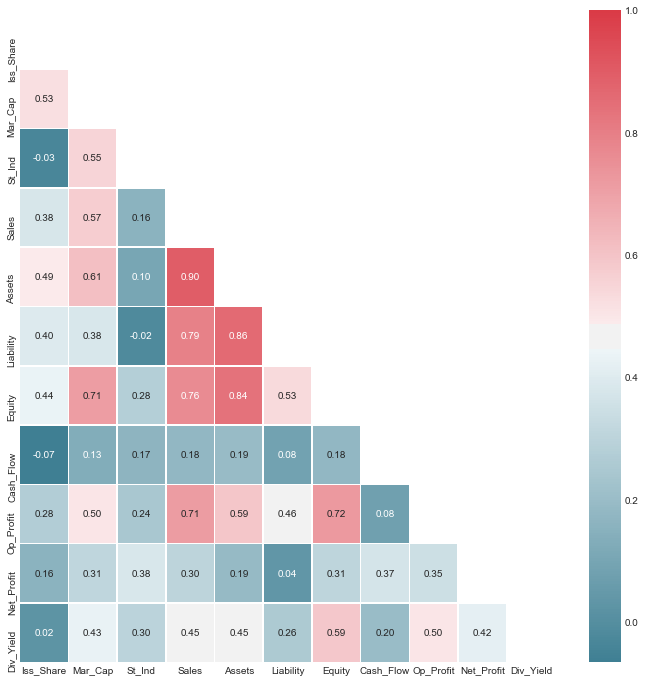

In [220]:
corr = misc_value_drop1.corr(method='spearman')
fig, ax = plt.subplots(figsize = (12,12))
colormap = sns.diverging_palette(220,10, as_cmap=True)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
colormap = sns.diverging_palette(220,10, as_cmap = True)
sns.heatmap(corr, cmap=colormap, linewidth=0.5, annot=True, fmt=".2f", mask=dropSelf)
plt.show()

In [221]:
misc_try_2 = misc.copy()
misc_value_drop2 = misc_try_2.drop(['Iss_Share', 'Mar_Cap', 'St_Ind', 'Sales', 'Equity', 'Assets', 'Liability', 'Cash_Flow', 'Op_Profit', 'Net_Profit'], axis=1)
misc_value_drop2.head().T

0                  1  \
Company_Name  Ateliers Mecaniques D Indonesi    Argo Pantes Tbk   
Code_Name                               AMIN               ARGO   
Subsector      Machinery and Heavy Equipment  Textile, Garment.   
MR_Quarter                        31/01/2020         31/12/2019   
Fin_Yr_End                           January           December   
DPS                                        8                  0   
EPS                                        9             -303.8   
RPS                                      190              809.2   
BVPS                                     194            -3614.8   
CFPS                                      11             -148.4   
CEPS                                       3                8.4   
NAVS                                     194            -3614.8   
Div_Yield                             0.0299                  0   
PER                                    28.22              -4.25   
PSR                                     1.34               1.59   
PBVR                                    1.31              -0.36   
PCFR                                    22.9              -8.71   
DPR                                   0.8889                  0   
GPM                                   0.2728              0.032   
OPM                                   0.1531            -0.0784   
NPM                                   0.0498             -0.375   
EBITM                                 0.0036            -0.6036   
ROE                                   0.0487             0.0839   
ROA                                   0.0243            -0.0855   
DER                                   1.0036            -1.9815   
CR                                    0.0189             0.0016   
QR                                    0.9104             0.0263   
CRR                                   1.7041              0.096   

                                          2                          3  \
Company_Name     Arkha Jayanti Persada Tbk.   Astra International Tbk.   
Code_Name                              ARKA                       ASII   
Subsector     Machinery and Heavy Equipment  Automotive And Components   
MR_Quarter                       31/03/2020                 31/03/2020   
Fin_Yr_End                         December                   December   
DPS                                       0                        214   
EPS                                     -13                        475   
RPS                                      13                       5336   
BVPS                                     58                       3818   
CFPS                                     -4                        774   
CEPS                                      0                        723   
NAVS                                     58                       4839   
Div_Yield                                 0                     0.0412   
PER                                  -23.69                      10.25   
PSR                                   24.12                       0.91   
PBVR                                   5.31                       1.28   
PCFR                                 -87.56                        6.3   
DPR                                       0                     0.4505   
GPM                                 -0.5805                     0.2238   
OPM                                 -1.3062                     0.1061   
NPM                                 -1.0513                      0.089   
EBITM                               -1.1473                     0.0915   
ROE                                 -0.2325                     0.1244   
ROA                                  -0.058                     0.0524   
DER                                  3.0097                     1.1052   
CR                                   0.0049                     0.3042   
QR                                   1.1603                     1.0919   
CRR                        

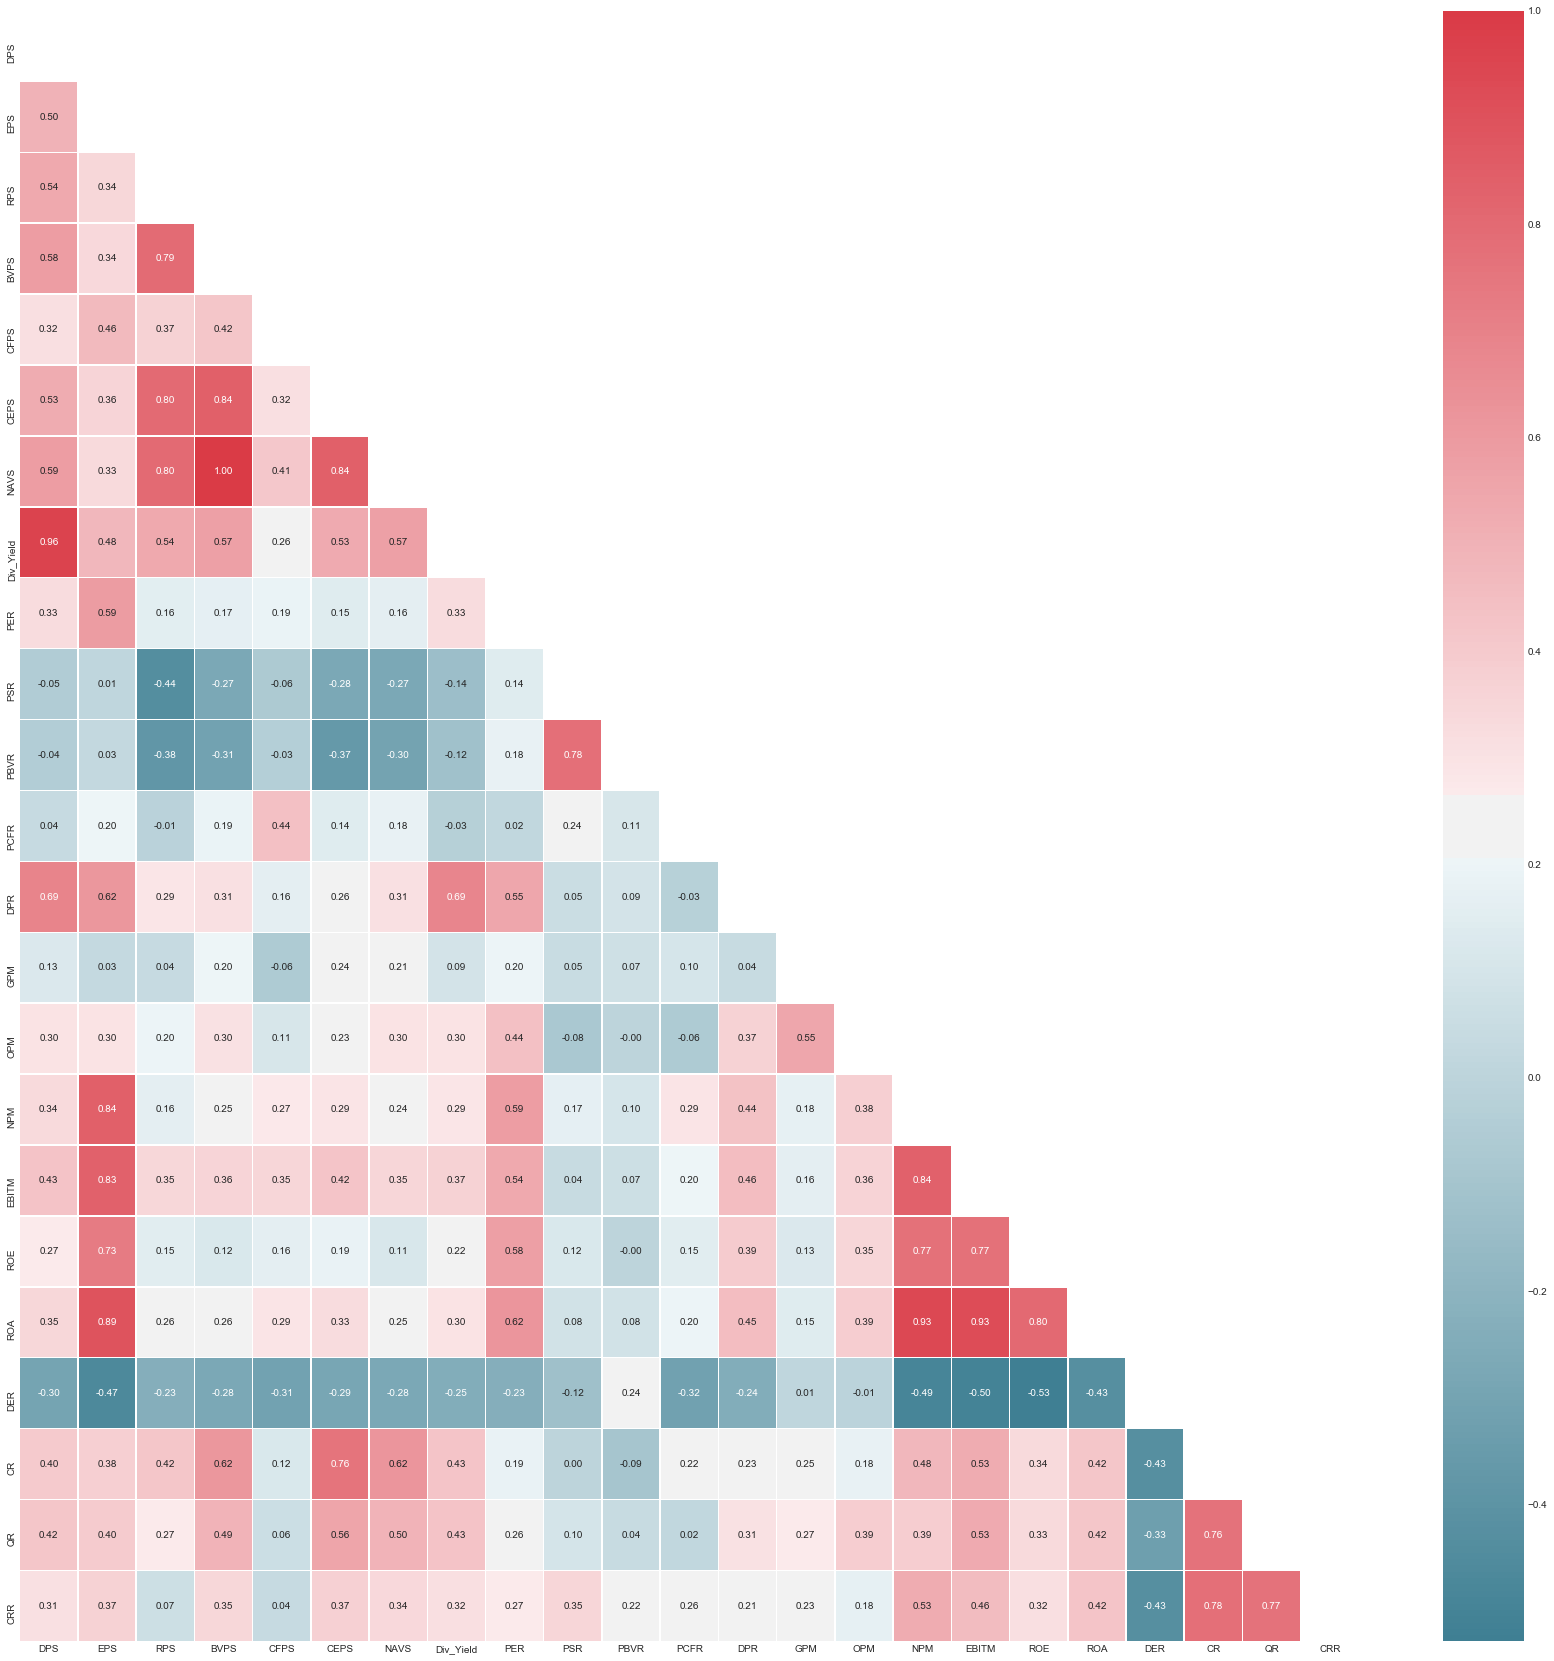

In [222]:
corr = misc_value_drop2.corr(method='spearman')
fig, ax = plt.subplots(figsize = (30,30))
colormap = sns.diverging_palette(220,10, as_cmap=True)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
colormap = sns.diverging_palette(220,10, as_cmap = True)
sns.heatmap(corr, cmap=colormap, linewidth=0.5, annot=True, fmt=".2f", mask=dropSelf)
plt.show()

<hr>

## Visualisasi Target Feature Dividen Yield Perusahaan Terbuka pada sektor `Miscellaneous Industry`

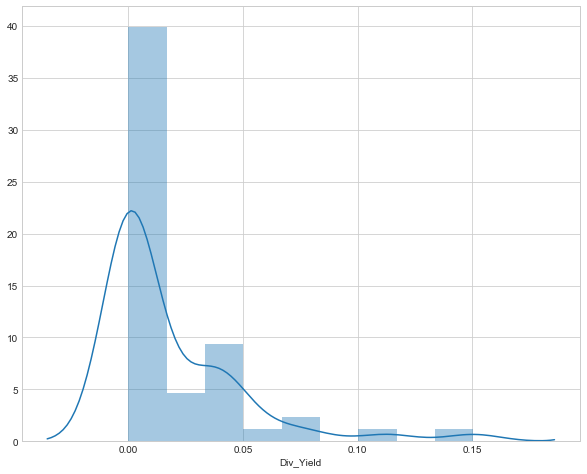

In [223]:
plt.figure(figsize=(10,8))
sns.distplot(misc['Div_Yield'])

## Visualisasi Margin Keuntungan Bersih pada Perusahan Terbuka pada di sektor `Miscellaneous Industry`

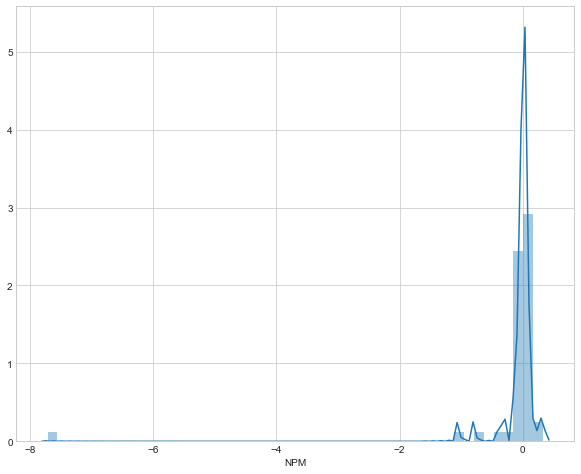

In [224]:
plt.figure(figsize=(10,8))
sns.distplot(misc['NPM'])

## Visualisasi Tingkat Hutang terhadap Ekuitas pada Perusahaan Terbuka di sektor `Miscellaneous Industry`

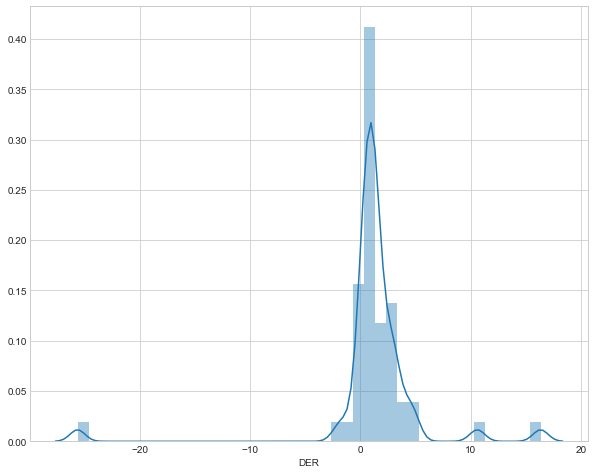

In [225]:
plt.figure(figsize=(10,8))
sns.distplot(misc['DER'])

## Visualisasi Ekuitas Perusahaan Terbuka di sektor `Miscellaneous Indusry`

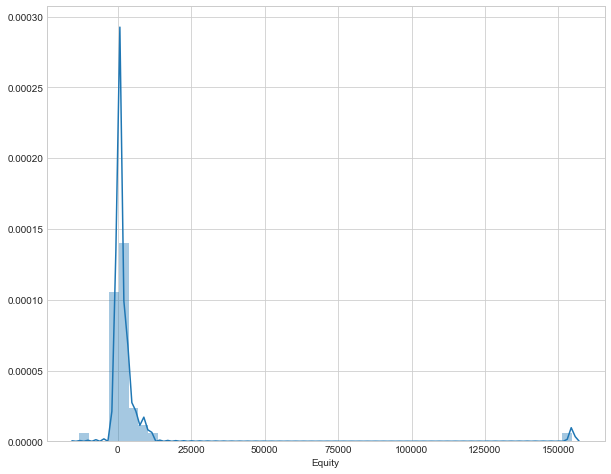

In [226]:
plt.figure(figsize=(10,8))
sns.distplot(misc['Equity'])

## Visualisasi Rasio Likuiditas Perusahaan Terbuka di sektor `Miscellaneous Industry`

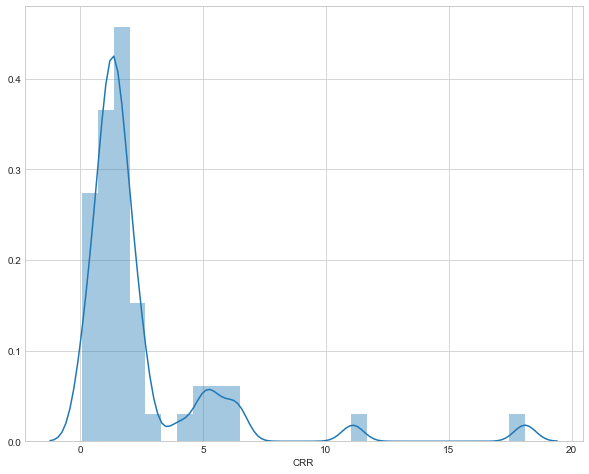

In [227]:
plt.figure(figsize=(10,8))
sns.distplot(misc['CRR'])

<hr>